In [1]:
import os 
import datetime
from datetime import timedelta 

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize']=(8,6)
mpl.rcParams['axes.grid']=False
%config InlineBackend.figure_format = 'retina'

# Exploratory Data Analysis (EDA)
- Loading the dataset
- Data wrangling for missing variables.
- Data transformation.
- Data visualization

## Loading Dataset

In [2]:
#df = pd.read_excel('Data_B2_Aug22.xlsx',sheet_name='Data GT21',index_col='Time',parse_dates=True)

PATH = 'https://raw.githubusercontent.com/WisitTee/Thesis/main/Data_G21_Aug22.csv'
df = pd.read_csv(PATH,index_col='Time',parse_dates=True)
df.head(5)

GT21_GEN_WATT  GT21_GEN_VAR  GT21_GEN_CURRENT  \
Time                                                                 
2022-08-01 16:22:00          78.92         22.40              3.35   
2022-08-01 16:23:00          78.88         22.68              3.36   
2022-08-01 16:24:00          78.90         22.16              3.35   
2022-08-01 16:25:00          78.88         22.60              3.35   
2022-08-01 16:26:00          78.88         24.80              3.37   

                     GT21_GEN_VOLTAGE  GT21_PWR_FACTOR  GT21_FUEL_GAS_PRESS  \
Time                                                                          
2022-08-01 16:22:00             14.01             0.96                22.92   
2022-08-01 16:23:00             14.01             0.95                22.92   
2022-08-01 16:24:00             14.00             0.96                22.92   
2022-08-01 16:25:00             14.01             0.96                22.93   
2022-08-01 16:26:00             14.07             0.95                22.94   

                     GT21_CSO  GT21_SPEED  GT21_IGV_CSO  GT21_IGV_FB  ...  \
Time                                                                  ...   
2022-08-01 16:22:00     49.97     3000.75          4.63         3.74  ...   
2022-08-01 16:23:00     49.95     3000.38          4.71         4.59  ...   
2022-08-01 16:24:00     49.95     3002.25          4.24         4.50  ...   
2022-08-01 16:25:00     49.93     2999.63          4.28         4.48  ...   
2022-08-01 16:26:00     49.96     3003.00          3.48         3.18  ...   

                     GT21_FG_DIFF_PRESS  GT21_INLET_AIR_DIFF_KKU  \
Time                                                               
2022-08-01 16:22:00             2483.30                    17.71   
2022-08-01 16:23:00             2492.74                    17.54   
2022-08-01 16:24:00             2478.27                    17.67   
2022-08-01 16:25:00             2483.74                    17.37   
2022-08-01 16:26:00             2477.31                    17.84   

                     GT21_NOX_7O2  HG21_IN_GAS_PRESS  HG21_OUT_GAS_PRESS  \
Time                                                                       
2022-08-01 16:22:00        242.22             150.31                9.48   
2022-08-01 16:23:00        240.67             140.53                8.40   
2022-08-01 16:24:00        239.45             144.53                8.80   
2022-08-01 16:25:00        240.33             134.33                9.47   
2022-08-01 16:26:00        239.39             134.27                7.92   

                     HG21_IN_GAS_TEMP  HG21_OUT_GAS_TEMP  ST20_GEN_OUTPUT  \
Time                                                                        
2022-08-01 16:22:00            543.70             112.31            94.25   
2022-08-01 16:23:00            543.36             112.36            94.38   
2022-08-01 16:24:00            542.91             112.41            94.38   
2022-08-01 16:25:00            542.85             112.47            94.25   
2022-08-01 16:26:00            543.25             112.47            94.50   

                     AMB_TEMP  RELATIVE_HUMIDITY  
Time                                              
2022-08-01 16:22:00     30.10              74.51  
2022-08-01 16:23:00     30.04              74.86  
2022-08-01 16:24:00     30.05              74.98  
2022-08-01 16:25:00     30.04              74.97  
2022-08-01 16:26:00     30.05              73.93  

[5 rows x 46 columns]

## Checking Missing Value  & Data Distributions

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 39115 entries, 2022-08-01 16:22:00 to 2022-08-31 23:59:00
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   GT21_GEN_WATT            39115 non-null  float64
 1   GT21_GEN_VAR             39115 non-null  float64
 2   GT21_GEN_CURRENT         39115 non-null  float64
 3   GT21_GEN_VOLTAGE         39115 non-null  float64
 4   GT21_PWR_FACTOR          39115 non-null  float64
 5   GT21_FUEL_GAS_PRESS      39115 non-null  float64
 6   GT21_CSO                 39115 non-null  float64
 7   GT21_SPEED               39115 non-null  float64
 8   GT21_IGV_CSO             39115 non-null  float64
 9   GT21_IGV_FB              39115 non-null  float64
 10  GT21_EXH_DAMPER_CMD      39115 non-null  float64
 11  GT21_EXH_DAMPER_FB       39115 non-null  float64
 12  GT21_COMP_IN_AIR_TEMP    39115 non-null  float64
 13  GT21_RCA_TEMP_R          39115 non-null  

In [4]:
pd.set_option('display.max_columns', None) #to preview all columns
df.describe()

GT21_GEN_WATT  GT21_GEN_VAR  GT21_GEN_CURRENT  GT21_GEN_VOLTAGE  \
count   39115.000000  39115.000000      39115.000000      39115.000000   
mean       79.210594     15.372026          3.312224         13.881120   
std         5.320382      7.994889          0.231033          0.129446   
min        54.520000    -10.360000          2.240000         13.430000   
25%        78.460000      9.760000          3.260000         13.790000   
50%        78.840000     15.720000          3.290000         13.890000   
75%        79.680000     20.800000          3.340000         13.970000   
max       111.960000     51.240000          4.660000         14.400000   

       GT21_PWR_FACTOR  GT21_FUEL_GAS_PRESS      GT21_CSO    GT21_SPEED  \
count     39115.000000         39115.000000  39115.000000  39115.000000   
mean          0.918654            22.997422     49.960483   2999.863064   
std           0.325323             0.335868      0.960478      1.916954   
min          -1.000000            22.090000     44.470000   2993.250000   
25%           0.960000            22.840000     49.850000   2998.500000   
50%           0.980000            22.930000     49.990000   3000.000000   
75%           0.990000            23.010000     50.110000   3001.500000   
max           1.000000            25.380000     54.710000   3008.250000   

       GT21_IGV_CSO   GT21_IGV_FB  GT21_EXH_DAMPER_CMD  GT21_EXH_DAMPER_FB  \
count  39115.000000  39115.000000              39115.0        39115.000000   
mean       5.134000      4.930304                100.0          102.672253   
std        8.952785      9.046172                  0.0            0.291706   
min        0.000000     -3.010000                100.0          102.000000   
25%        1.930000      1.750000                100.0          102.370000   
50%        3.370000      3.280000                100.0          102.750000   
75%        5.090000      5.020000                100.0          102.940000   
max      100.000000    100.770000                100.0          103.310000   

       GT21_COMP_IN_AIR_TEMP  GT21_RCA_TEMP_R  GT21_RCA_TEMP_L  \
count           39115.000000     39115.000000     39115.000000   
mean               26.710791       188.096083       188.963698   
std                 2.509853         5.616152         5.887713   
min                22.070000       174.100000       174.980000   
25%                24.720000       184.660000       185.280000   
50%                26.190000       187.000000       187.870000   
75%                28.710000       190.430000       191.420000   
max                34.800000       231.210000       234.410000   

       GT21_DISC_TEMP2_R  GT21_DISC_TEMP2_L  GT21_DISC_TEMP3_R  \
count       39115.000000       39115.000000       39115.000000   
mean          359.011375         411.262631         327.516813   
std             5.206327           6.372679           5.935723   
min           334.900000         364.080000         295.590000   
25%           356.220000         410.360000         325.340000   
50%           358.440000         411.770000         327.400000   
75%           361.900000         413.880000         330.570000   
max           400.050000         431.530000         365.150000   

       GT21_DISC_TEMP3_L  GT21_DISC_TEMP4_R  GT21_DISC_TEMP4_L  GT21_BPT_AVG  \
count       39115.000000       39115.000000       39115.000000  39115.000000   
mean          330.023080         382.125729         386.555173    554.454857   
std             5.671598          10.833239          11.954644     12.675546   
min           300.850000         319.490000         328.510000    460.610000   
25%           327.440000         378.960000         378.475000    555.910000   
50%           329.370000         384.350000         387.150000    556.920000   
75%           333.190000         388.930000         395.380000    557.750000   
max           366.370000         407.560000         424.920000    586.890000   

       GT21_EXH_GAS_TEMP_AVG  GT21_FUEL_GAS_FLOW  

## Data Transformation 

In [5]:
#Average RCA and Discavity Temp
df['GT21_RCA_TEMP_AVG'] = (df['GT21_RCA_TEMP_R'] + df['GT21_RCA_TEMP_L']) / 2
df['GT21_DISC_TEMP2_AVG'] = (df['GT21_DISC_TEMP2_R'] + df['GT21_DISC_TEMP2_L']) / 2
df['GT21_DISC_TEMP3_AVG'] = (df['GT21_DISC_TEMP3_R'] + df['GT21_DISC_TEMP3_L']) / 2
df['GT21_DISC_TEMP4_AVG'] = (df['GT21_DISC_TEMP4_R'] + df['GT21_DISC_TEMP4_L']) / 2

### Drop the Unusual periods

In [6]:
#Drop the Unusual periods

#Water Injection Period
df = df.drop(df[df.GT21_WTR_INJ_FLOW > 0.5].index)
df = df.drop(df[df.GT21_STEAM_INJ_FLOW < 2.5].index)

#NOx Outlier Period
df = df.drop(df[df.GT21_NOX_7O2 < 200].index)
df = df.drop(df[df.GT21_NOX_7O2 > 300].index)

In [7]:
df.head()

GT21_GEN_WATT  GT21_GEN_VAR  GT21_GEN_CURRENT  \
Time                                                                 
2022-08-01 16:22:00          78.92         22.40              3.35   
2022-08-01 16:23:00          78.88         22.68              3.36   
2022-08-01 16:24:00          78.90         22.16              3.35   
2022-08-01 16:25:00          78.88         22.60              3.35   
2022-08-01 16:26:00          78.88         24.80              3.37   

                     GT21_GEN_VOLTAGE  GT21_PWR_FACTOR  GT21_FUEL_GAS_PRESS  \
Time                                                                          
2022-08-01 16:22:00             14.01             0.96                22.92   
2022-08-01 16:23:00             14.01             0.95                22.92   
2022-08-01 16:24:00             14.00             0.96                22.92   
2022-08-01 16:25:00             14.01             0.96                22.93   
2022-08-01 16:26:00             14.07             0.95                22.94   

                     GT21_CSO  GT21_SPEED  GT21_IGV_CSO  GT21_IGV_FB  \
Time                                                                   
2022-08-01 16:22:00     49.97     3000.75          4.63         3.74   
2022-08-01 16:23:00     49.95     3000.38          4.71         4.59   
2022-08-01 16:24:00     49.95     3002.25          4.24         4.50   
2022-08-01 16:25:00     49.93     2999.63          4.28         4.48   
2022-08-01 16:26:00     49.96     3003.00          3.48         3.18   

                     GT21_EXH_DAMPER_CMD  GT21_EXH_DAMPER_FB  \
Time                                                           
2022-08-01 16:22:00                100.0              102.13   
2022-08-01 16:23:00                100.0              102.13   
2022-08-01 16:24:00                100.0              102.13   
2022-08-01 16:25:00                100.0              102.13   
2022-08-01 16:26:00                100.0              102.13   

                     GT21_COMP_IN_AIR_TEMP  GT21_RCA_TEMP_R  GT21_RCA_TEMP_L  \
Time                                                                           
2022-08-01 16:22:00                  27.93           189.91           190.92   
2022-08-01 16:23:00                  27.86           189.91           190.87   
2022-08-01 16:24:00                  27.79           190.13           190.98   
2022-08-01 16:25:00                  27.79           190.03           190.82   
2022-08-01 16:26:00                  27.85           189.89           190.74   

                     GT21_DISC_TEMP2_R  GT21_DISC_TEMP2_L  GT21_DISC_TEMP3_R  \
Time                                                                           
2022-08-01 16:22:00             360.68             411.12             331.41   
2022-08-01 16:23:00             360.67             410.92             331.36   
2022-08-01 16:24:00             360.67             410.87             331.27   
2022-08-01 16:25:00             360.31             410.44             331.16   
2022-08-01 16:26:00             360.82             411.04             331.39   

                     GT21_DISC_TEMP3_L  GT21_DISC_TEMP4_R  GT21_DISC_TEMP4_L  \
Time                                                                           
2022-08-01 16:22:00             333.15             388.52             370.76   
2022-08-01 16:23:00             333.11             388.49             370.73   
2022-08-01 16:24:00             332.99             388.51             370.56   
2022-08-01 16:25:00             333.00             388.73             370.51   
2022-08-01 16:26:00             333.15             388.82             371.04   

                     GT21_BPT_AVG  GT21_EXH_GAS_TEMP_AVG  GT21_FUEL_GAS_FLOW  \
Time                                                                           
2022-08-01 16:22:00        557.62                 545.01               28.05   
2022-08-01 16:23:00        556.55                 545.00               28.10   
2022-08-01 16:24:00

In [8]:
df.describe()

GT21_GEN_WATT  GT21_GEN_VAR  GT21_GEN_CURRENT  GT21_GEN_VOLTAGE  \
count   35540.000000  35540.000000      35540.000000      35540.000000   
mean       79.295415     15.325473          3.315337         13.880947   
std         5.537891      7.953796          0.239980          0.128780   
min        54.520000    -10.360000          2.240000         13.430000   
25%        78.540000      9.720000          3.260000         13.790000   
50%        78.920000     15.720000          3.300000         13.890000   
75%        79.740000     20.720000          3.340000         13.970000   
max       111.960000     51.240000          4.660000         14.400000   

       GT21_PWR_FACTOR  GT21_FUEL_GAS_PRESS      GT21_CSO    GT21_SPEED  \
count     35540.000000         35540.000000  35540.000000  35540.000000   
mean          0.921454            23.007264     49.949818   2999.861584   
std           0.318075             0.348649      1.000028      1.917904   
min          -1.000000            22.090000     44.470000   2993.250000   
25%           0.960000            22.840000     49.840000   2998.500000   
50%           0.980000            22.930000     49.970000   3000.000000   
75%           0.990000            23.020000     50.100000   3001.500000   
max           1.000000            25.380000     54.710000   3008.250000   

       GT21_IGV_CSO   GT21_IGV_FB  GT21_EXH_DAMPER_CMD  GT21_EXH_DAMPER_FB  \
count  35540.000000  35540.000000              35540.0        35540.000000   
mean       5.275169      5.072836                100.0          102.706165   
std        9.292701      9.383065                  0.0            0.282250   
min        0.000000     -3.010000                100.0          102.000000   
25%        1.870000      1.680000                100.0          102.440000   
50%        3.370000      3.280000                100.0          102.750000   
75%        5.160000      5.070000                100.0          102.940000   
max      100.000000    100.770000                100.0          103.310000   

       GT21_COMP_IN_AIR_TEMP  GT21_RCA_TEMP_R  GT21_RCA_TEMP_L  \
count           35540.000000     35540.000000     35540.000000   
mean               26.715931       188.158252       189.035875   
std                 2.559674         5.793875         6.076702   
min                22.070000       174.100000       174.980000   
25%                24.700000       184.580000       185.190000   
50%                26.180000       187.040000       187.910000   
75%                28.790000       190.510000       191.510000   
max                34.800000       231.210000       234.410000   

       GT21_DISC_TEMP2_R  GT21_DISC_TEMP2_L  GT21_DISC_TEMP3_R  \
count       35540.000000       35540.000000       35540.000000   
mean          359.104079         411.254291         327.505604   
std             5.364207           6.628780           6.138723   
min           334.900000         364.080000         295.590000   
25%           356.260000         410.310000         325.240000   
50%           358.590000         411.850000         327.420000   
75%           362.100000         414.030000         330.680000   
max           400.050000         431.530000         365.150000   

       GT21_DISC_TEMP3_L  GT21_DISC_TEMP4_R  GT21_DISC_TEMP4_L  GT21_BPT_AVG  \
count       35540.000000       35540.000000       35540.000000  35540.000000   
mean          330.057976         382.071310         387.455260    554.277390   
std             5.858863          11.240723          12.100909     13.167675   
min           300.850000         319.490000         328.510000    460.610000   
25%           327.430000         378.790000         379.540000    555.900000   
50%           329.430000         384.720000         389.700000    556.940000   
75%           333.380000         389.160000         396.150000    557.780000   
max           366.370000         407.560000         424.920000    586.890000   

       GT21_EXH_GAS_TEMP_AVG  GT21_FUEL_GAS_FLOW  

## Data visualization

### Data Distribution BEFORE Normalization

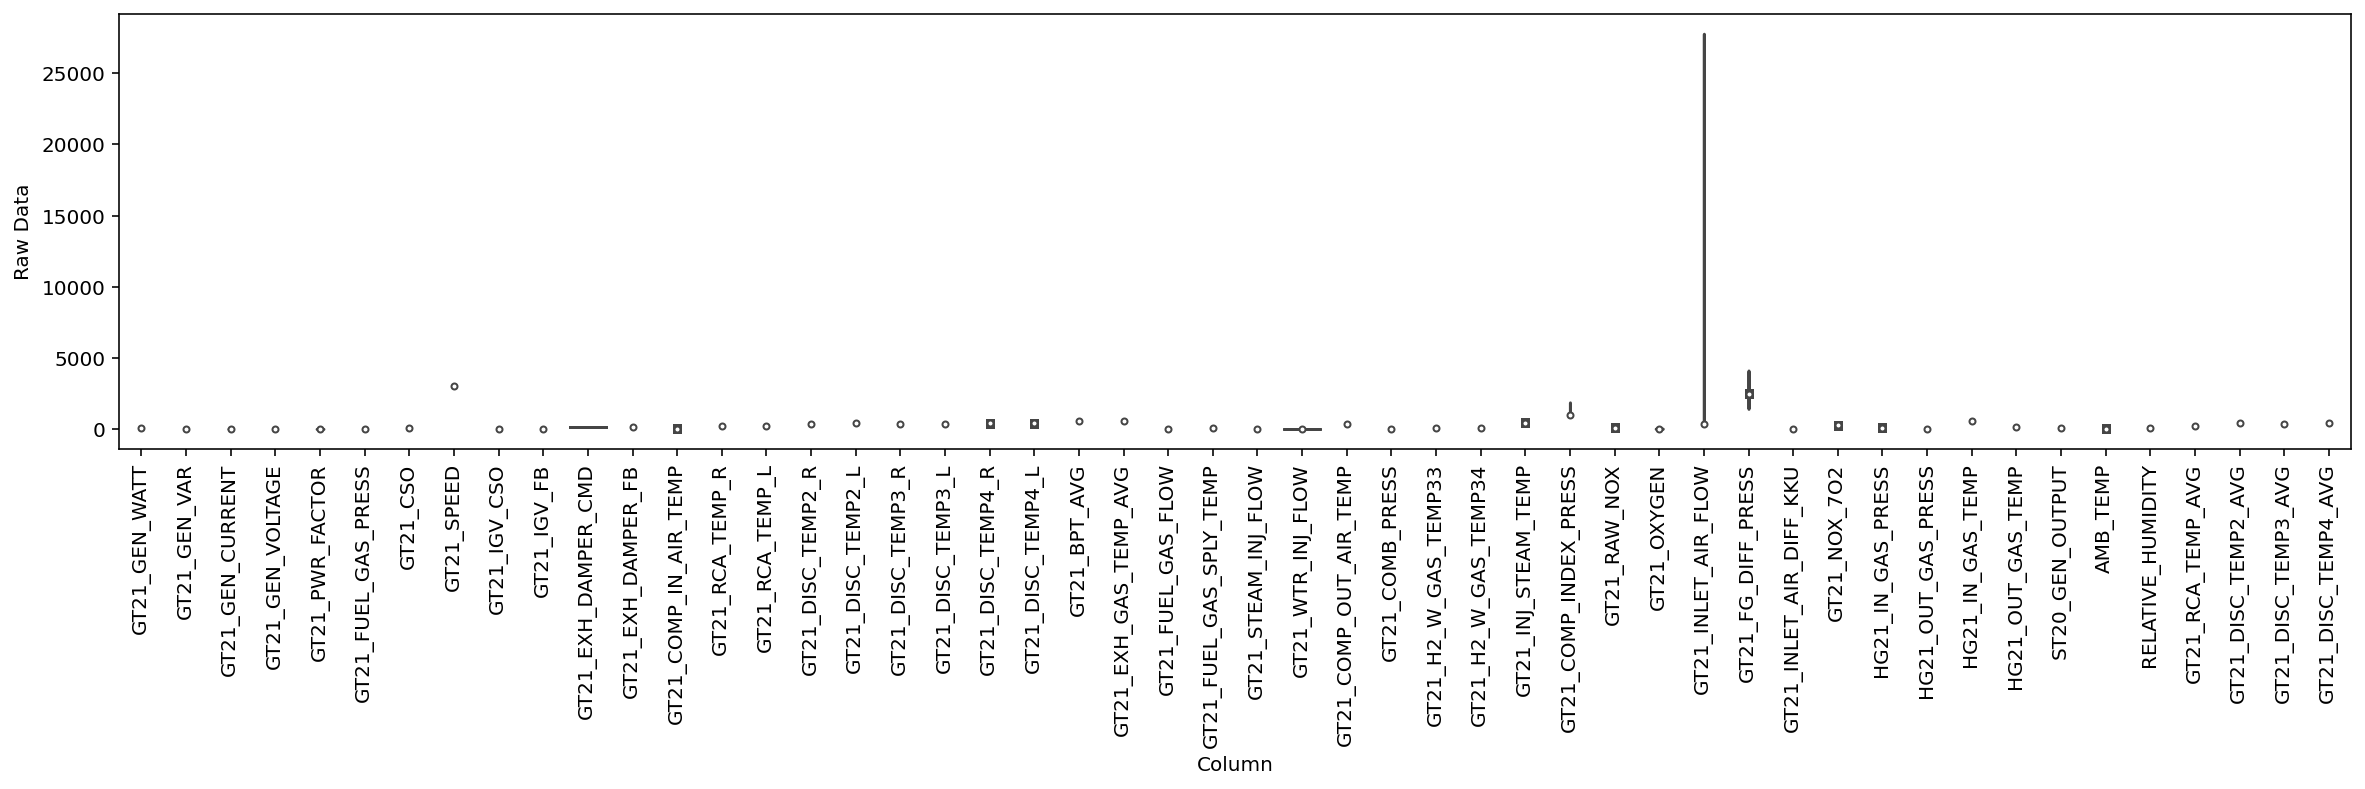

In [9]:
#before normalization 
df_melt = df.melt(var_name='Column', value_name='Raw Data')
#.melt to transform to Long Format (like before pivot table)
plt.figure(figsize=(20, 4))
ax = sns.violinplot(x='Column', y='Raw Data', data=df_melt)
ax.set_xticklabels(df.keys(), rotation=90);

### Gen. and NOx 

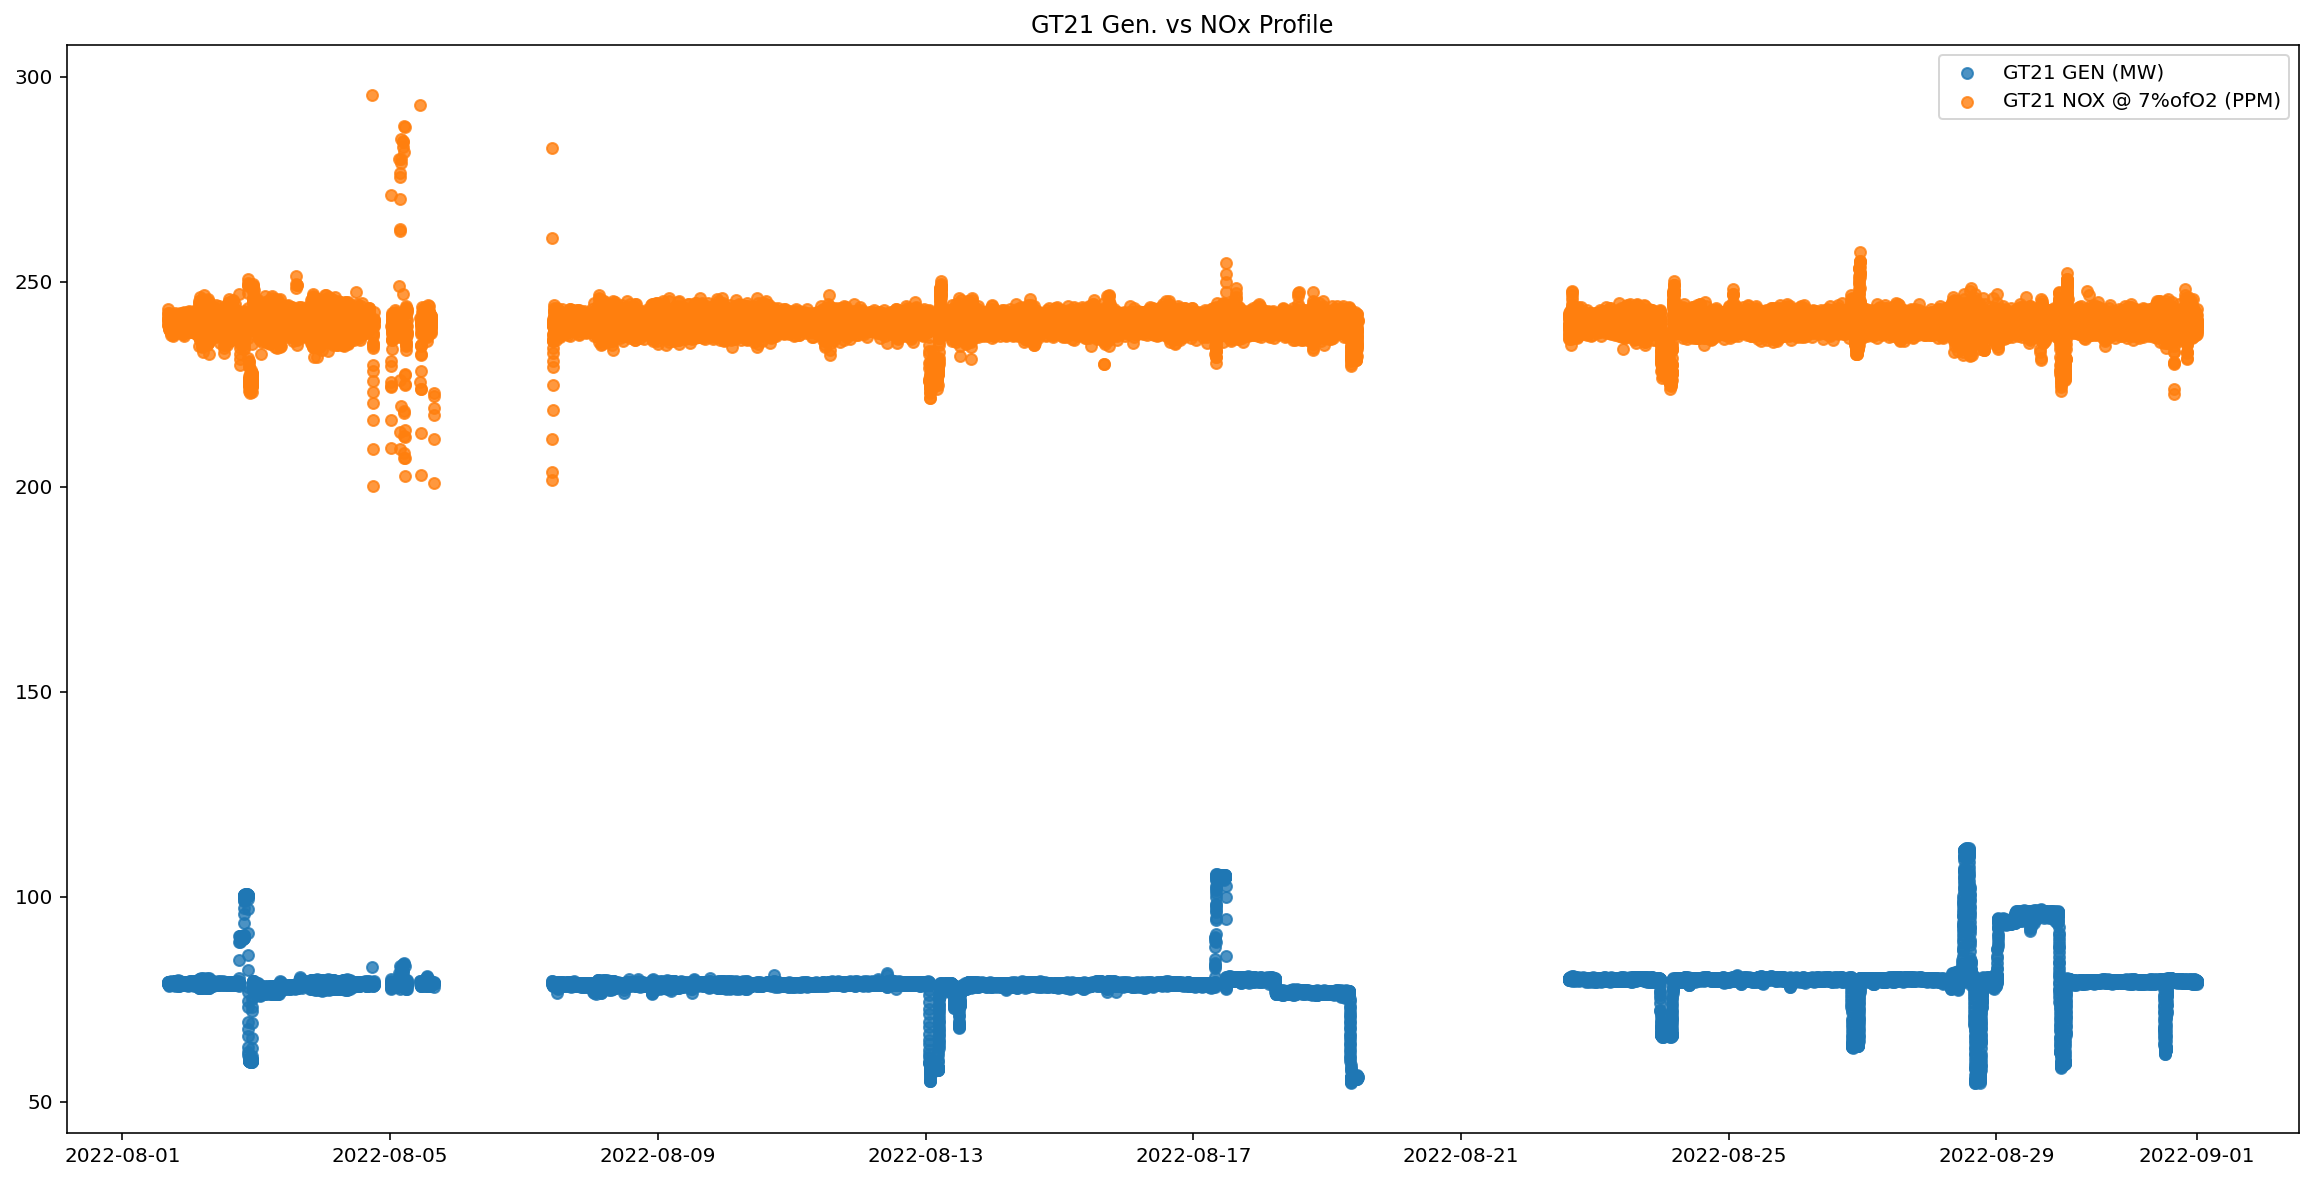

In [10]:
plt.figure(figsize=(20,10))
plt.title('GT21 Gen. vs NOx Profile')
plt.scatter(df.index,df['GT21_GEN_WATT'],s=30,alpha=0.8,label='GT21 GEN (MW)')
plt.scatter(df.index,df['GT21_NOX_7O2'],s=30,alpha=0.8,label='GT21 NOX @ 7%ofO2 (PPM)')
plt.legend()

#plt.figure(figsize=(10,5))
#fig, ax = plt.subplots(2,1,sharex=True)
#ax[0].plot(df['GT21_NOX_7O2'], label='GT21 NOX @ 7%ofO2 (PPM)')
#ax[1].plot(df['GT21_GEN_WATT'], label='GT21 GEN (MW)')

### Correlation BEFORE Feature Selection

<AxesSubplot:title={'center':'Correlation BEFORE Features Selection'}>

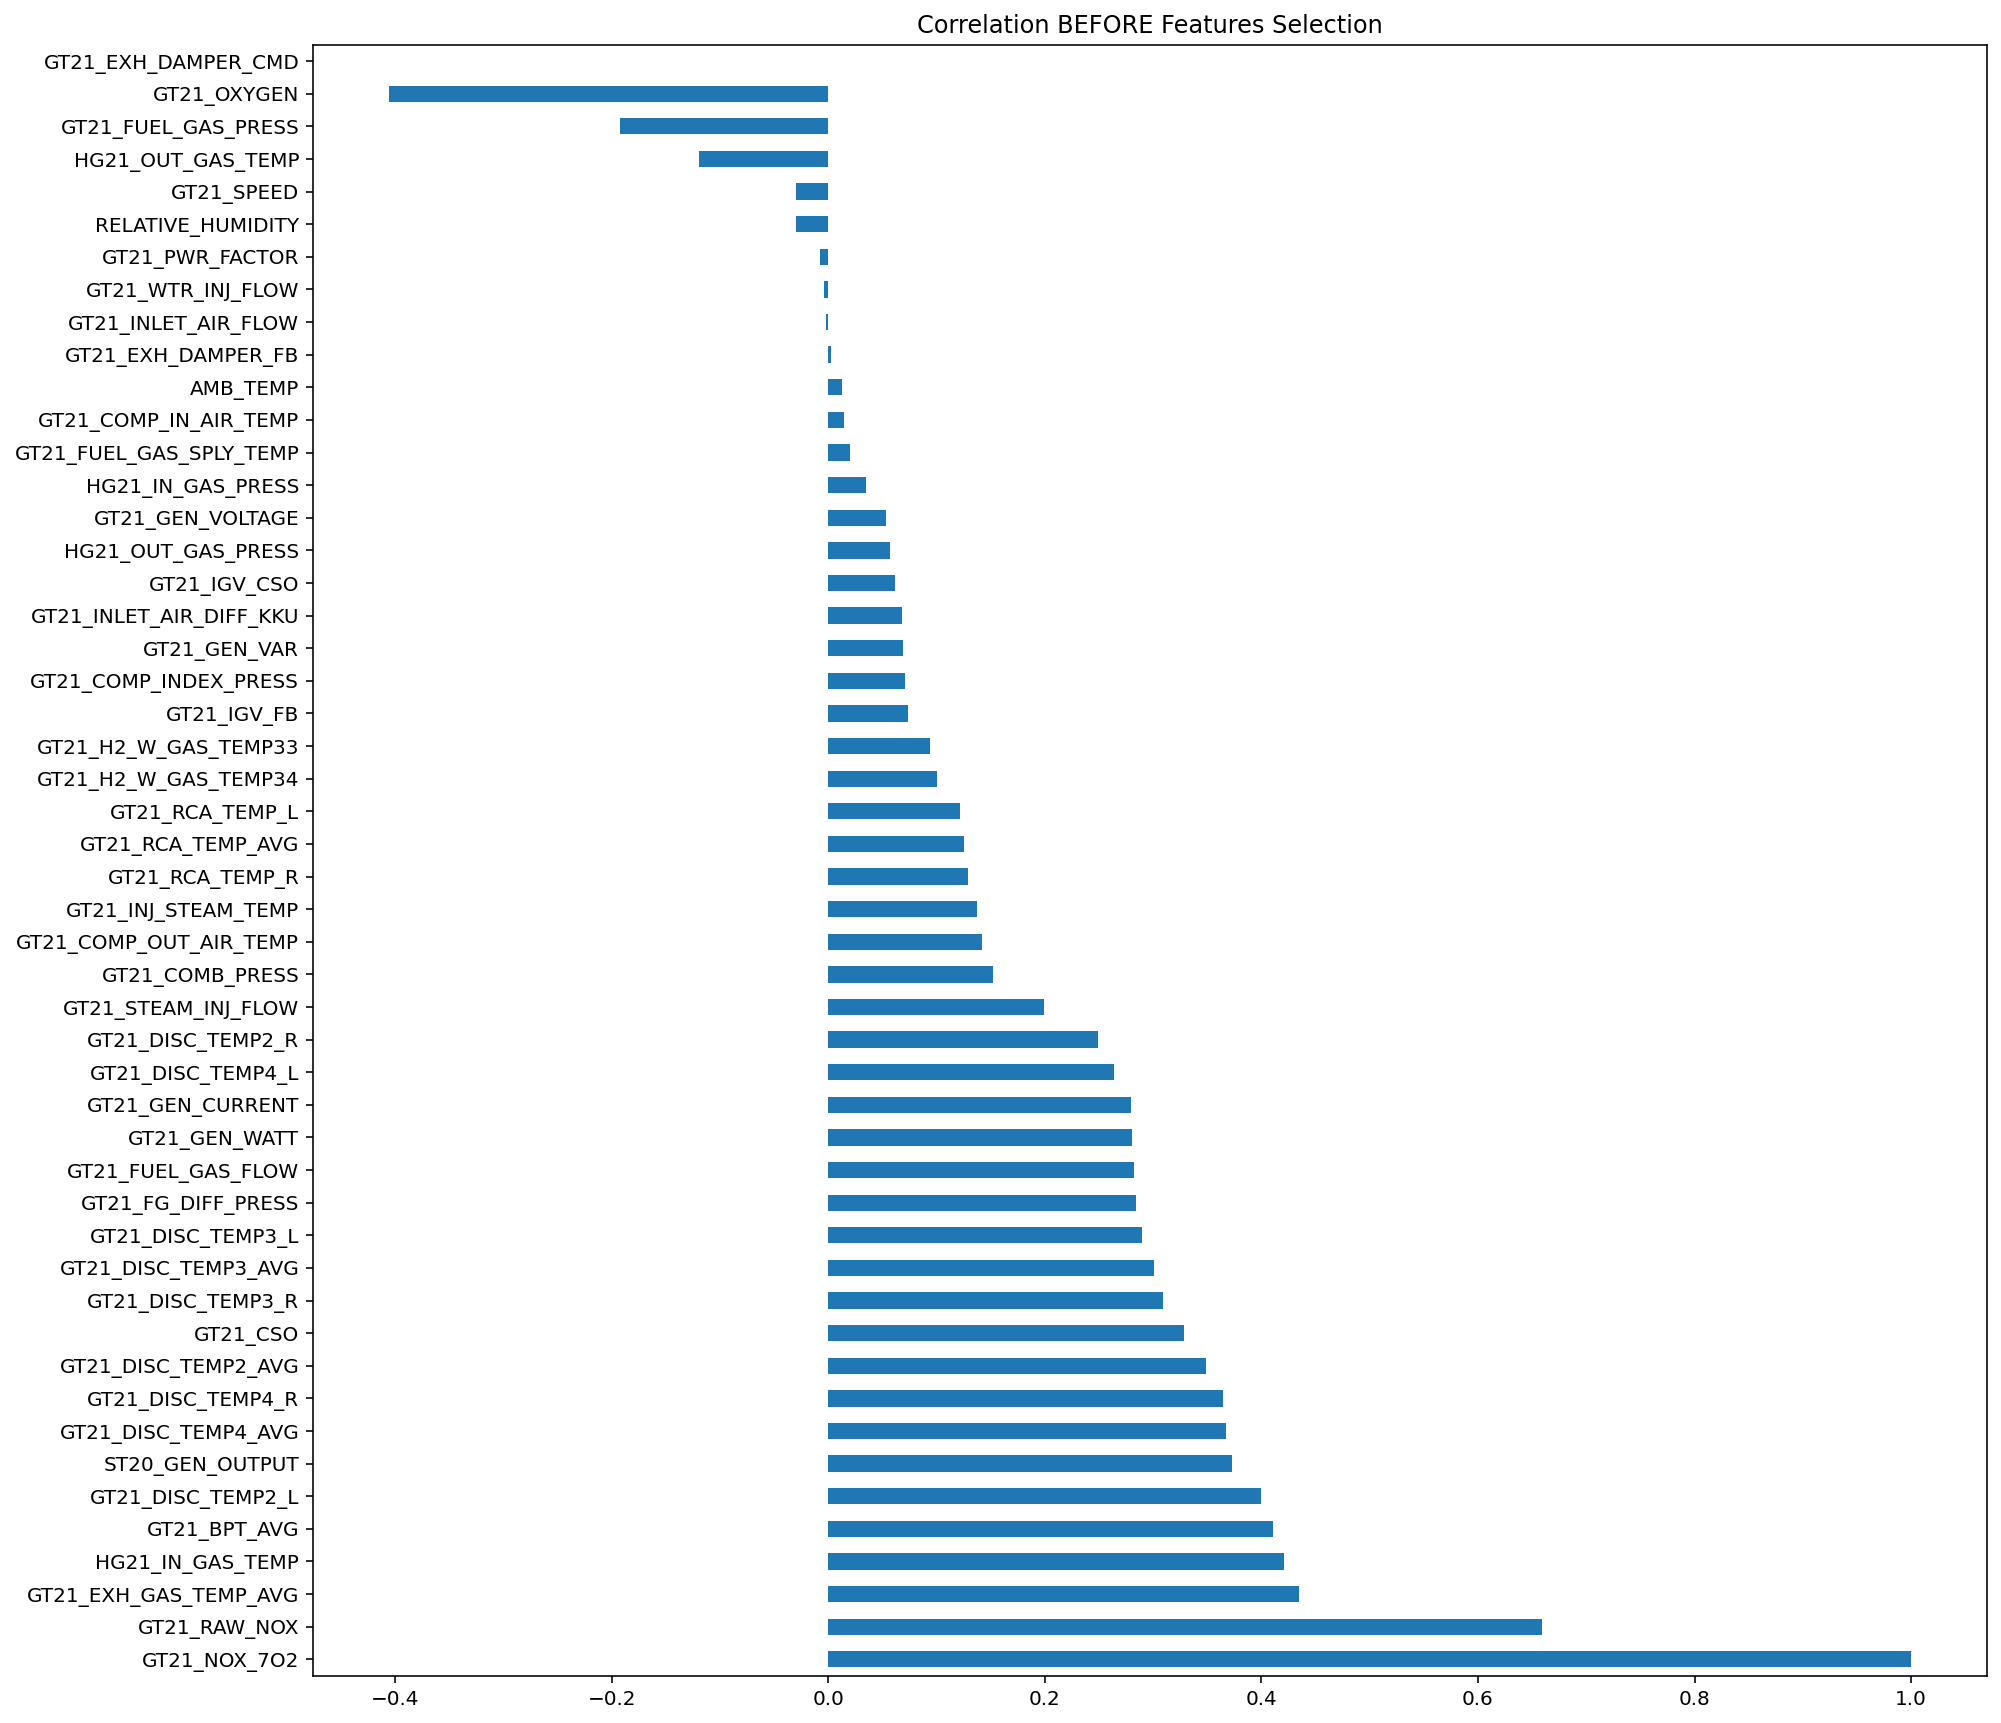

In [11]:
plt.title('Correlation BEFORE Features Selection')
df.corr()['GT21_NOX_7O2'].sort_values(ascending=False).plot(kind='barh',figsize=(15,15))

### Heatamp BEFORE Features Selections

<AxesSubplot:>

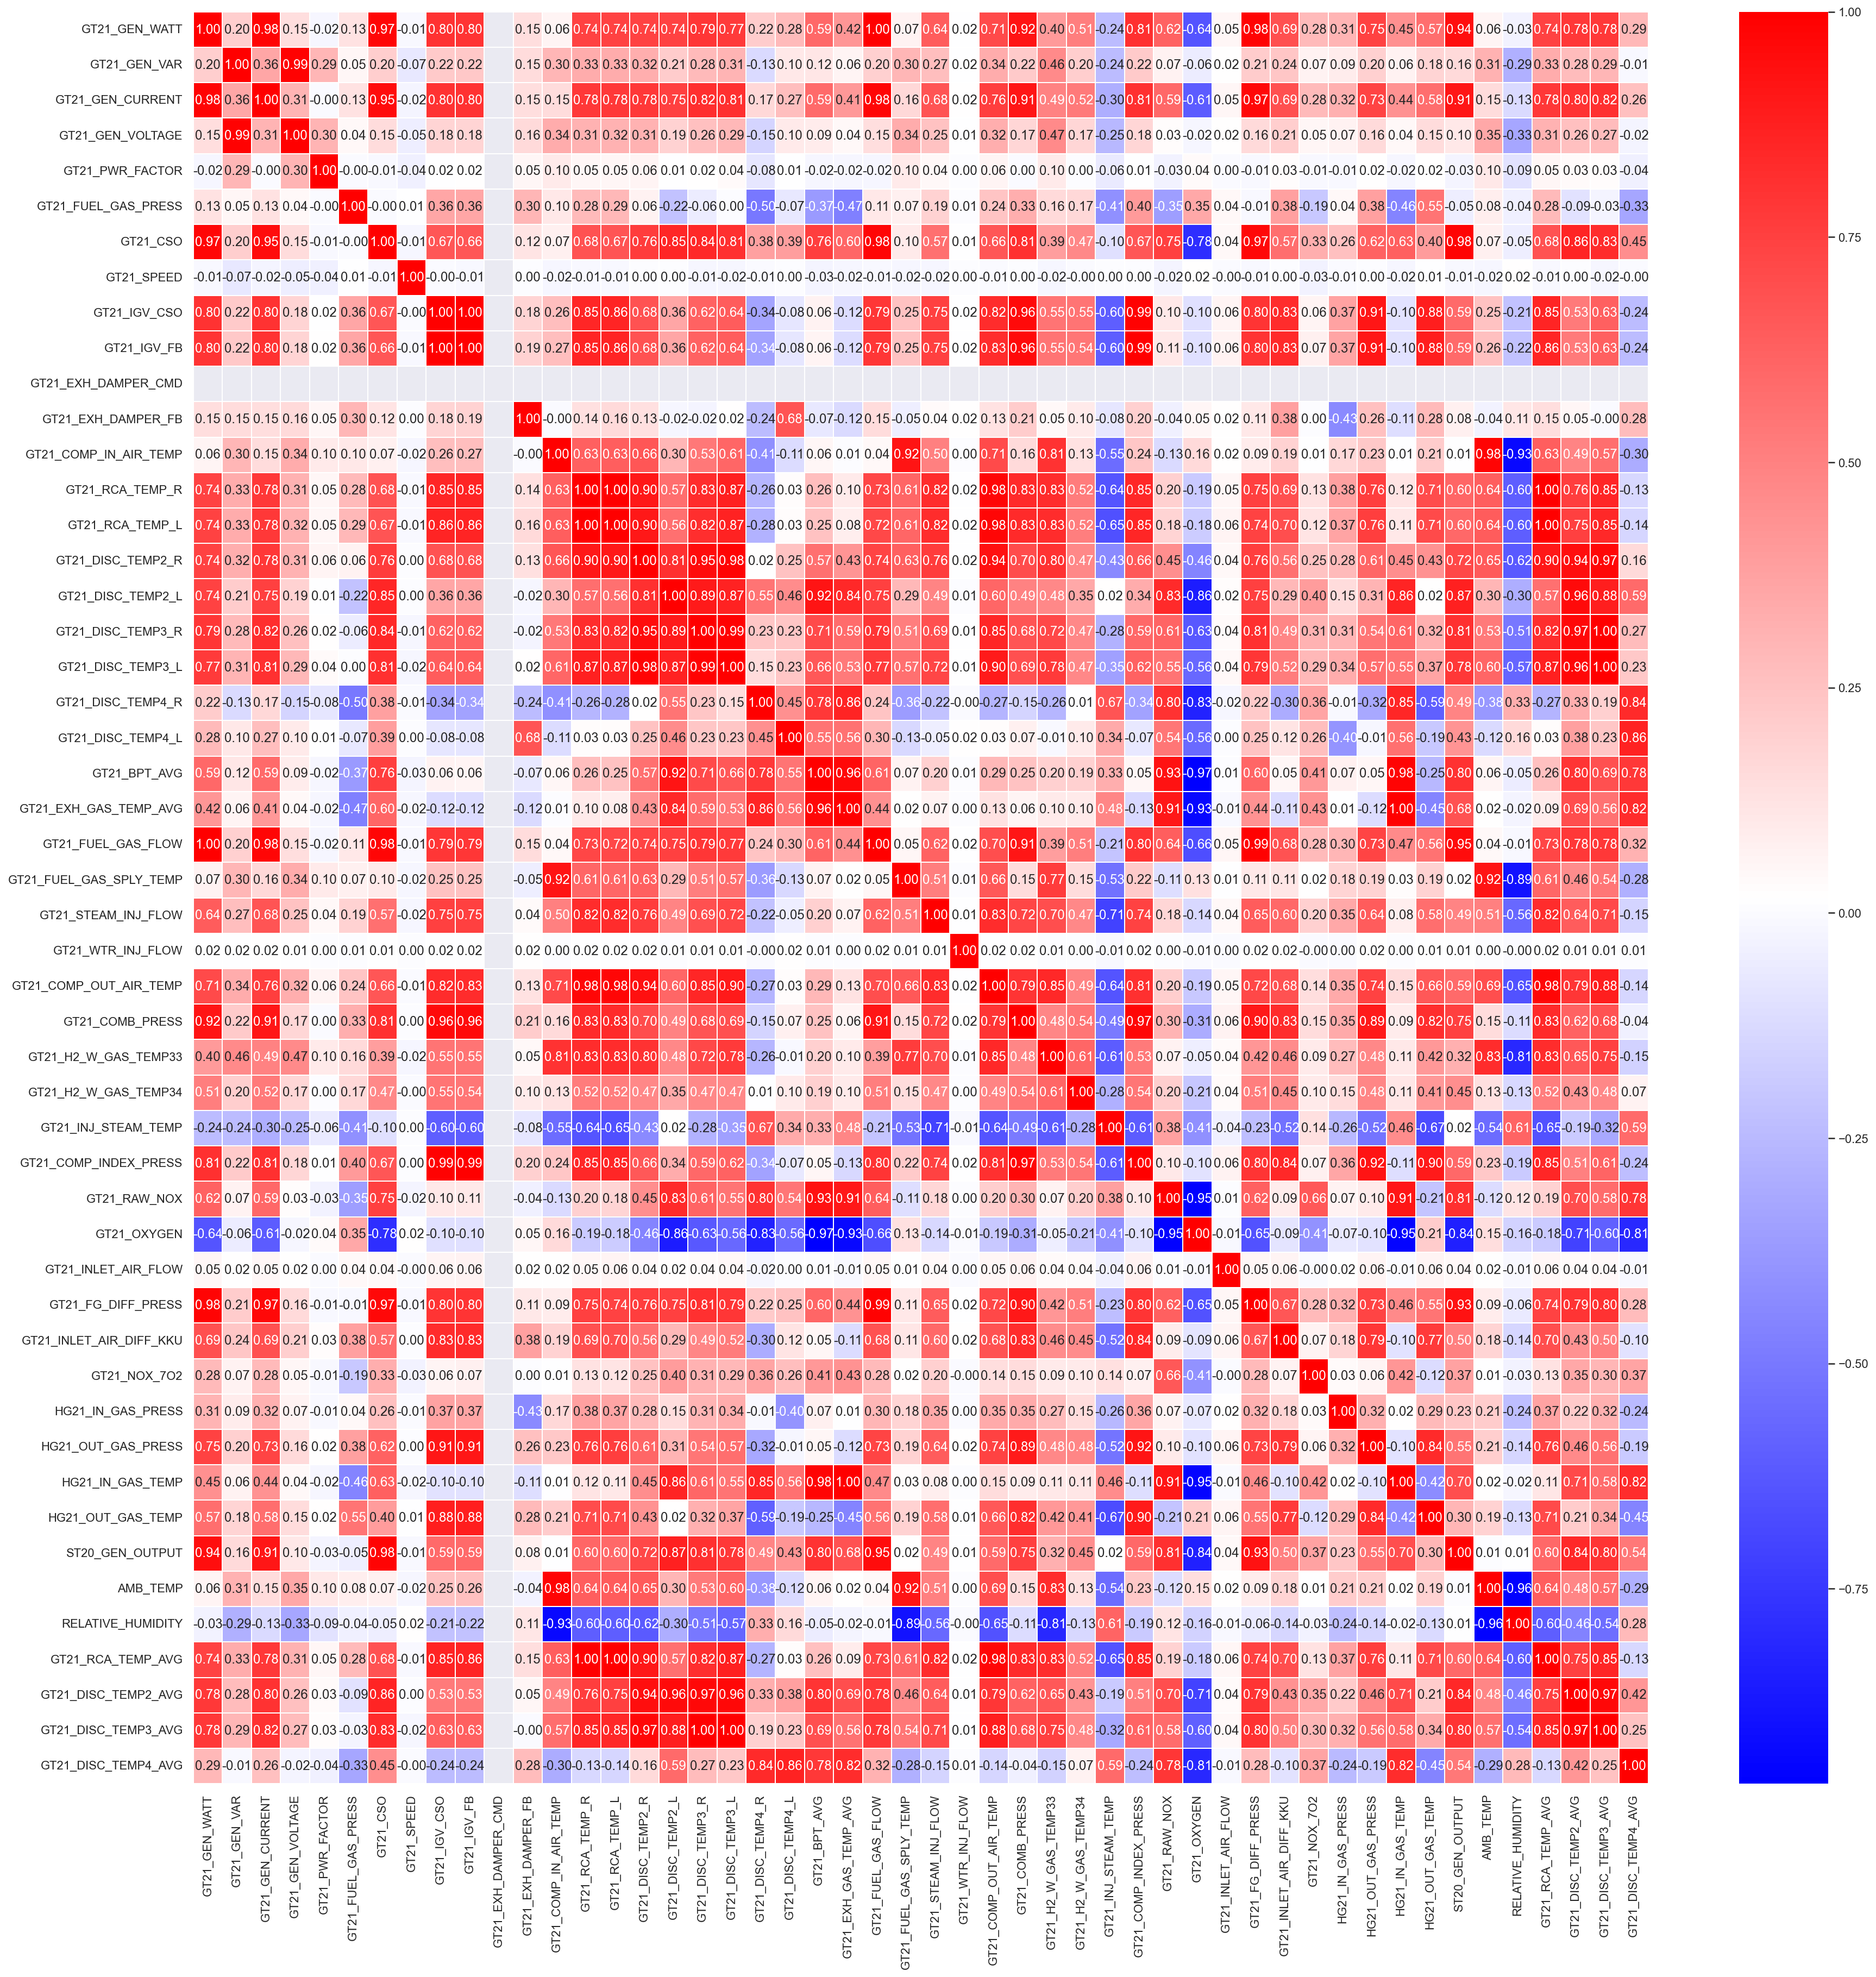

In [12]:
sns.set(rc={'figure.figsize': (30, 30)})
sns.heatmap(df.corr(), cmap ="bwr", annot=True, fmt='.2f', linewidths=0.05)

In [13]:
df.columns

Index(['GT21_GEN_WATT', 'GT21_GEN_VAR', 'GT21_GEN_CURRENT', 'GT21_GEN_VOLTAGE',
       'GT21_PWR_FACTOR', 'GT21_FUEL_GAS_PRESS', 'GT21_CSO', 'GT21_SPEED',
       'GT21_IGV_CSO', 'GT21_IGV_FB', 'GT21_EXH_DAMPER_CMD',
       'GT21_EXH_DAMPER_FB', 'GT21_COMP_IN_AIR_TEMP', 'GT21_RCA_TEMP_R',
       'GT21_RCA_TEMP_L', 'GT21_DISC_TEMP2_R', 'GT21_DISC_TEMP2_L',
       'GT21_DISC_TEMP3_R', 'GT21_DISC_TEMP3_L', 'GT21_DISC_TEMP4_R',
       'GT21_DISC_TEMP4_L', 'GT21_BPT_AVG', 'GT21_EXH_GAS_TEMP_AVG',
       'GT21_FUEL_GAS_FLOW', 'GT21_FUEL_GAS_SPLY_TEMP', 'GT21_STEAM_INJ_FLOW',
       'GT21_WTR_INJ_FLOW', 'GT21_COMP_OUT_AIR_TEMP', 'GT21_COMB_PRESS',
       'GT21_H2_W_GAS_TEMP33', 'GT21_H2_W_GAS_TEMP34', 'GT21_INJ_STEAM_TEMP',
       'GT21_COMP_INDEX_PRESS', 'GT21_RAW_NOX', 'GT21_OXYGEN',
       'GT21_INLET_AIR_FLOW', 'GT21_FG_DIFF_PRESS', 'GT21_INLET_AIR_DIFF_KKU',
       'GT21_NOX_7O2', 'HG21_IN_GAS_PRESS', 'HG21_OUT_GAS_PRESS',
       'HG21_IN_GAS_TEMP', 'HG21_OUT_GAS_TEMP', 'ST20_GEN_OUTPUT',

## Features Selection 
Manual Selection from HeatMap Correlation

In [14]:
#dropcolumns = ['GT21_EXH_DAMPER_CMD','GT21_EXH_DAMPER_FB','GT21_RAW_NOX', 'GT21_GEN_CURRENT', 
#               'GT21_GEN_VOLTAGE','GT21_FG_DIFF_PRESS', 'GT21_RCA_TEMP_R', 'GT21_RCA_TEMP_L',
#               'GT21_DISC_TEMP2_R', 'GT21_DISC_TEMP2_L','GT21_DISC_TEMP3_R', 'GT21_DISC_TEMP3_L',
#               'GT21_DISC_TEMP4_R', 'GT21_DISC_TEMP4_L', 'GT21_OXYGEN', 'GT21_SPEED',
#               'GT21_WTR_INJ_FLOW', 'GT21_IGV_CSO', 'GT21_INLET_AIR_FLOW']
#df.drop(columns=dropcolumns,inplace=True,errors='ignore')

Selected_Features = ['GT21_GEN_WATT', 'GT21_GEN_VAR', 'GT21_PWR_FACTOR','GT21_FUEL_GAS_PRESS',
                     'GT21_CSO', 'GT21_IGV_FB', 'GT21_COMP_IN_AIR_TEMP', 'GT21_BPT_AVG',
                     'GT21_EXH_GAS_TEMP_AVG', 'GT21_FUEL_GAS_FLOW', 'GT21_FUEL_GAS_SPLY_TEMP', 'GT21_STEAM_INJ_FLOW',
                     'GT21_COMP_OUT_AIR_TEMP', 'GT21_COMB_PRESS', 'GT21_H2_W_GAS_TEMP33', 'GT21_H2_W_GAS_TEMP34',
                     'GT21_INJ_STEAM_TEMP', 'GT21_COMP_INDEX_PRESS', 'GT21_INLET_AIR_DIFF_KKU',
                     'HG21_IN_GAS_PRESS', 'HG21_OUT_GAS_PRESS', 'HG21_IN_GAS_TEMP', 'HG21_OUT_GAS_TEMP', 
                     'ST20_GEN_OUTPUT', 'AMB_TEMP', 'RELATIVE_HUMIDITY', 'GT21_NOX_7O2',
                     'GT21_RCA_TEMP_AVG', 'GT21_DISC_TEMP2_AVG', 'GT21_DISC_TEMP3_AVG', 'GT21_DISC_TEMP4_AVG']

### Correlation AFTER Feature Selection

<AxesSubplot:title={'center':'Correlation AFTER Features Selection'}>

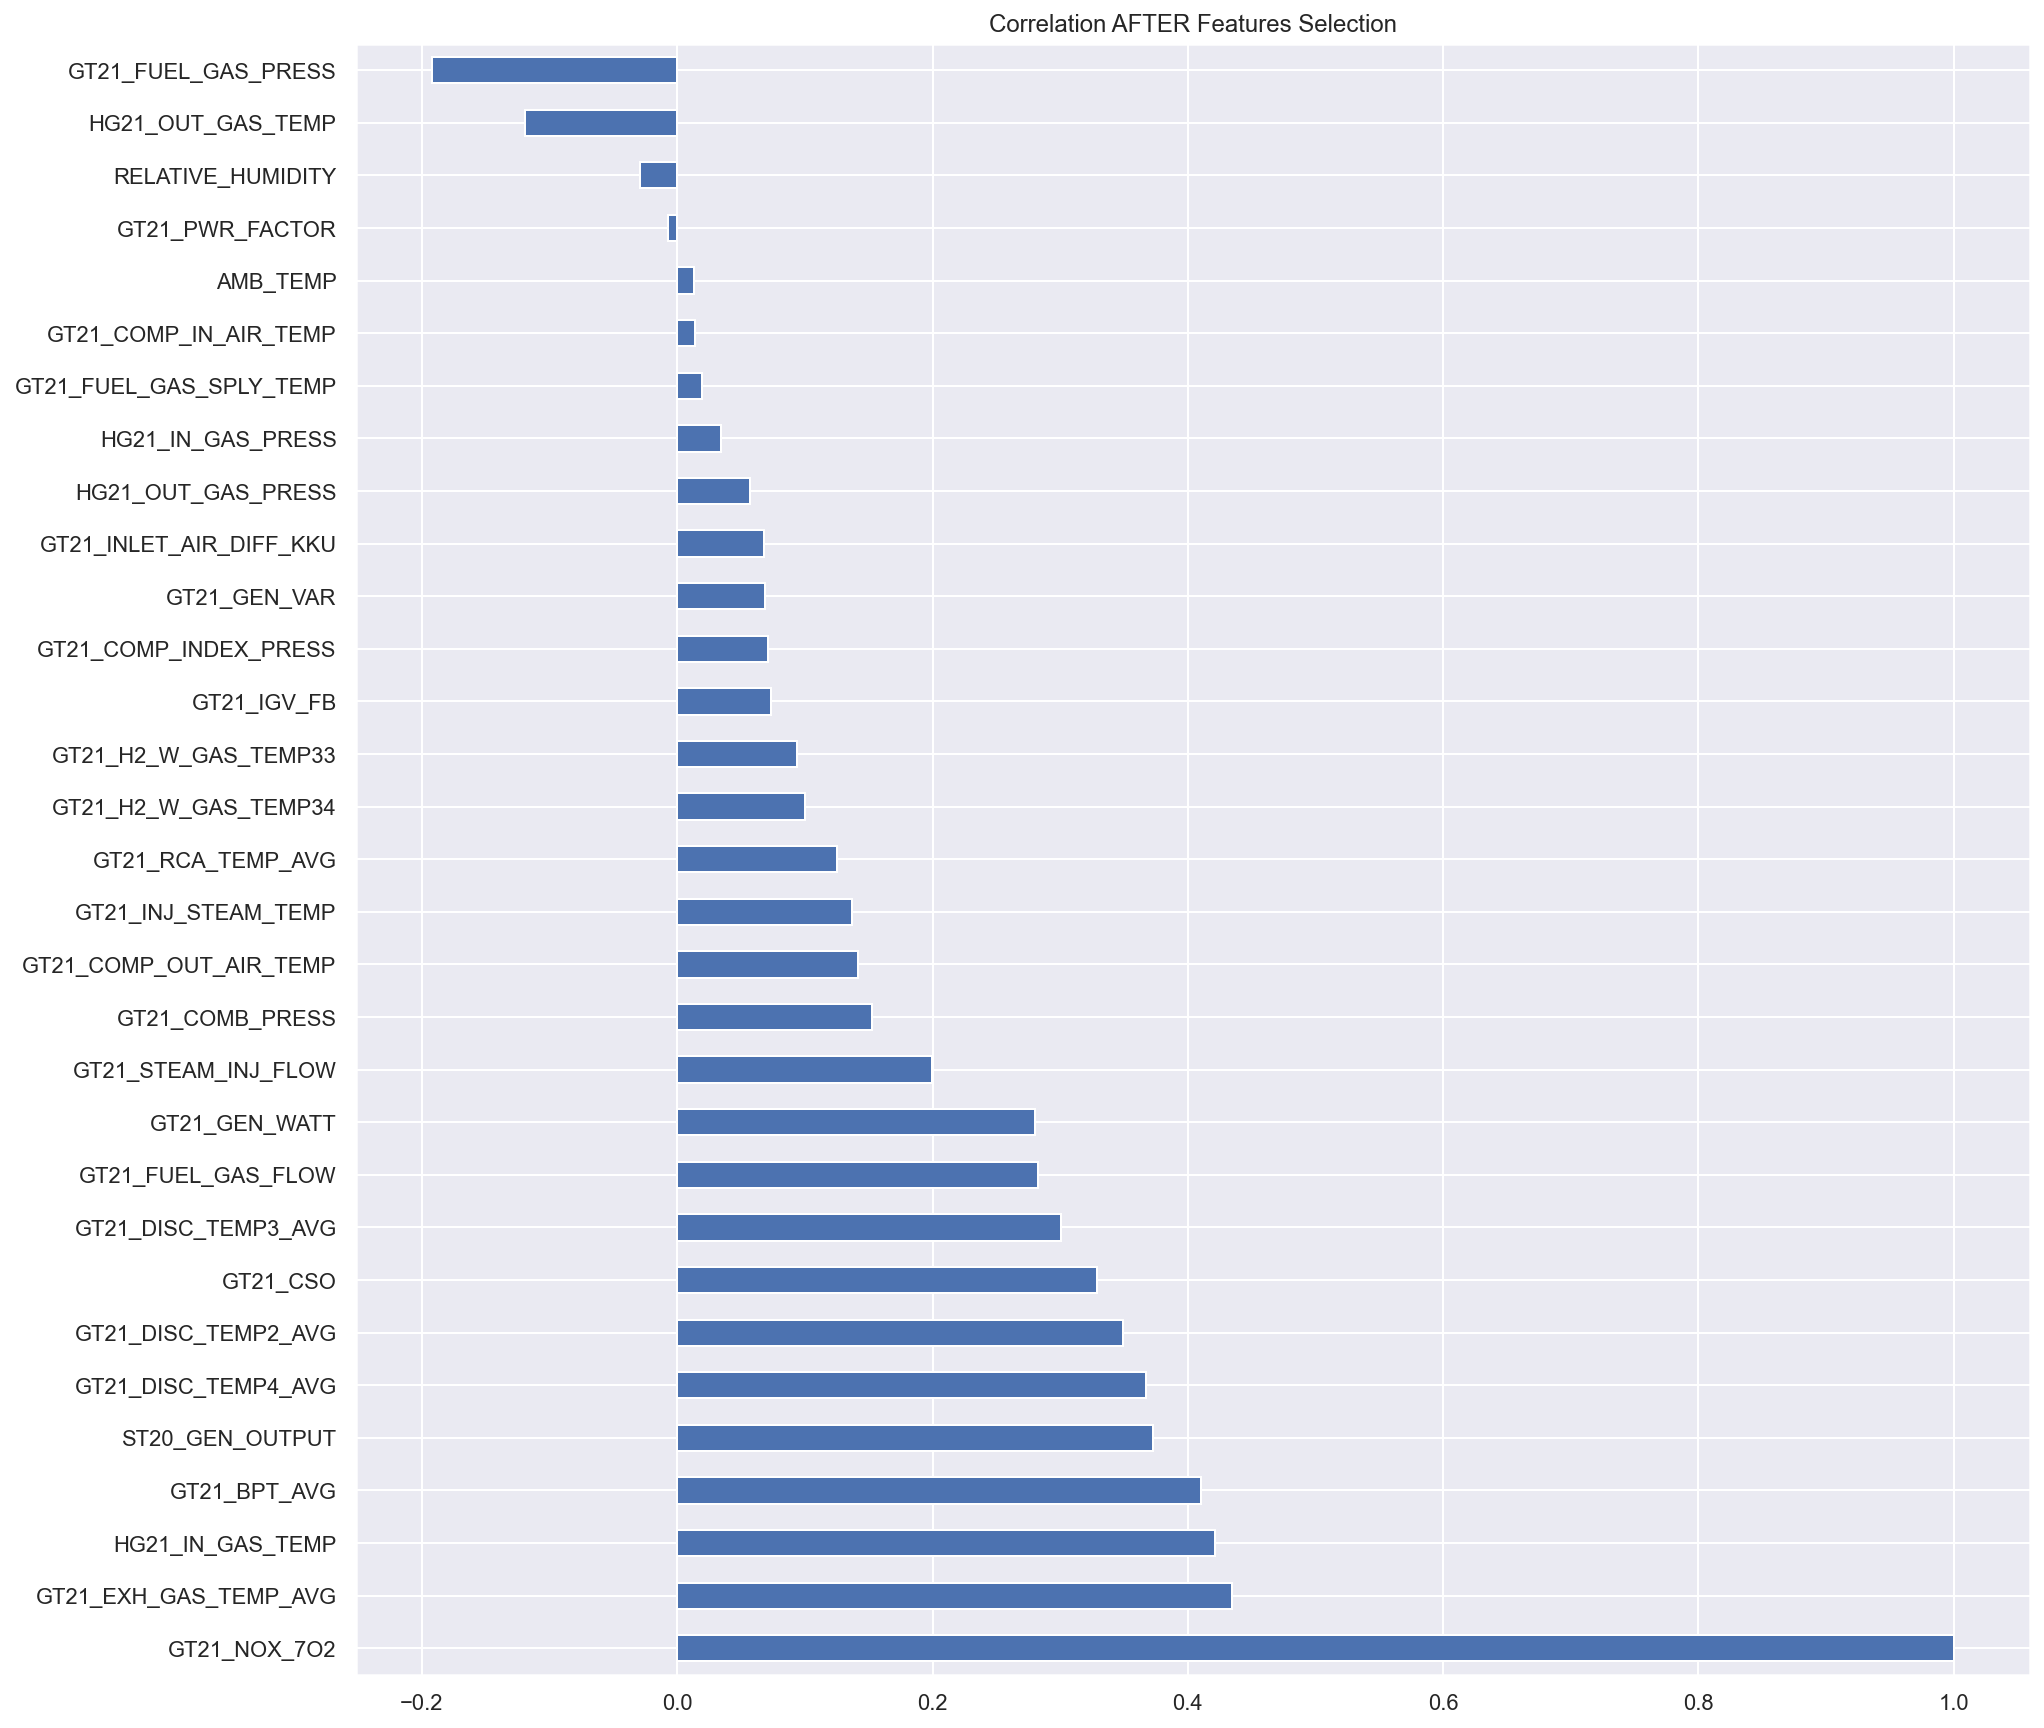

In [15]:
plt.title('Correlation AFTER Features Selection')
df[Selected_Features].corr()['GT21_NOX_7O2'].sort_values(ascending=False).plot(kind='barh',figsize=(15,15))

## Correlation Score

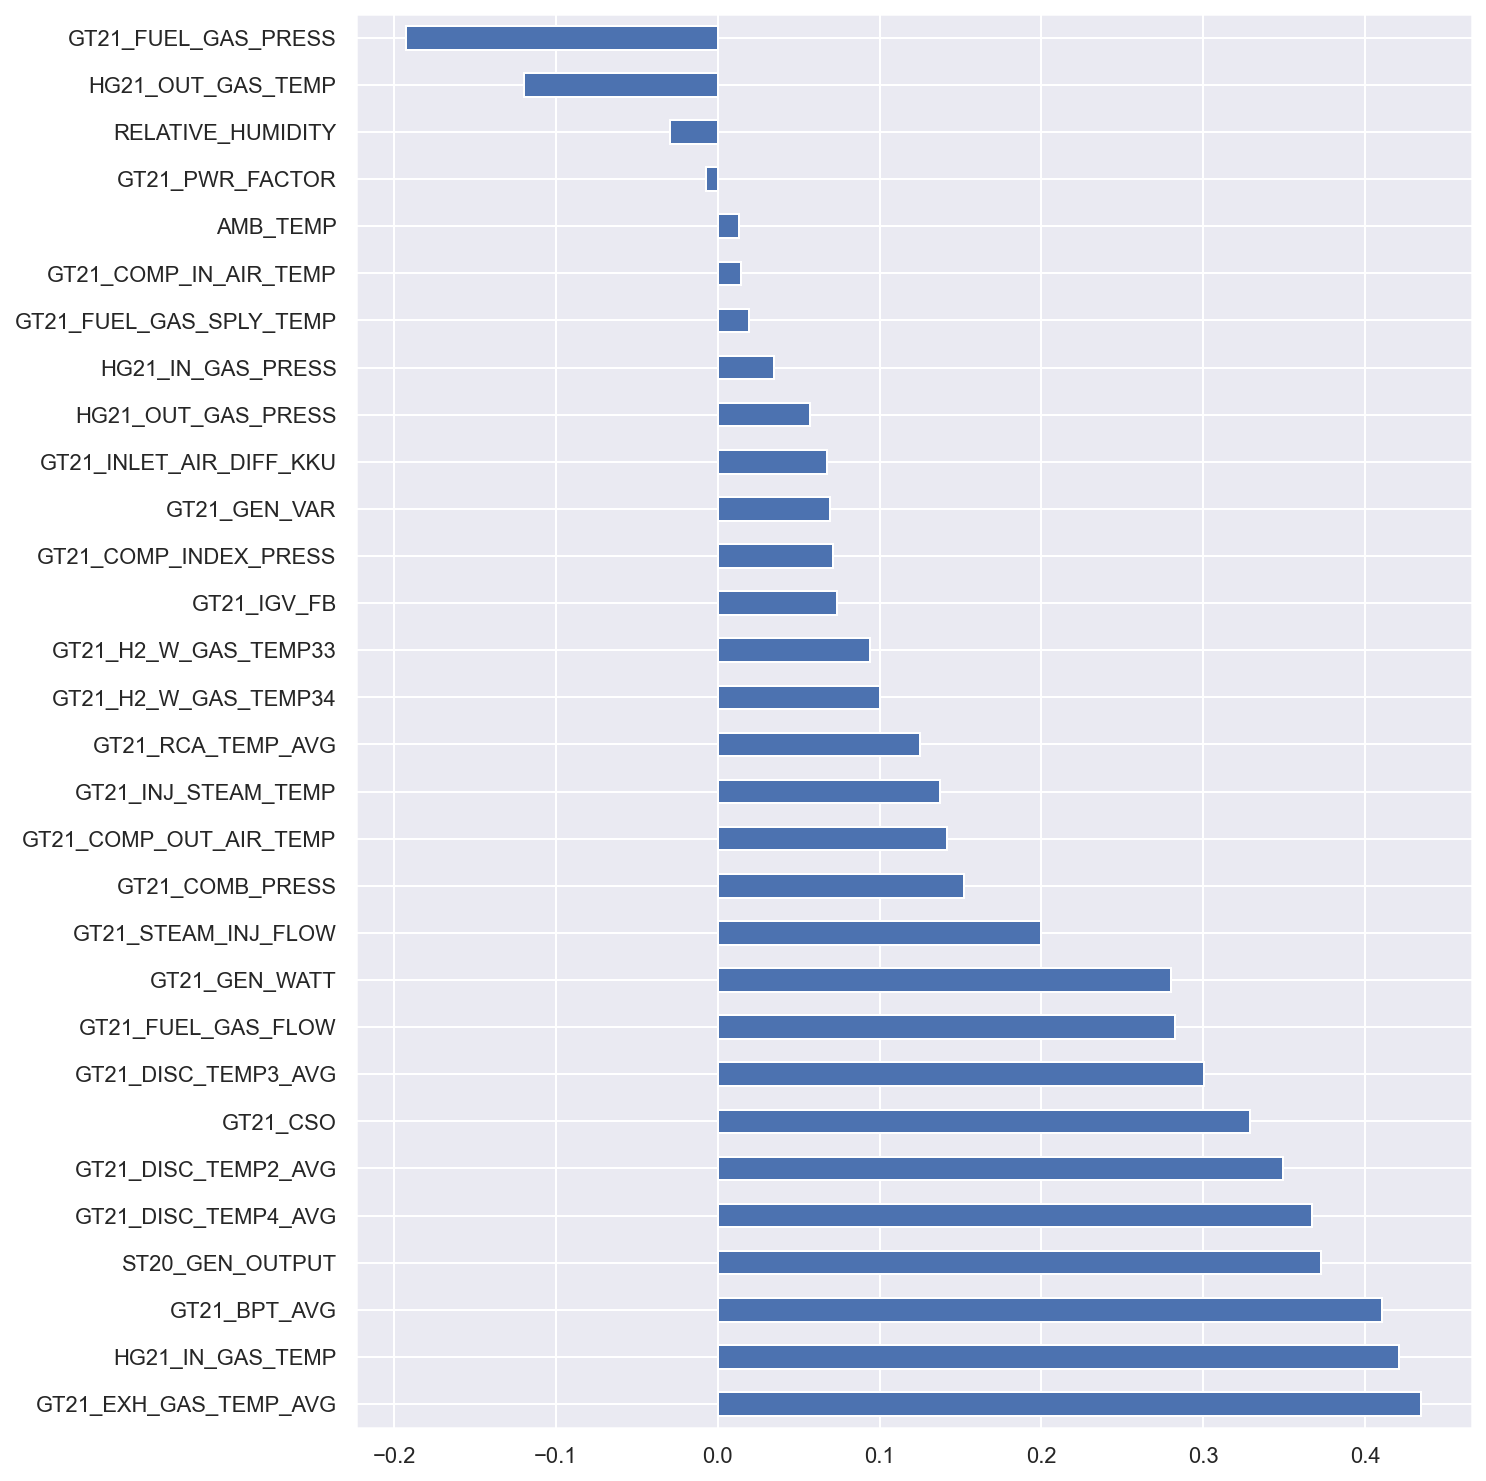

In [16]:
xx = df[Selected_Features].drop('GT21_NOX_7O2', axis=1).apply(lambda x: x.corr(df['GT21_NOX_7O2']))
Result = pd.DataFrame(xx,columns=['Correlation'])
Result['Correlation'].sort_values(ascending=False).plot(kind='barh',figsize=(10,13))
Result = np.abs(Result[['Correlation']])
Result = Result[['Correlation']]*100/Result[['Correlation']].sum()

In [17]:
Result

Correlation
GT21_GEN_WATT               5.319251
GT21_GEN_VAR                1.312234
GT21_PWR_FACTOR             0.137357
GT21_FUEL_GAS_PRESS         3.653014
GT21_CSO                    6.240947
GT21_IGV_FB                 1.398710
GT21_COMP_IN_AIR_TEMP       0.269473
GT21_BPT_AVG                7.793561
GT21_EXH_GAS_TEMP_AVG       8.251142
GT21_FUEL_GAS_FLOW          5.367446
GT21_FUEL_GAS_SPLY_TEMP     0.372787
GT21_STEAM_INJ_FLOW         3.789002
GT21_COMP_OUT_AIR_TEMP      2.688423
GT21_COMB_PRESS             2.891822
GT21_H2_W_GAS_TEMP33        1.785144
GT21_H2_W_GAS_TEMP34        1.907270
GT21_INJ_STEAM_TEMP         2.603355
GT21_COMP_INDEX_PRESS       1.351492
GT21_INLET_AIR_DIFF_KKU     1.286749
HG21_IN_GAS_PRESS           0.657164
HG21_OUT_GAS_PRESS          1.087198
HG21_IN_GAS_TEMP            7.995298
HG21_OUT_GAS_TEMP           2.270065
ST20_GEN_OUTPUT             7.080754
AMB_TEMP                    0.243988
RELATIVE_HUMIDITY           0.560712
GT21_RCA_TEMP_AVG           2.376763
GT21_DISC_TEMP2_AVG         6.629568
GT21_DISC_TEMP3_AVG         5.708785
GT21_DISC_TEMP4_AVG         6.970524

# Prediction & Show Feature importance

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')

In [19]:
#Show Feature Importance and Concat Data
def showandconcat(model_name,importance,Result):
    f_imp = pd.DataFrame(importance, index= train.columns,columns=[model_name])
    f_imp.sort_values(by=[model_name],ascending=False)
    
    f_imp.sort_values(by=[model_name],ascending=True).plot(kind='barh',figsize=(8,9))
    title = 'GT21 Features Important from '+model_name
    plt.title(title)
    
    f_imp_p = np.abs(f_imp)*100/np.abs(f_imp).sum()
    Result = pd.concat([Result,f_imp_p],axis=1)
    Result = Result.loc[:,~Result.columns.duplicated()]
    return Result

In [20]:
#Show Testing and Prediction
def showtestpredict(model_name,y_test_org,y_pred_org):
    
    plt.figure(figsize=(20,10))
    plt.title('GT21 NOx Prediction from ' +model_name)
    plt.scatter(test.index,y_test_org,alpha=0.6,label='test')
    plt.scatter(test.index,y_pred_org,alpha=0.6,label='predict')
    plt.xlabel('Date-Time', fontsize=15)
    plt.ylabel('NOx(ppm)', fontsize=15)
    plt.legend()

In [21]:
#Concat Accurracy DF
def concatacc(model_name,index_name,accuracy_df,accuracy):
    
    print(f'Testing {index_name} = {accuracy:.4f}')
    accuracy_tmp = pd.DataFrame(accuracy,columns=[model_name],index=[index_name])
    accuracy_df = pd.concat([accuracy_df,accuracy_tmp],axis=1).drop_duplicates()
    accuracy_df = accuracy_df.loc[:,~accuracy_df.columns.duplicated()]

    return accuracy_df

## Data Standardization (Normalization)
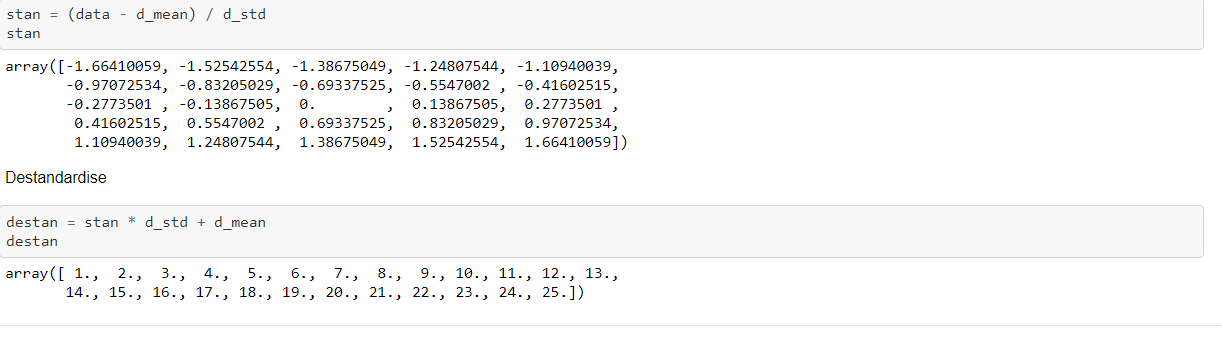

In [22]:
#Prepare Train/Test Data 70:30

train_org, test_org, y_train_org, y_test_org = train_test_split(df[Selected_Features].drop('GT21_NOX_7O2', axis=1), df['GT21_NOX_7O2'], test_size=0.30, random_state=1)

# Standardization
tr_mean = train_org.mean()
tr_std = train_org.std()

train = (train_org - tr_mean)/tr_std
test = (test_org - tr_mean)/tr_std  #use training mean and std


y_train_mean = y_train_org.mean()
y_train_std = y_train_org.std()  

y_train = (y_train_org-y_train_mean)/y_train_std
y_test = (y_test_org-y_train_mean)/y_train_std  #use training mean and std

In [23]:
#Monitor Train Test Ratio
print(f'train shape = {train.shape}')
print(f'test shape = {test.shape}')
print(f'y_train shape = {y_train.shape}')
print(f'y_test shape = {y_test.shape}')

train shape = (24878, 30)
test shape = (10662, 30)
y_train shape = (24878,)
y_test shape = (10662,)


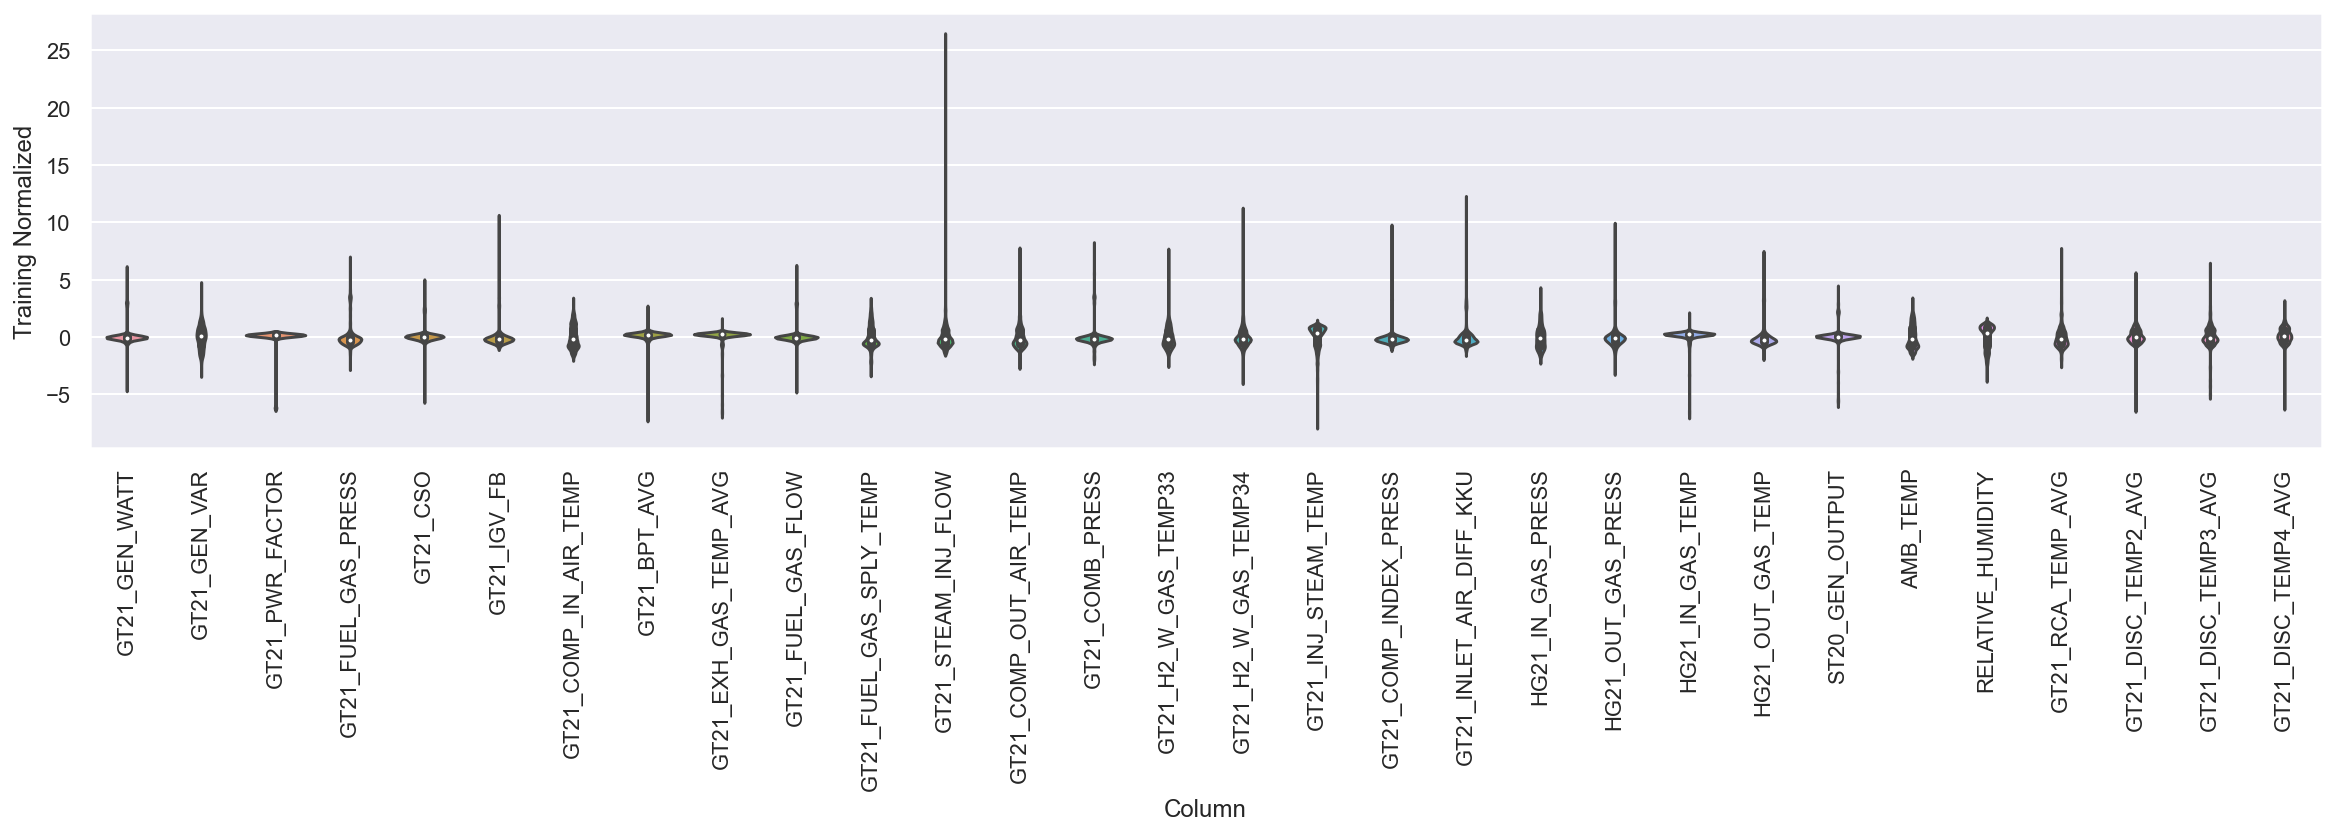

In [24]:
#Training Data after Standardization
df_std_melt = train.melt(var_name='Column', value_name='Training Normalized')
plt.figure(figsize=(20, 4))
ax = sns.violinplot(x='Column', y='Training Normalized', data=df_std_melt)
ax.set_xticklabels(train.keys(), rotation=90);

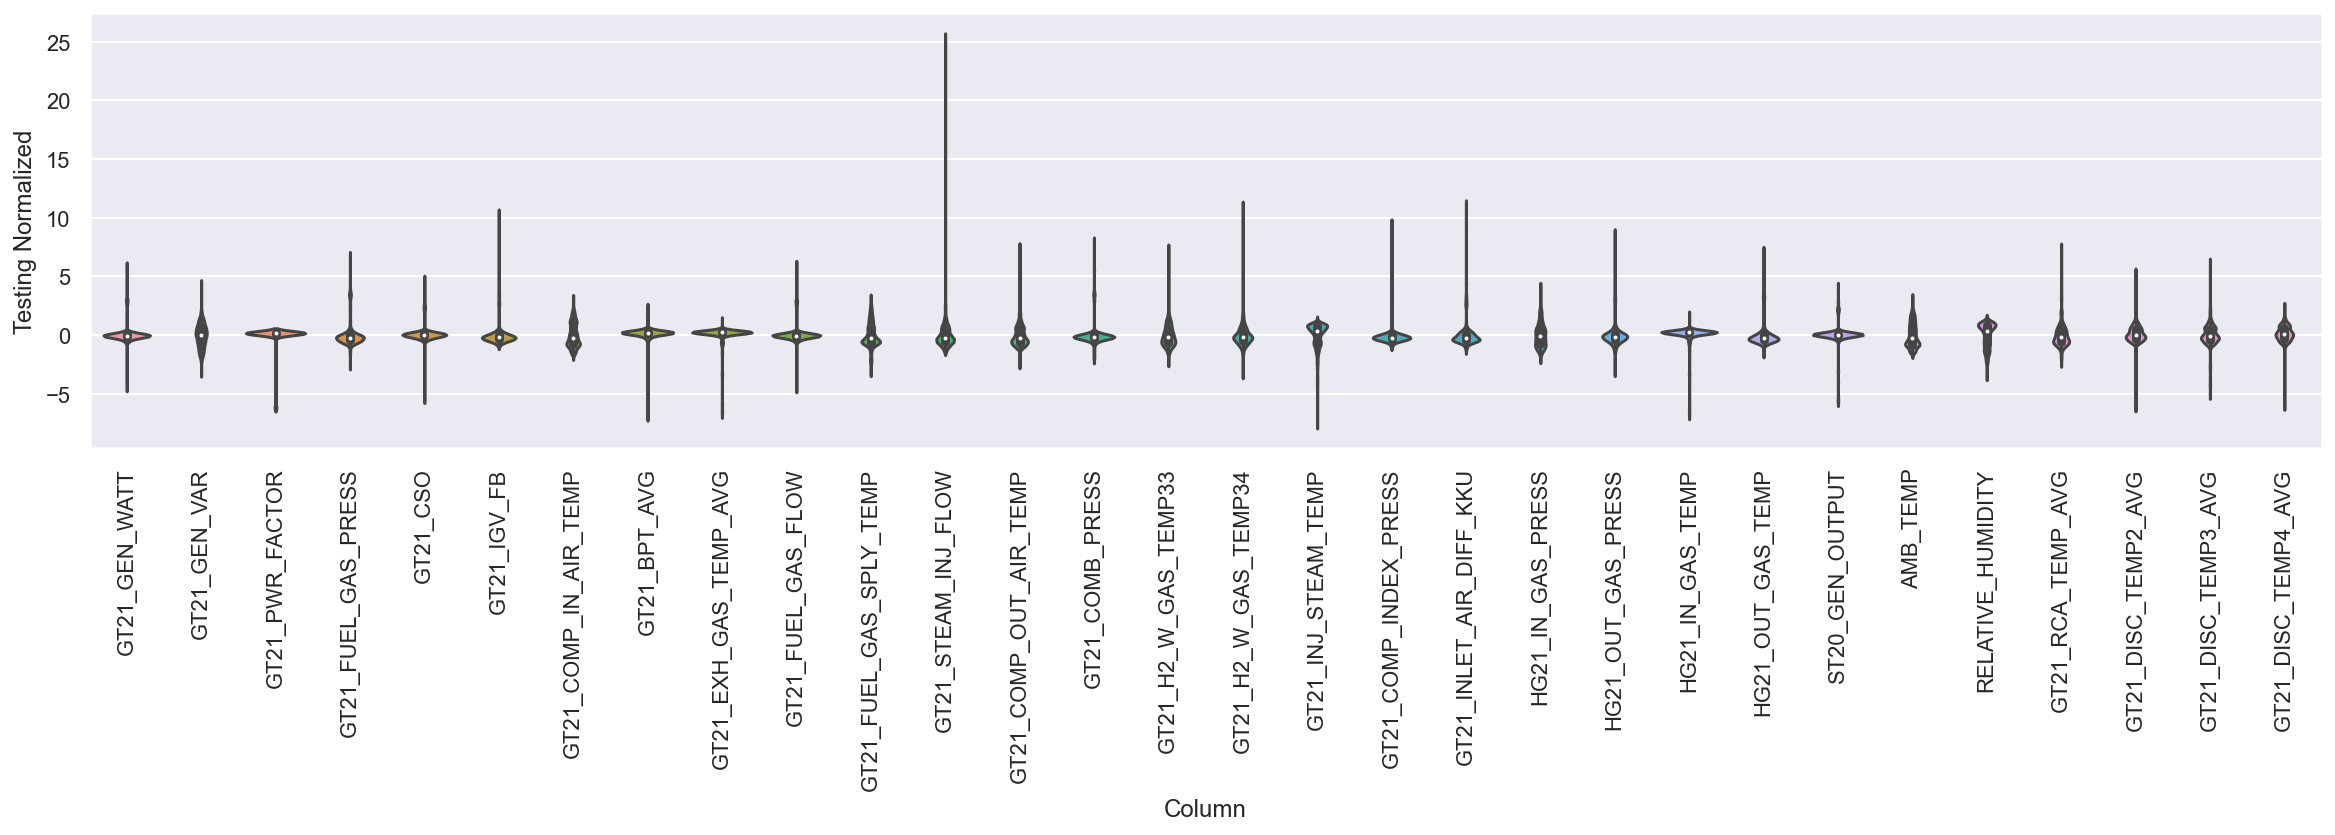

In [25]:
#Testing Data after Standardization
df_std_melt = test.melt(var_name='Column', value_name='Testing Normalized')
plt.figure(figsize=(20, 4))
ax = sns.violinplot(x='Column', y='Testing Normalized', data=df_std_melt)
ax.set_xticklabels(test.keys(), rotation=90);

## Linear Regression 

In [26]:
# ************* Create Initial Empty DF **********
empty_list = [] 
accuracy_mae = pd.DataFrame(empty_list)
accuracy_mape = pd.DataFrame(empty_list)
accuracy_mse = pd.DataFrame(empty_list)

### Prediction and Error Metric

Testing MAE(ppm) = 1.4546
Testing MAPE(%) = 0.6078
Testing MSE = 5.4043


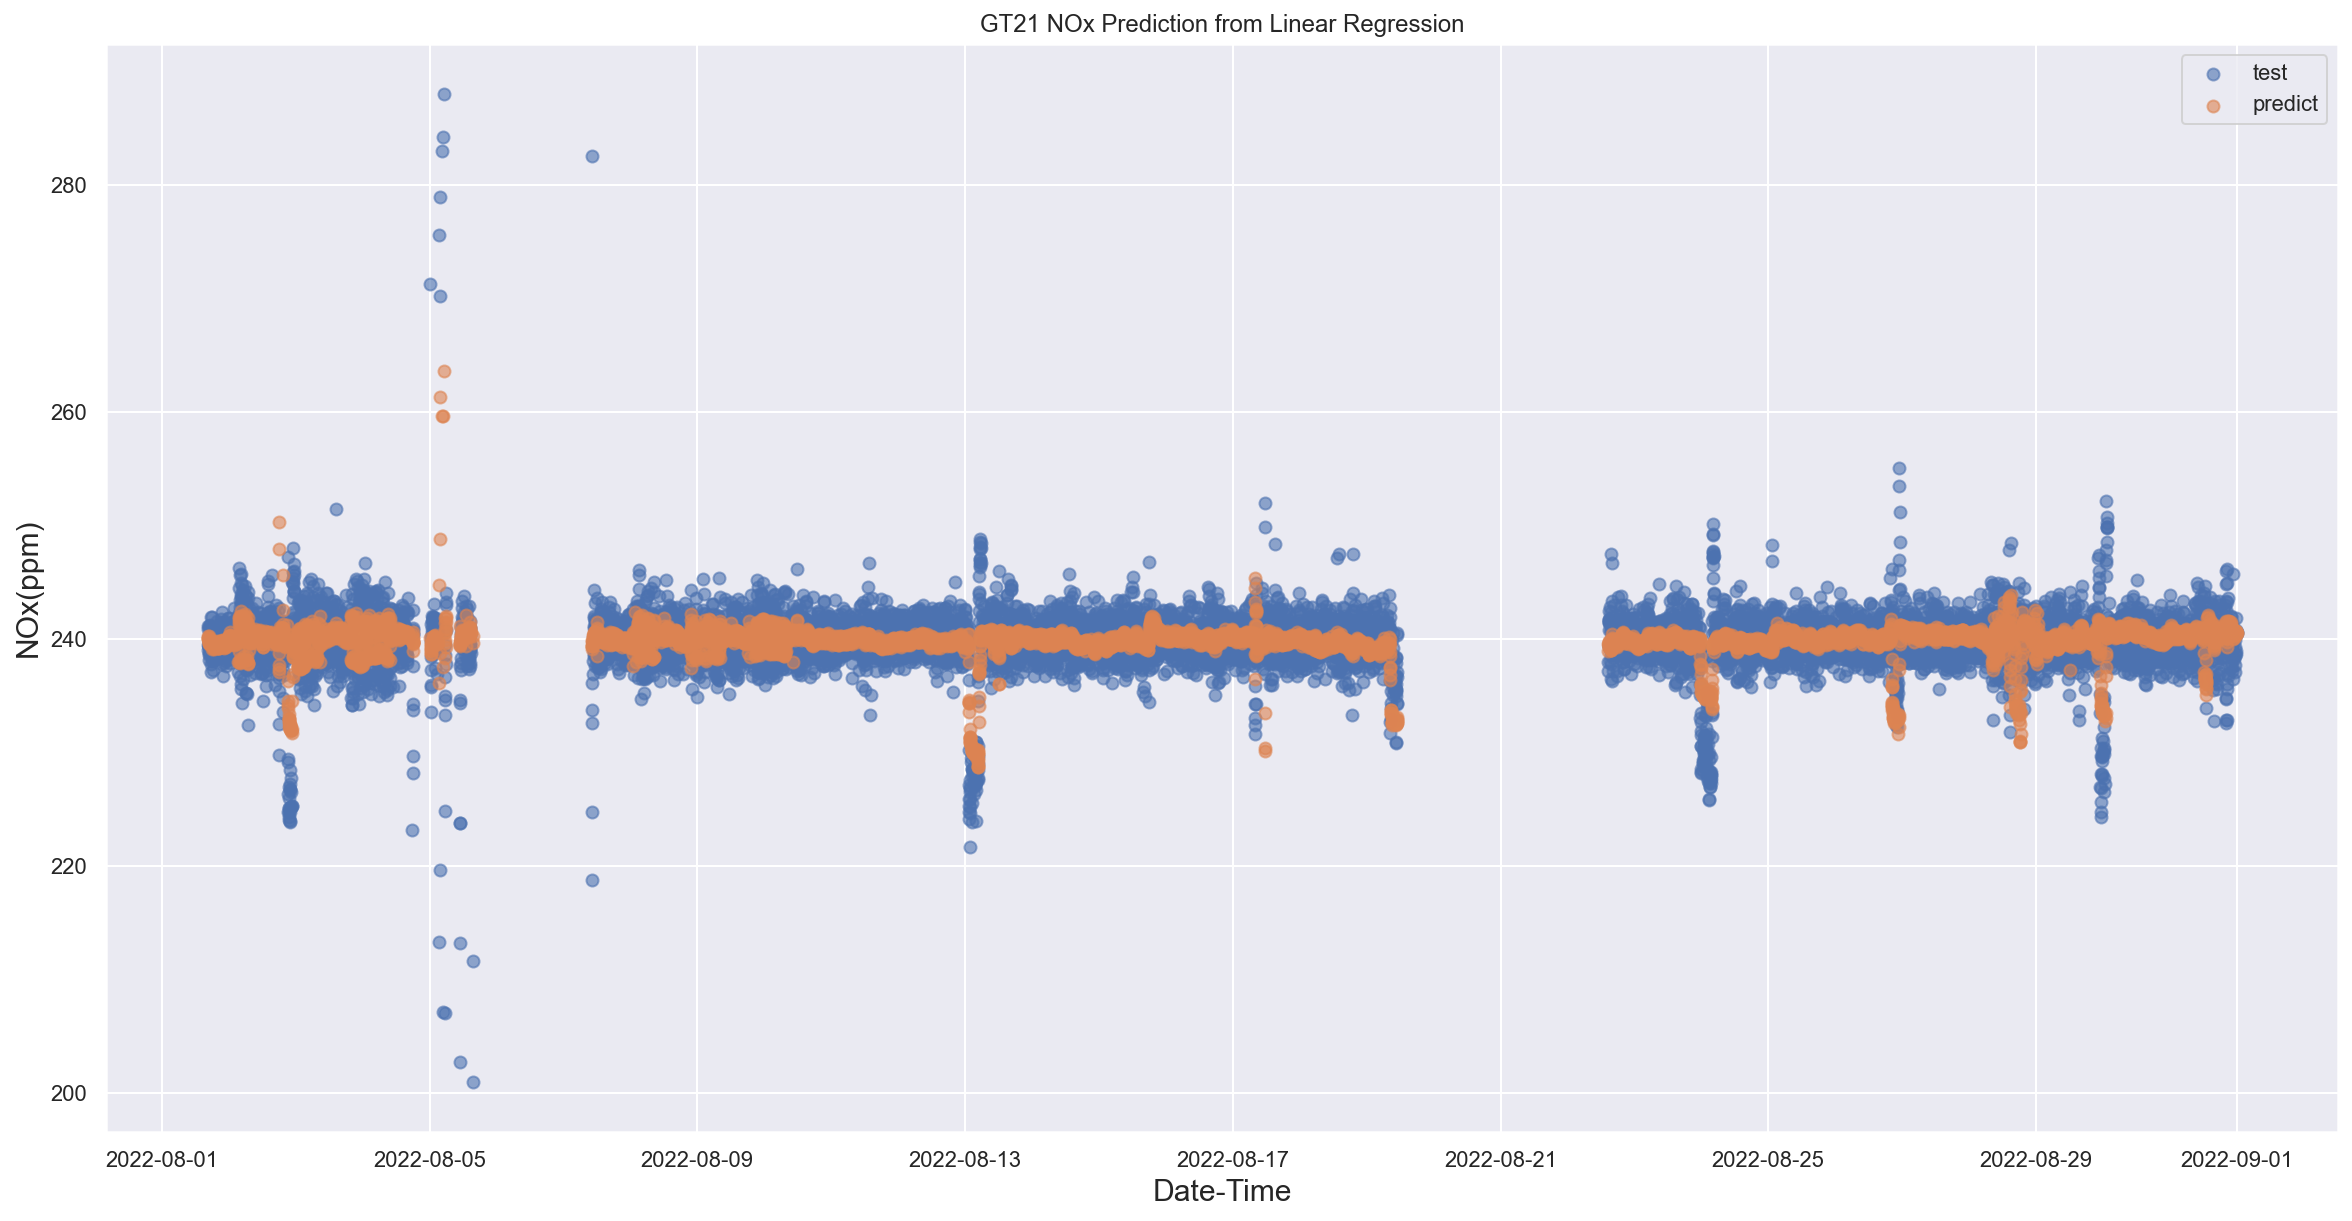

In [27]:
from sklearn.linear_model import LinearRegression

#Modeling
model = LinearRegression()
model.fit(train, y_train)

importance = model.coef_
importance

#Prediction
y_pred = model.predict(test)

#Prediction data become normalized (De-standardized)
y_pred = pd.Series(y_pred.reshape(-1,),index=y_test.index)
y_pred_org = y_pred*y_train_std+y_train_mean

#Export to Excel (------------DEBUG ONLY------------)
test_pred = pd.concat([y_test_org,y_pred_org],axis=1)
test_pred.to_excel('GT21compare_LinearReg.xlsx')

#Show and Concat Error Metric
mae = mean_absolute_error(y_test_org,y_pred_org)
accuracy_mae = concatacc('Linear Regression','MAE(ppm)',accuracy_mae,mae)
    
mape = mean_absolute_percentage_error(y_test_org,y_pred_org)*100
accuracy_mape = concatacc('Linear Regression','MAPE(%)',accuracy_mape,mape)

mse = mean_squared_error(y_test_org,y_pred_org)
accuracy_mse = concatacc('Linear Regression','MSE',accuracy_mse,mse)

#Show Prediction Graph
showtestpredict('Linear Regression',y_test_org,y_pred_org)

### Feature Importance

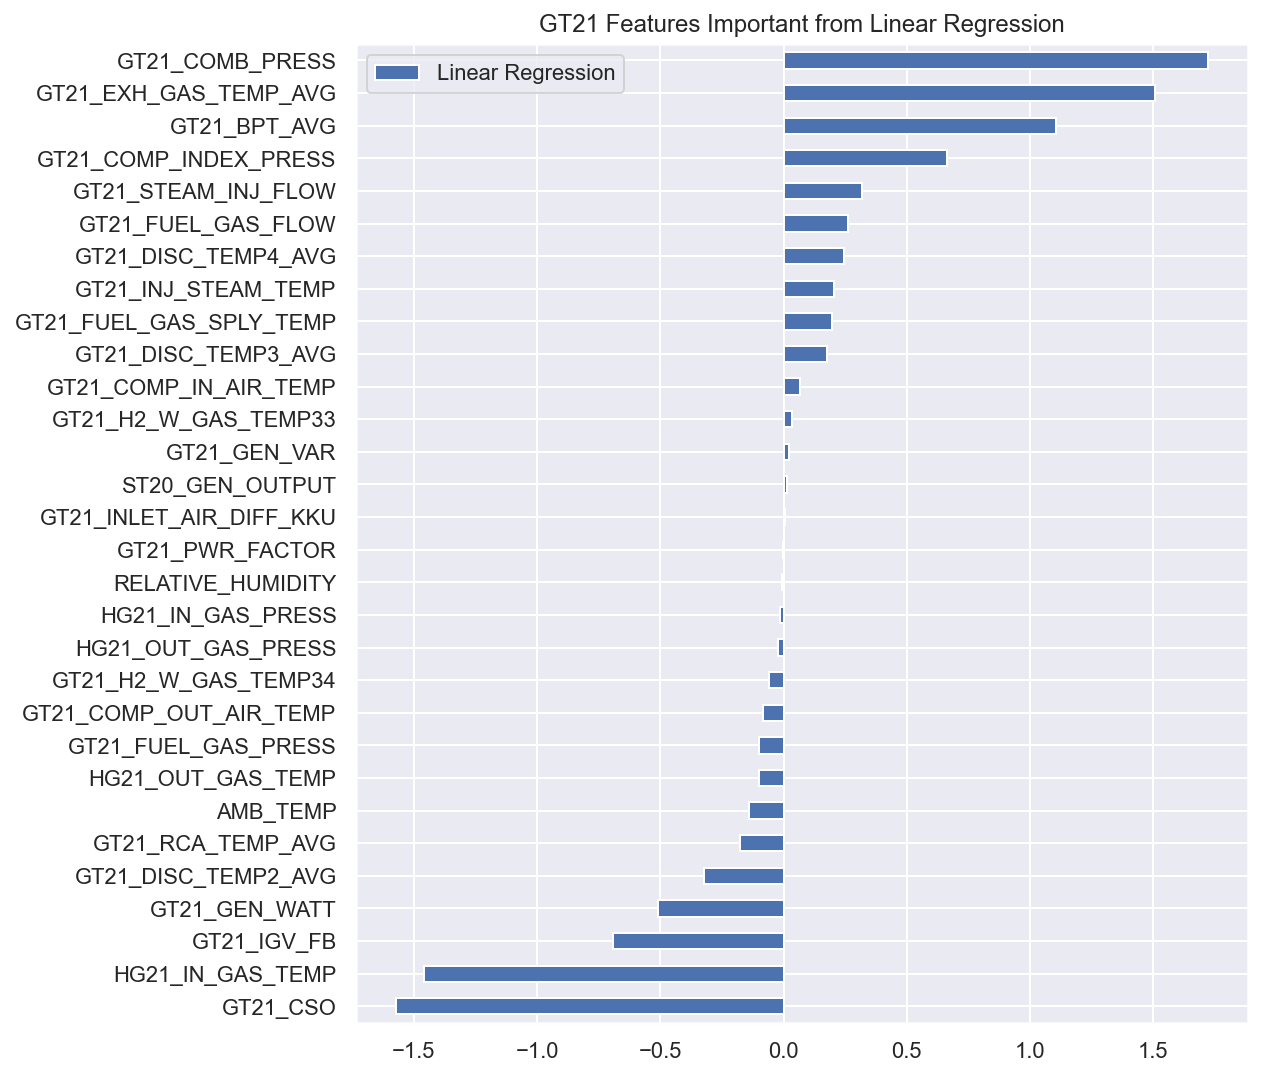

In [28]:
#Feature Importance
Result = showandconcat('Linear Regression',importance,Result)


## Decision Tree

### Prediction and Error Metric

Testing MAE(ppm) = 1.3336
Testing MAPE(%) = 0.5561
Testing MSE = 4.7676


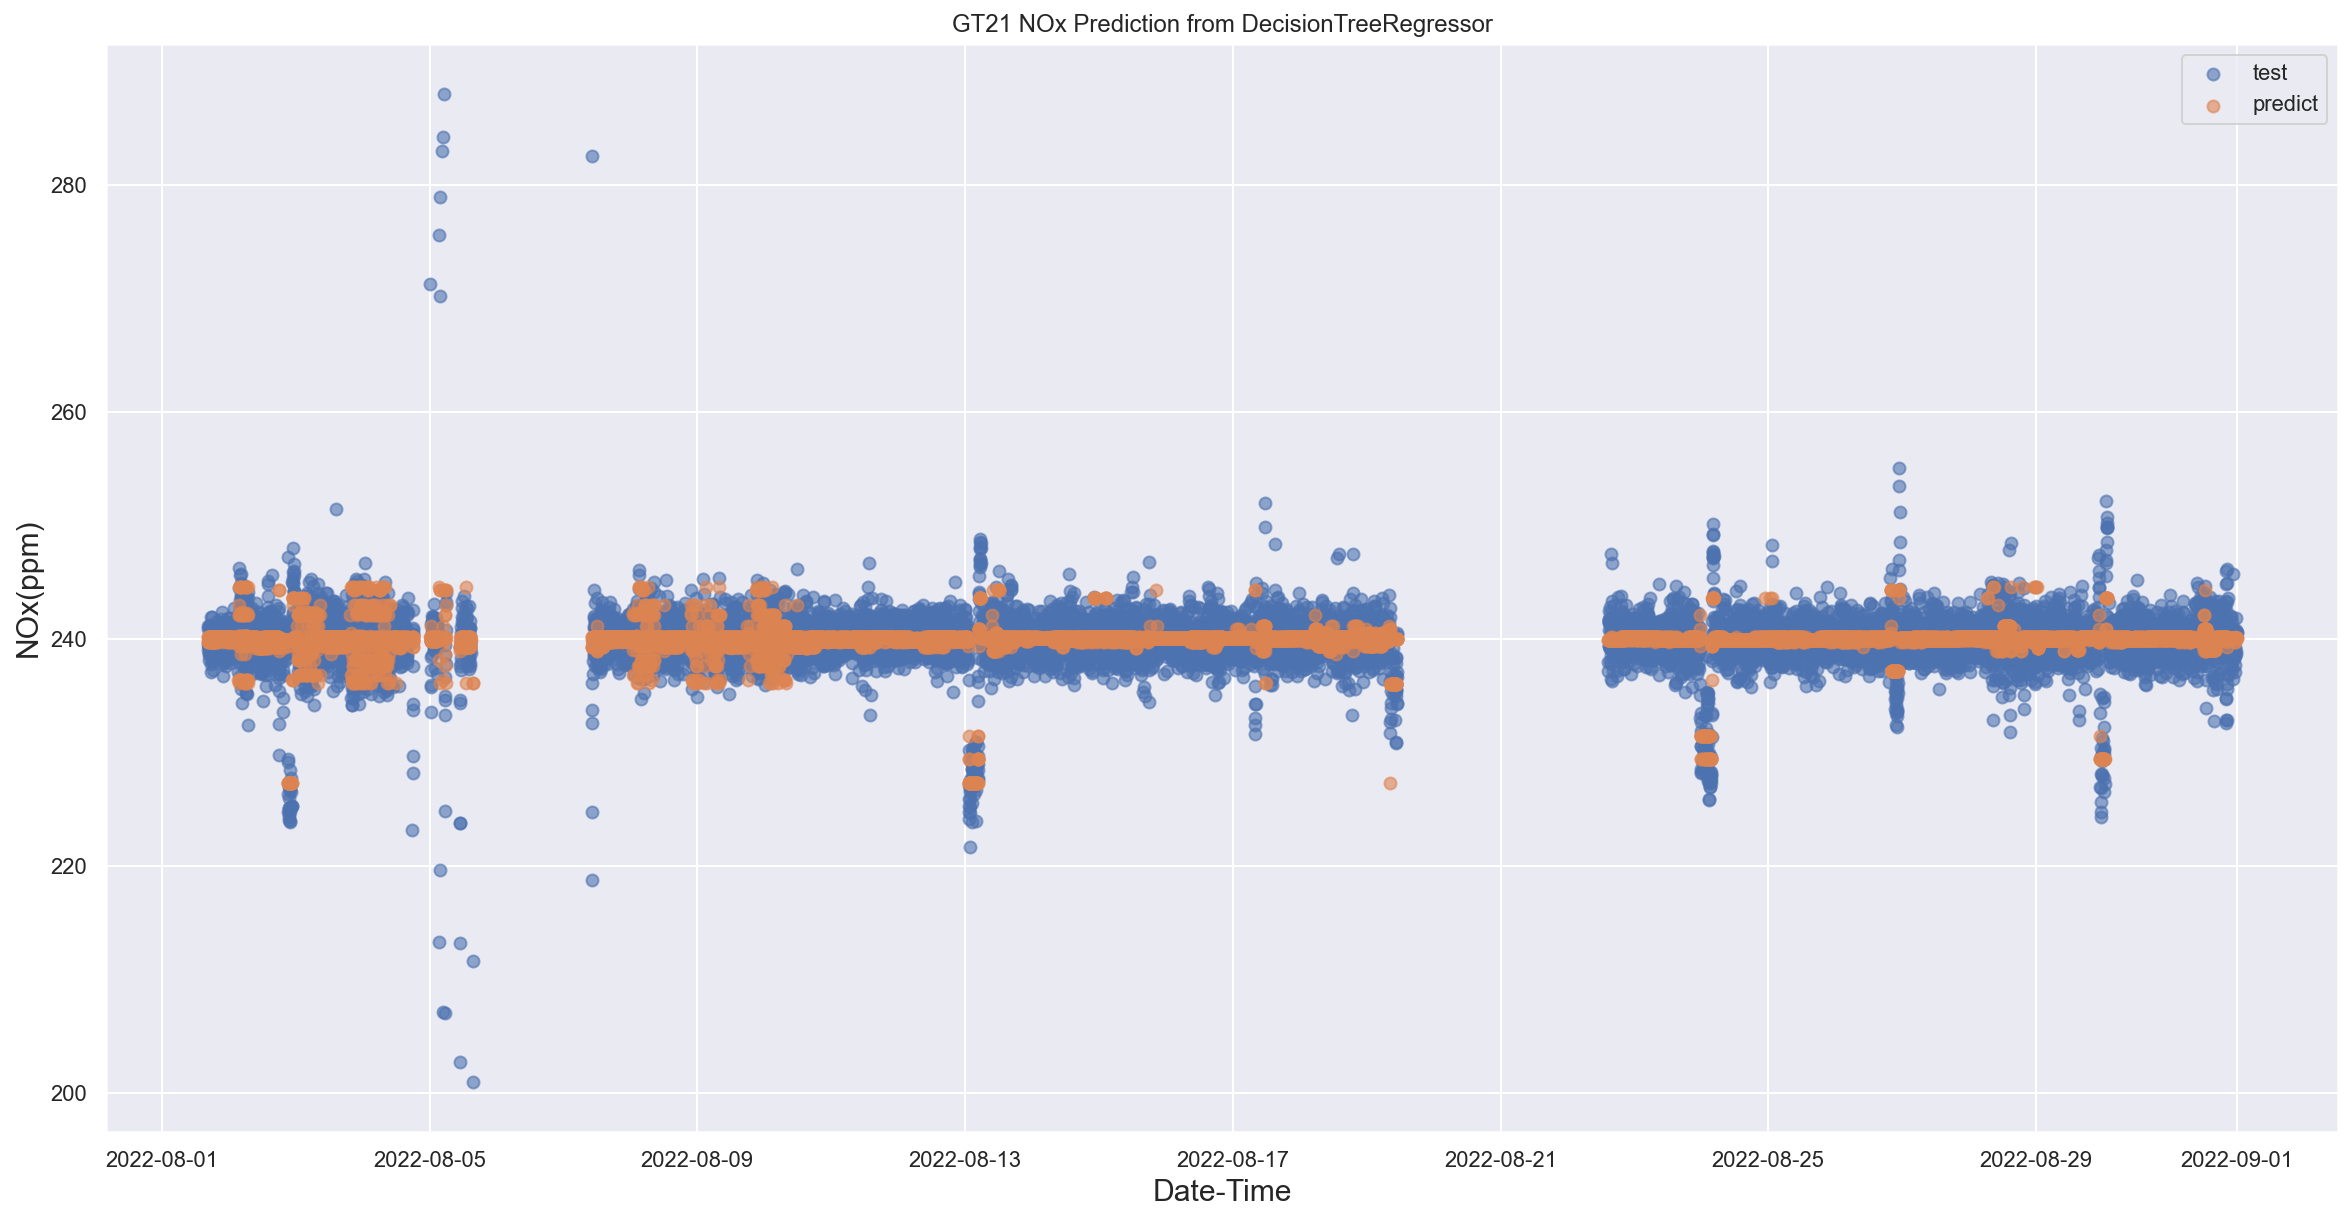

In [29]:
from sklearn.tree import DecisionTreeRegressor

#Modeling
model = DecisionTreeRegressor(criterion='mse',max_depth=8,max_leaf_nodes=100,min_samples_leaf=100,min_samples_split=10)
model.fit(train, y_train)
importance = model.feature_importances_

#Prediction
y_pred = model.predict(test)

#Prediction data become normalized (De-standardized)
y_pred = pd.Series(y_pred.reshape(-1,),index=y_test.index) 
y_pred_org = y_pred*y_train_std+y_train_mean

#Export to Excel (for DEBUG ONLY)
test_pred = pd.concat([y_test_org,y_pred_org],axis=1)
test_pred.to_excel('GT21compare_DecisionTree.xlsx')

#Show and Concat Error Metric
mae = mean_absolute_error(y_test_org,y_pred_org)
accuracy_mae = concatacc('DecisionTreeRegressor','MAE(ppm)',accuracy_mae,mae)
    
mape = mean_absolute_percentage_error(y_test_org,y_pred_org)*100
accuracy_mape = concatacc('DecisionTreeRegressor','MAPE(%)',accuracy_mape,mape)

mse = mean_squared_error(y_test_org,y_pred_org)
accuracy_mse = concatacc('DecisionTreeRegressor','MSE',accuracy_mse,mse)

#Show Prediction Graph
showtestpredict('DecisionTreeRegressor',y_test_org,y_pred_org)


### Feature Importance

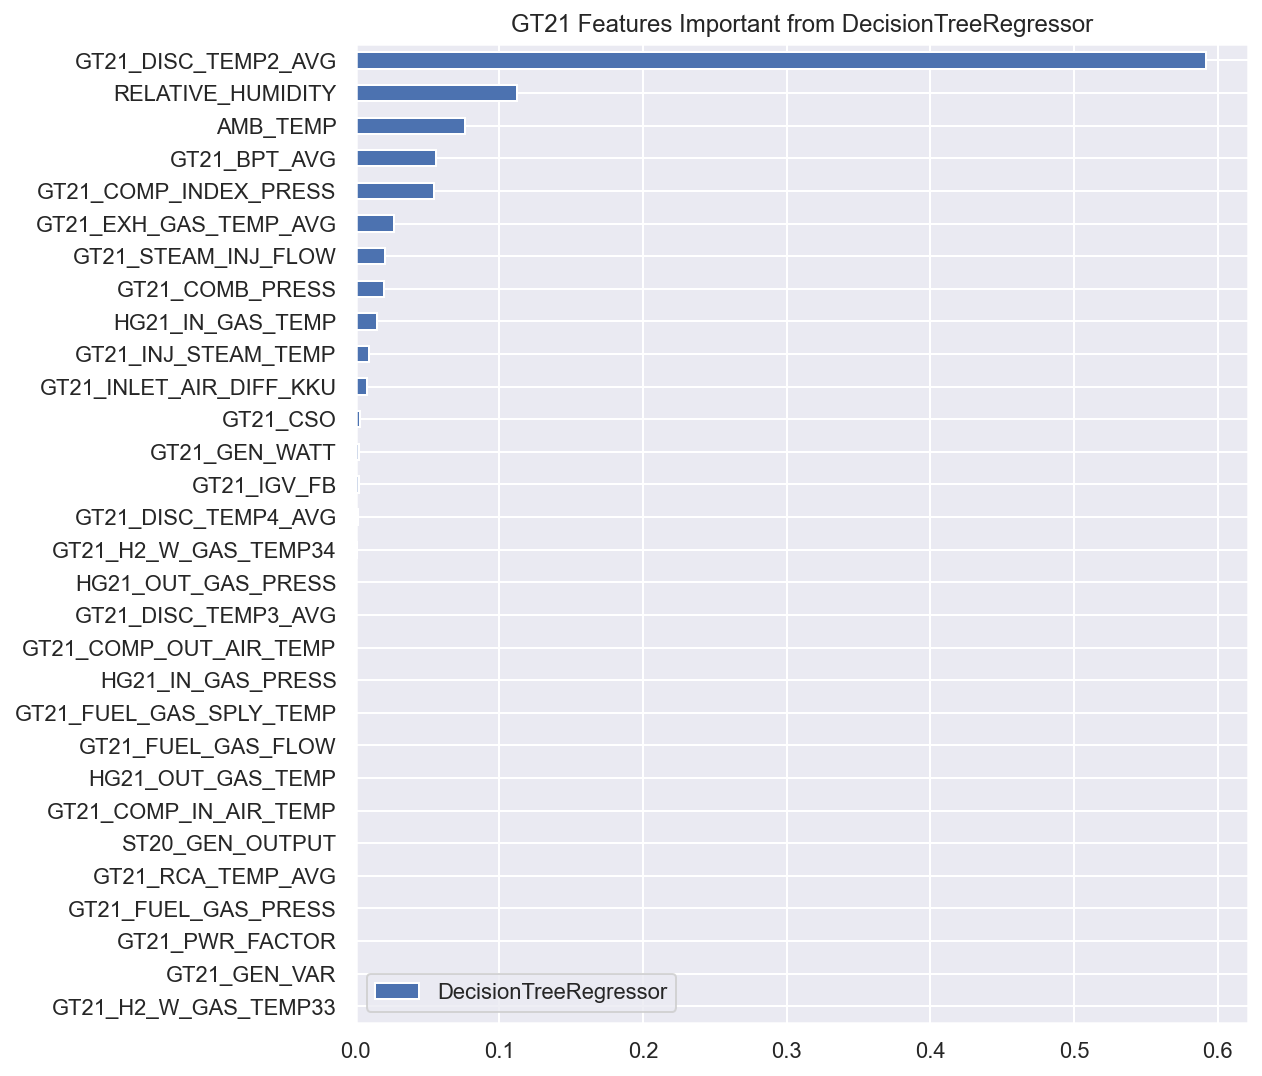

In [30]:
#Feature Importance
Result = showandconcat('DecisionTreeRegressor',importance,Result)


## Random Forest

### Prediction and Error Metric

Testing MAE(ppm) = 1.1934
Testing MAPE(%) = 0.4981
Testing MSE = 3.0480


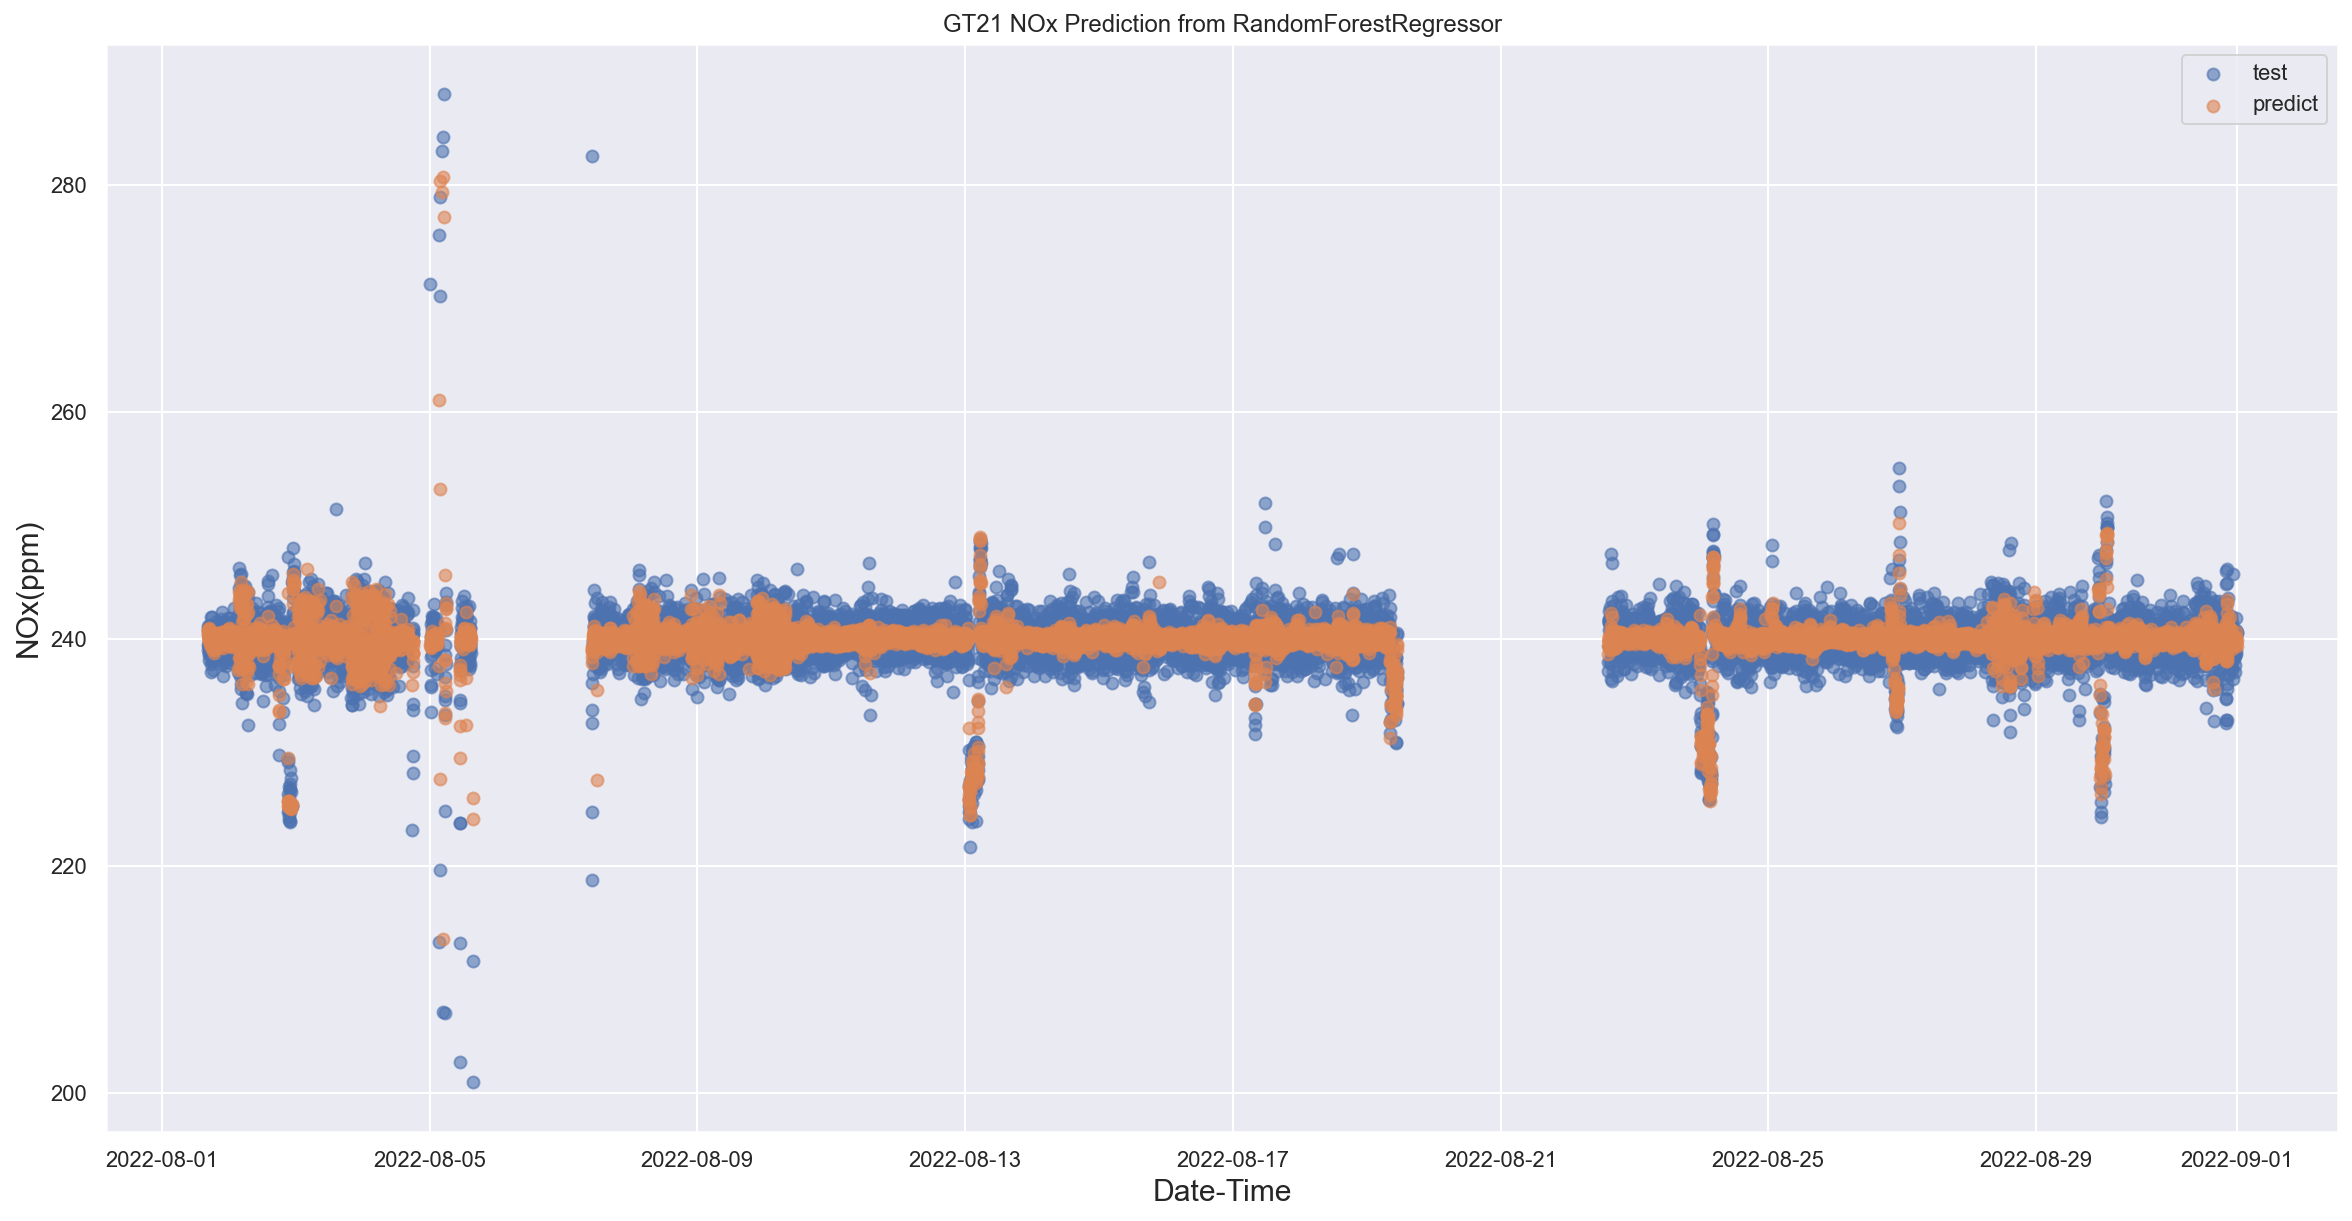

In [31]:
from sklearn.ensemble import RandomForestRegressor

#Modeling
model = RandomForestRegressor()
model.fit(train, y_train)
importance = model.feature_importances_

#Prediction
y_pred = model.predict(test)

#Prediction data become normalized (De-standardized)
y_pred = pd.Series(y_pred.reshape(-1,),index=y_test.index) 
y_pred_org = y_pred*y_train_std+y_train_mean

#Export to Excel (for DEBUG ONLY)
test_pred = pd.concat([y_test_org,y_pred_org],axis=1)
test_pred.to_excel('GT21compare_RandomForest.xlsx')


#Show and Concat Error Metric
mae = mean_absolute_error(y_test_org,y_pred_org)
accuracy_mae = concatacc('RandomForestRegressor','MAE(ppm)',accuracy_mae,mae)
    
mape = mean_absolute_percentage_error(y_test_org,y_pred_org)*100
accuracy_mape = concatacc('RandomForestRegressor','MAPE(%)',accuracy_mape,mape)

mse = mean_squared_error(y_test_org,y_pred_org)
accuracy_mse = concatacc('RandomForestRegressor','MSE',accuracy_mse,mse)

#Show Prediction Graph
showtestpredict('RandomForestRegressor',y_test_org,y_pred_org)


### Feature Importance

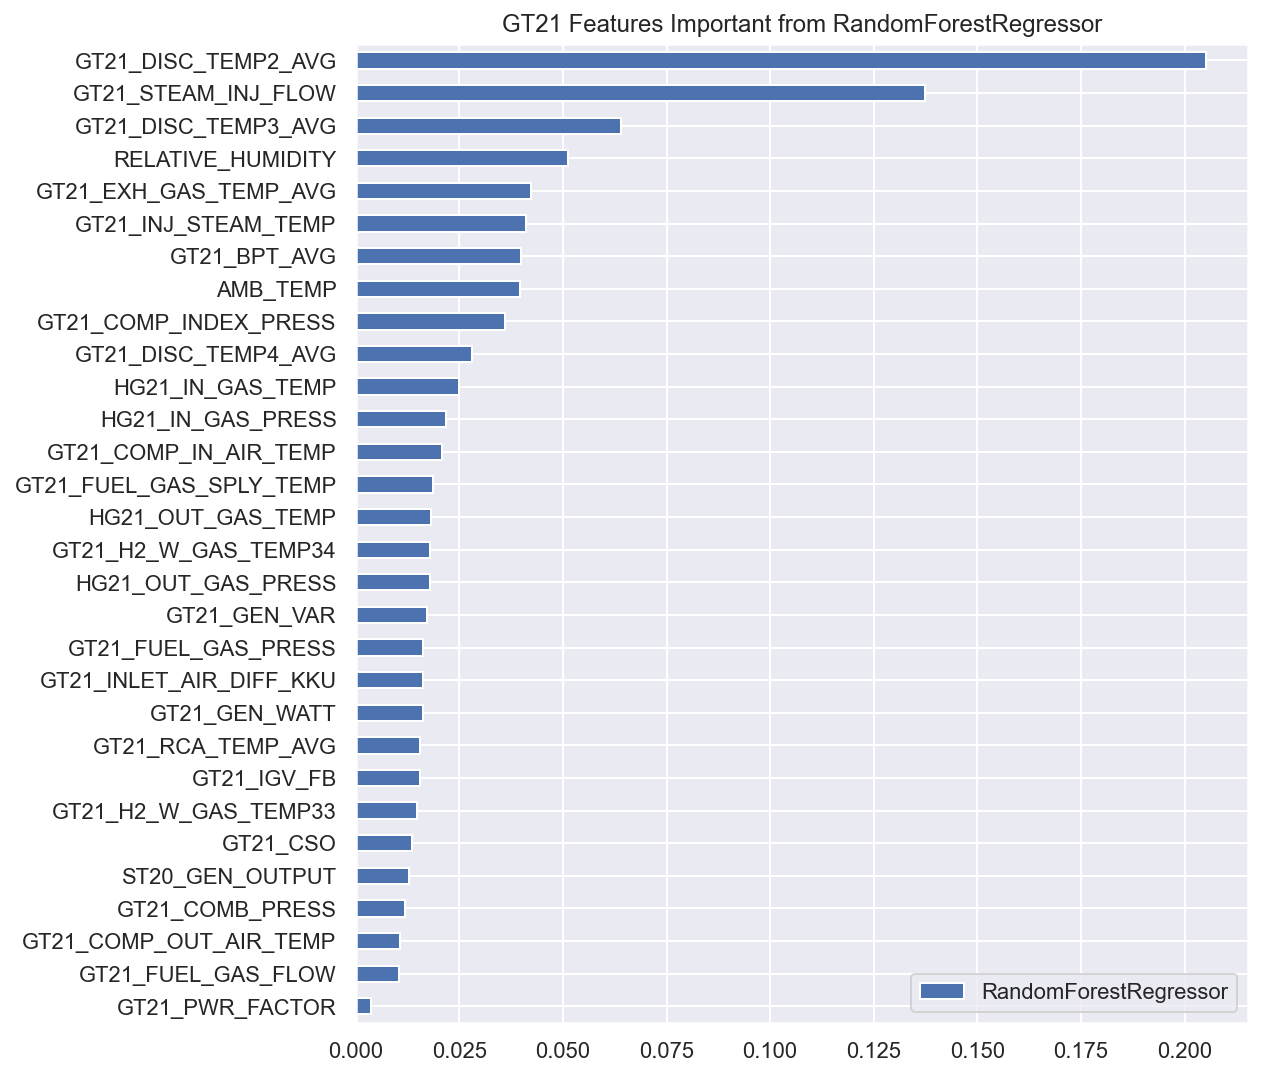

In [32]:
#Feature Importance
Result = showandconcat('RandomForestRegressor',importance,Result)


## XGBoost Regression

### Prediction and Error Metric

Testing MAE(ppm) = 1.1997
Testing MAPE(%) = 0.5006
Testing MSE = 3.2680


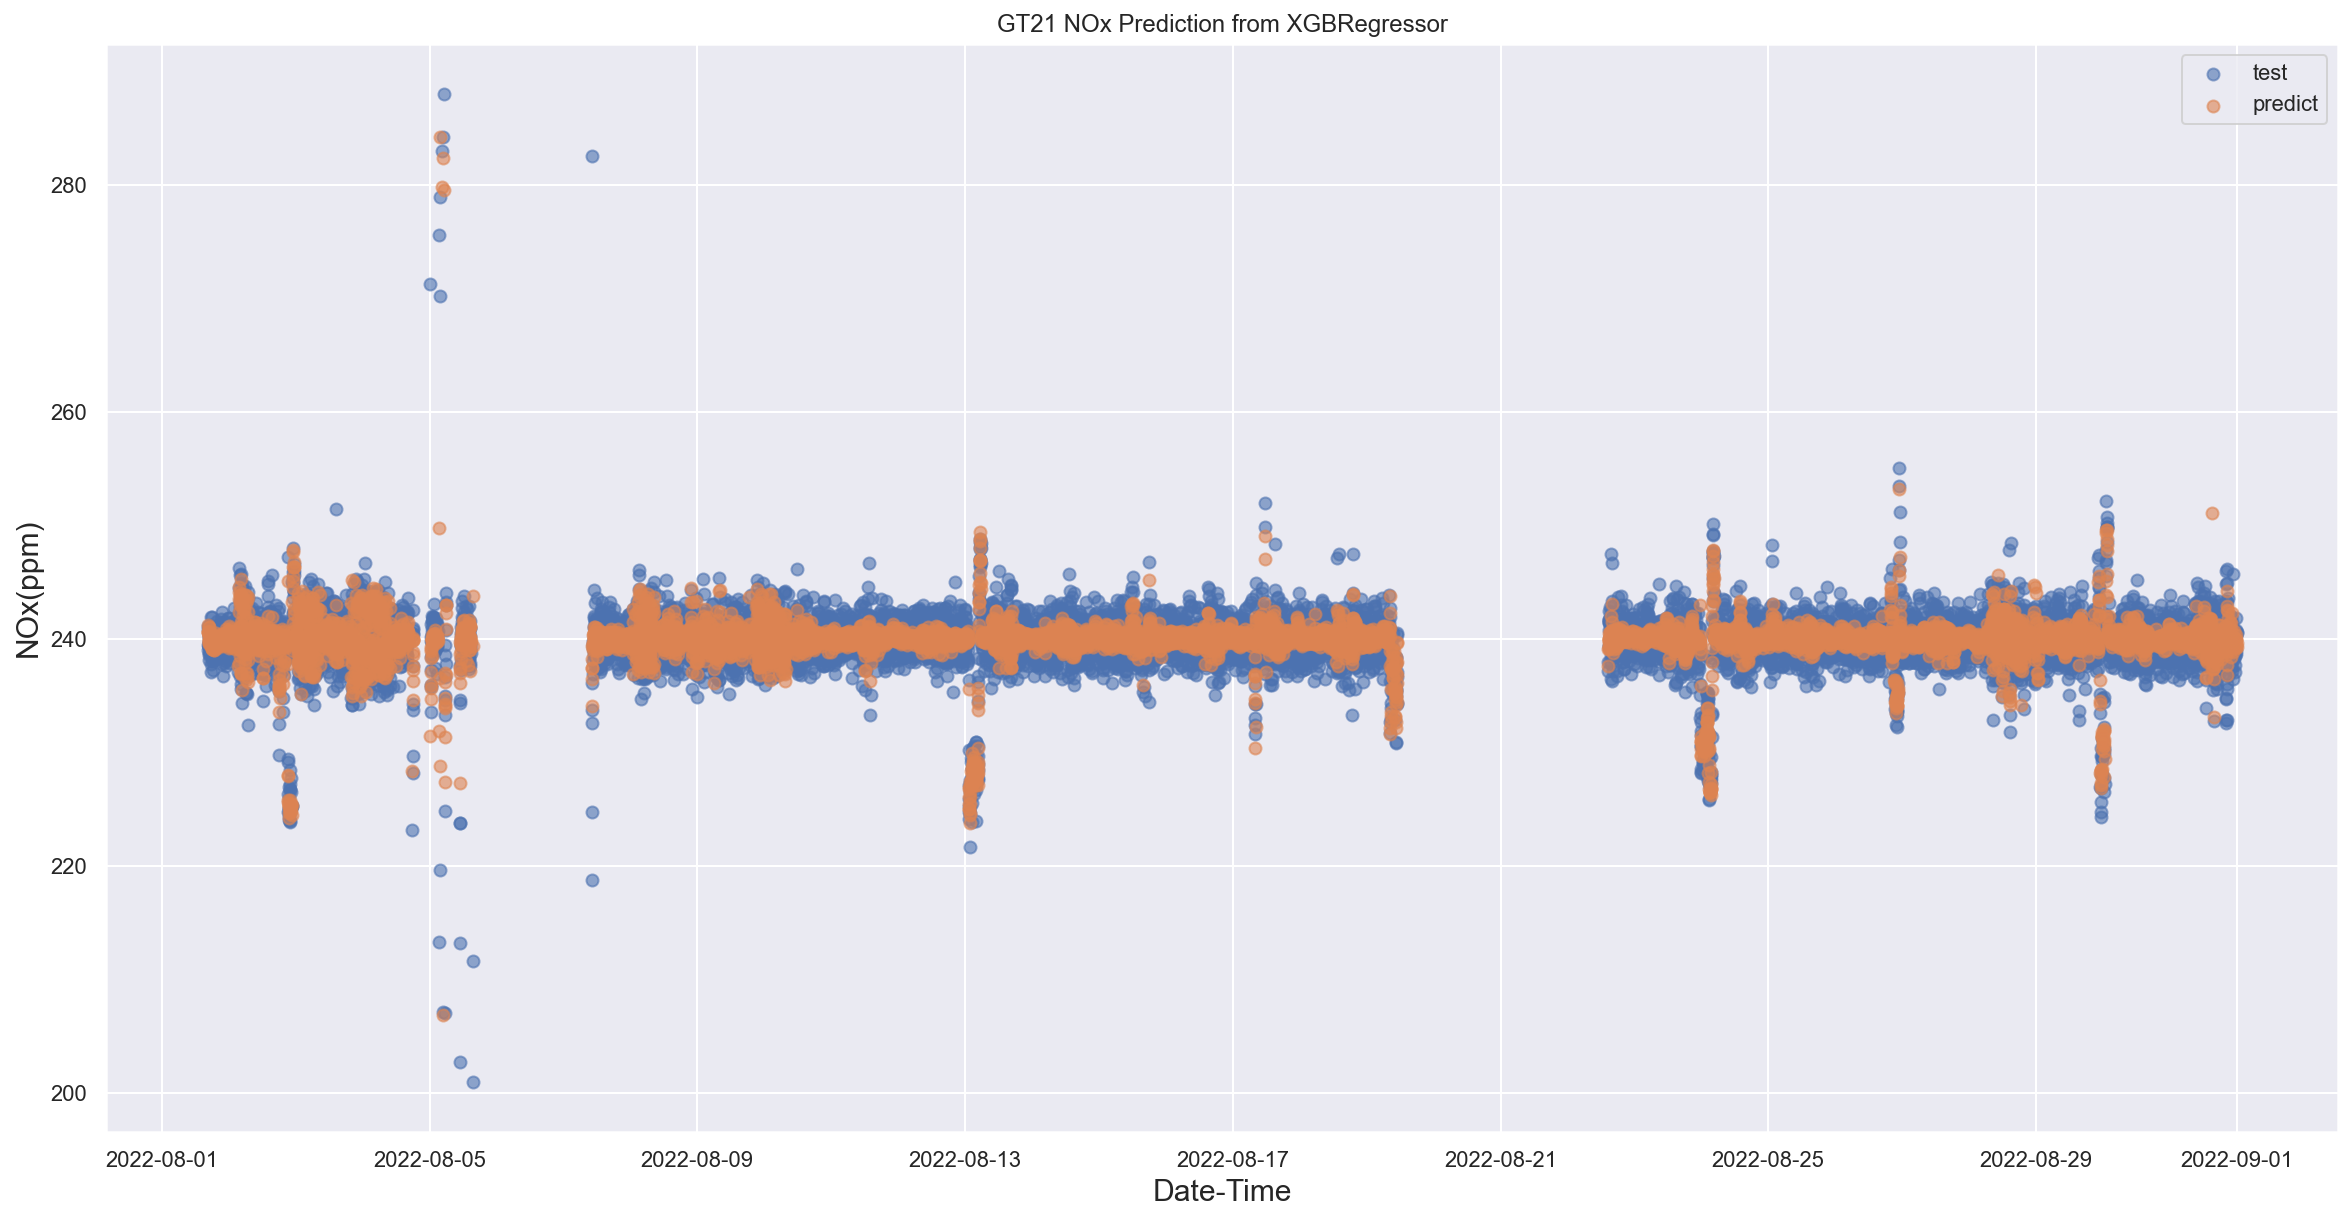

In [33]:
from xgboost import XGBRegressor

#Modeling
model = XGBRegressor()
model.fit(train, y_train)
importance = model.feature_importances_

#Prediction
y_pred = model.predict(test)

#Prediction data become normalized (De-standardized)
y_pred = pd.Series(y_pred.reshape(-1,),index=y_test.index)
y_pred_org = y_pred*y_train_std+y_train_mean

#Export to Excel (for DEBUG ONLY)
test_pred = pd.concat([y_test_org,y_pred_org],axis=1)
test_pred.to_excel('GT21compare_XGBRegress.xlsx')

#Show and Concat Error Metric
mae = mean_absolute_error(y_test_org,y_pred_org)
accuracy_mae = concatacc('XGBRegressor','MAE(ppm)',accuracy_mae,mae)
    
mape = mean_absolute_percentage_error(y_test_org,y_pred_org)*100
accuracy_mape = concatacc('XGBRegressor','MAPE(%)',accuracy_mape,mape)

mse = mean_squared_error(y_test_org,y_pred_org)
accuracy_mse = concatacc('XGBRegressor','MSE',accuracy_mse,mse)

#Show Prediction Graph
showtestpredict('XGBRegressor',y_test_org,y_pred_org)


###  Feature Importance

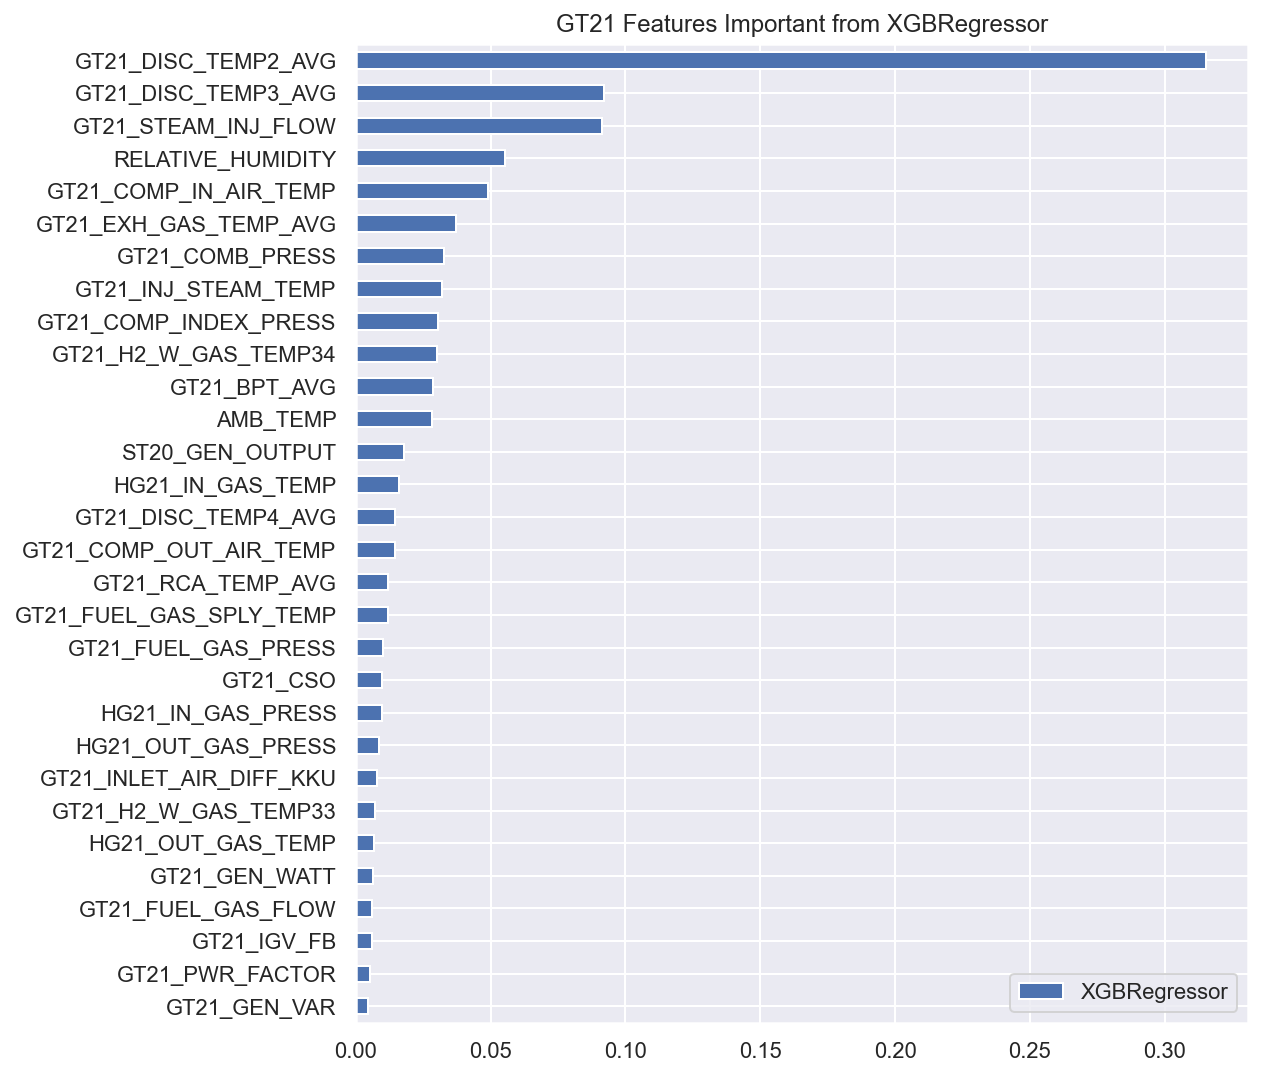

In [34]:
#Feature Importance
Result = showandconcat('XGBRegressor',importance,Result)


## K-NN Regression  (**Disabled : Too much time taking)

### Prediction and Error Metric

Testing MAE(ppm) = 1.2906
Testing MAPE(%) = 0.5379
Testing MSE = 3.9261


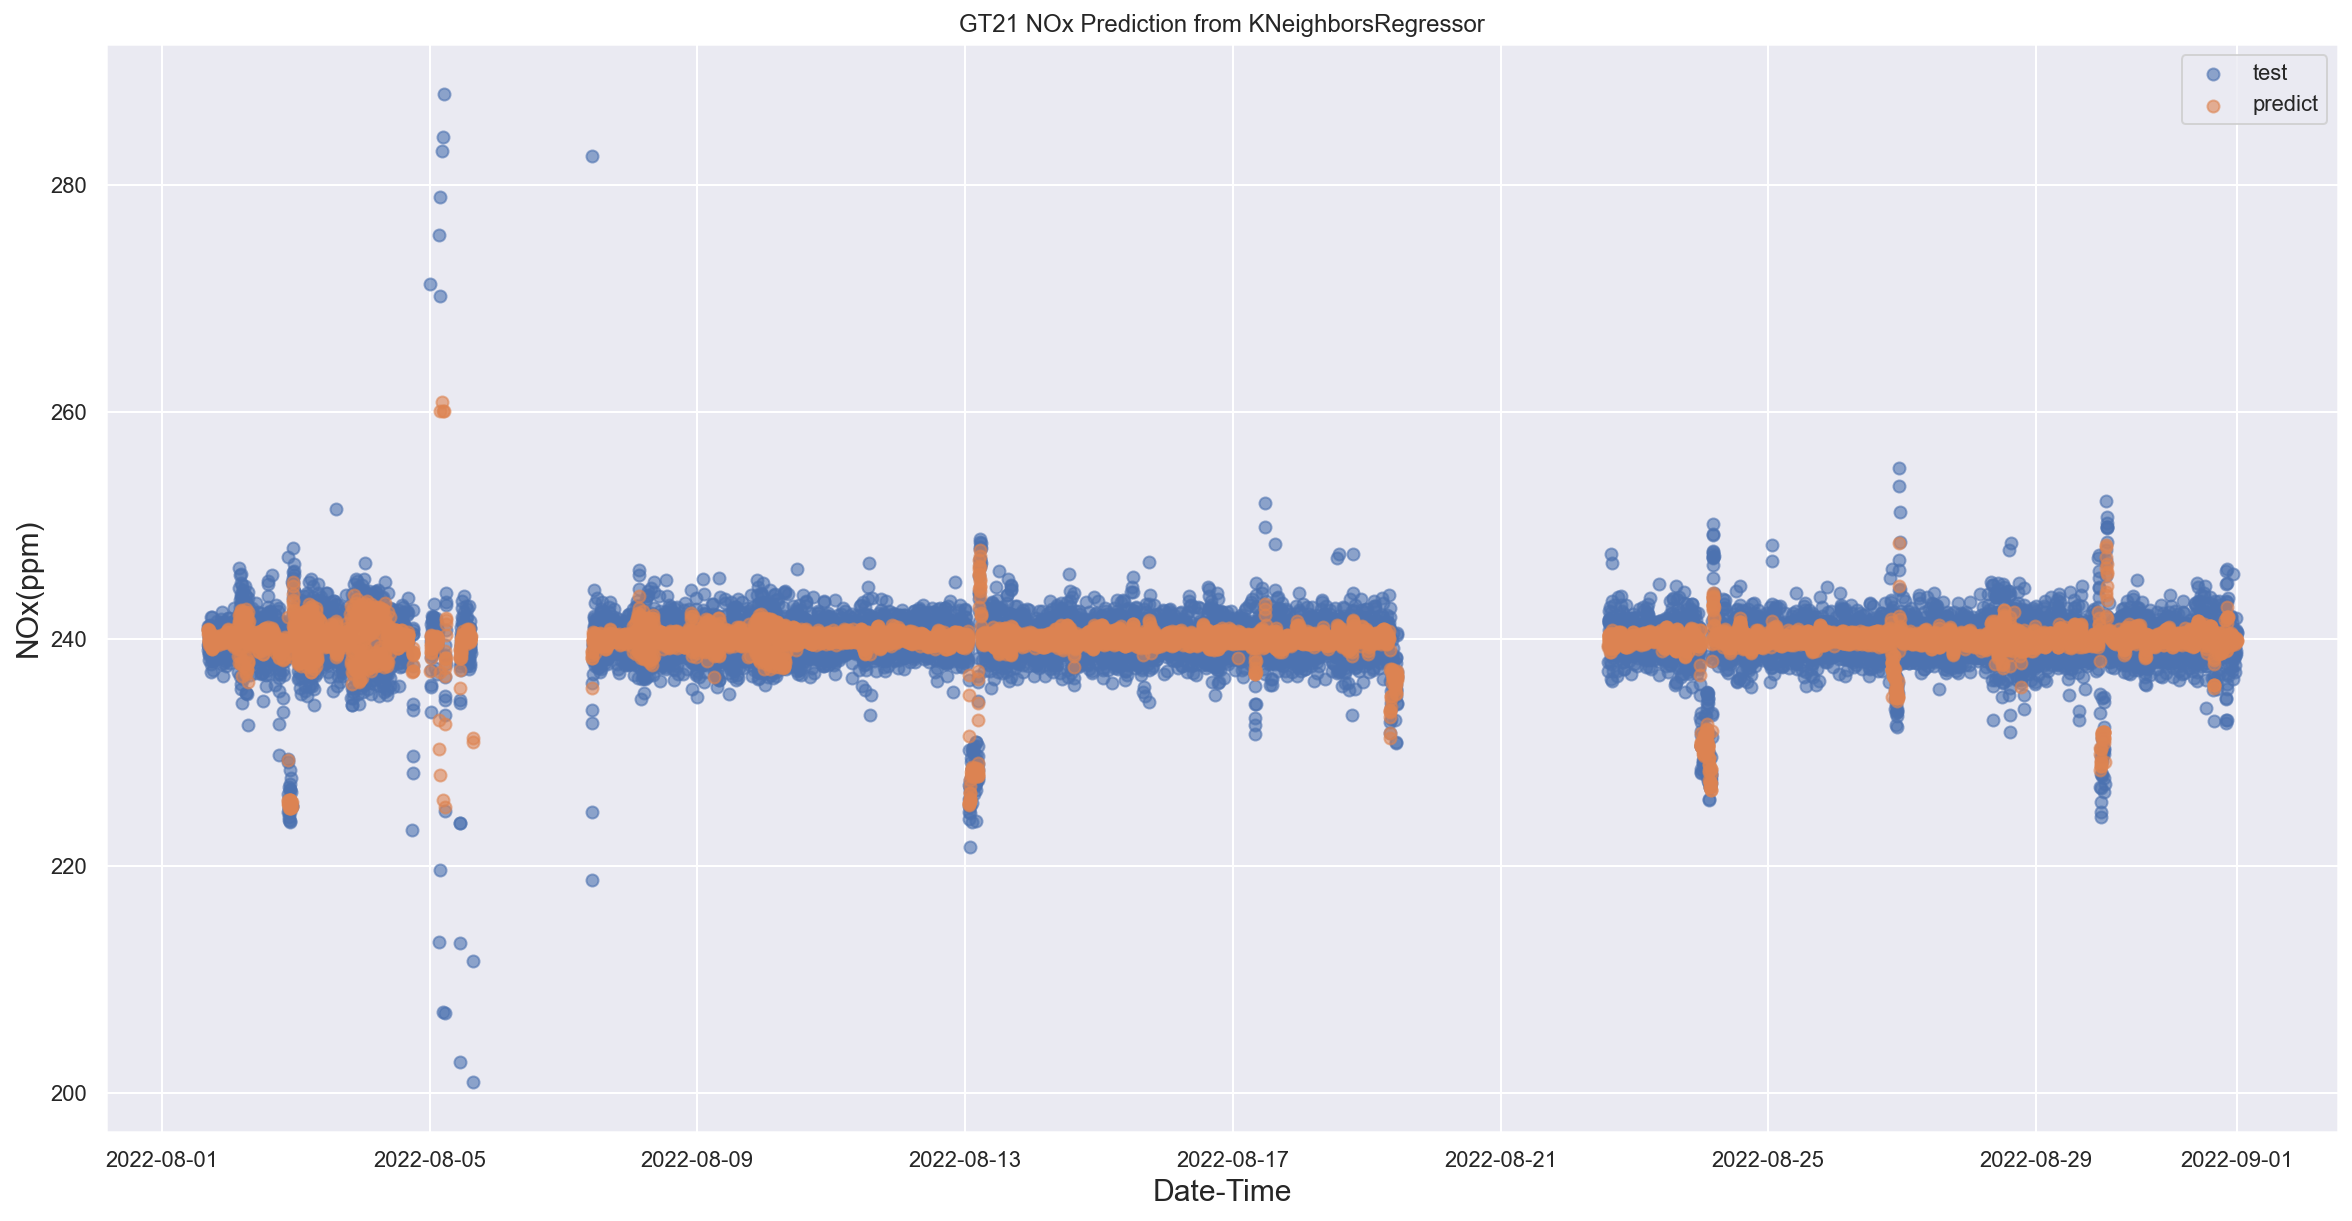

In [35]:
from sklearn.neighbors import KNeighborsRegressor

#Modeling
model = KNeighborsRegressor(n_neighbors= 19)
model.fit(train, y_train)

#Feature Importance Calculation
results = permutation_importance(model, train, y_train, scoring='neg_mean_squared_error')
importance = results.importances_mean

#Prediction
y_pred = model.predict(test)

#Prediction data become normalized (De-standardized)
y_pred = pd.Series(y_pred.reshape(-1,),index=y_test.index) 
y_pred_org = y_pred*y_train_std+y_train_mean

#Export to Excel (for DEBUG ONLY)
test_pred = pd.concat([y_test_org,y_pred_org],axis=1)
test_pred.to_excel('GT21compare_KNN.xlsx')

#Show and Concat Error Metric
mae = mean_absolute_error(y_test_org,y_pred_org)
accuracy_mae = concatacc('KNeighborsRegressor','MAE(ppm)',accuracy_mae,mae)
    
mape = mean_absolute_percentage_error(y_test_org,y_pred_org)*100
accuracy_mape = concatacc('KNeighborsRegressor','MAPE(%)',accuracy_mape,mape)

mse = mean_squared_error(y_test_org,y_pred_org)
accuracy_mse = concatacc('KNeighborsRegressor','MSE',accuracy_mse,mse)

#Show Prediction Graph
showtestpredict('KNeighborsRegressor',y_test_org,y_pred_org)


### Feature Importance

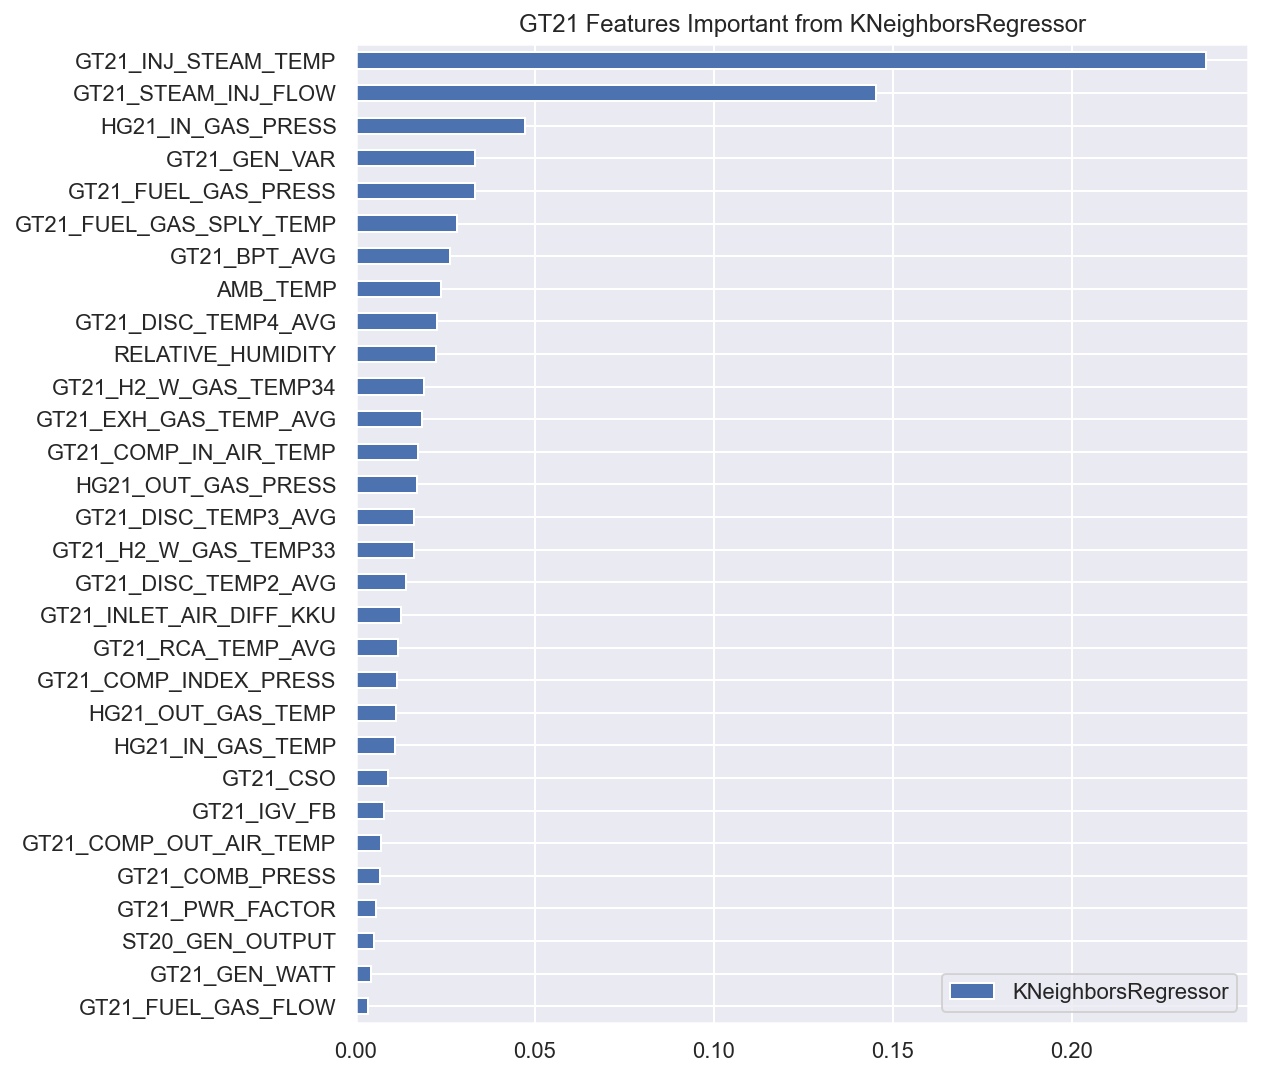

In [36]:
#Feature Importance
Result = showandconcat('KNeighborsRegressor',importance,Result)


## Neural Network (Regression)

### Modeling

In [37]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=128, activation='relu', input_shape=(len(Selected_Features)-1,)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
#     tf.keras.layers.Dense(units=512, activation='relu'),
#     tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(units=1)
#     tf.keras.layers.Dense(units=len(outputs), activation='softmax'),
])

# For Regression
model.compile(loss='mean_absolute_error', optimizer=tf.optimizers.Adam(), metrics=['mean_absolute_error'])

train_np = np.array(train).reshape(-1,len(Selected_Features)-1)
y_train_np = np.array(y_train)

#Modeling
model.fit(train_np,y_train_np,epochs=100,verbose=2)


Epoch 1/100
778/778 - 2s - loss: 0.5228 - mean_absolute_error: 0.5228 - 2s/epoch - 3ms/step
Epoch 2/100
778/778 - 1s - loss: 0.4927 - mean_absolute_error: 0.4927 - 1s/epoch - 2ms/step
Epoch 3/100
778/778 - 1s - loss: 0.4819 - mean_absolute_error: 0.4819 - 1s/epoch - 2ms/step
Epoch 4/100
778/778 - 1s - loss: 0.4738 - mean_absolute_error: 0.4738 - 1s/epoch - 2ms/step
Epoch 5/100
778/778 - 2s - loss: 0.4690 - mean_absolute_error: 0.4690 - 2s/epoch - 2ms/step
Epoch 6/100
778/778 - 2s - loss: 0.4638 - mean_absolute_error: 0.4638 - 2s/epoch - 2ms/step
Epoch 7/100
778/778 - 1s - loss: 0.4612 - mean_absolute_error: 0.4612 - 1s/epoch - 2ms/step
Epoch 8/100
778/778 - 1s - loss: 0.4566 - mean_absolute_error: 0.4566 - 1s/epoch - 2ms/step
Epoch 9/100
778/778 - 2s - loss: 0.4549 - mean_absolute_error: 0.4549 - 2s/epoch - 2ms/step
Epoch 10/100
778/778 - 1s - loss: 0.4505 - mean_absolute_error: 0.4505 - 1s/epoch - 2ms/step
Epoch 11/100
778/778 - 1s - loss: 0.4474 - mean_absolute_error: 0.4474 - 1s/epo

Epoch 90/100
778/778 - 1s - loss: 0.3514 - mean_absolute_error: 0.3514 - 1s/epoch - 2ms/step
Epoch 91/100
778/778 - 2s - loss: 0.3505 - mean_absolute_error: 0.3505 - 2s/epoch - 2ms/step
Epoch 92/100
778/778 - 2s - loss: 0.3503 - mean_absolute_error: 0.3503 - 2s/epoch - 2ms/step
Epoch 93/100
778/778 - 1s - loss: 0.3496 - mean_absolute_error: 0.3496 - 1s/epoch - 2ms/step
Epoch 94/100
778/778 - 2s - loss: 0.3484 - mean_absolute_error: 0.3484 - 2s/epoch - 2ms/step
Epoch 95/100
778/778 - 2s - loss: 0.3472 - mean_absolute_error: 0.3472 - 2s/epoch - 2ms/step
Epoch 96/100
778/778 - 1s - loss: 0.3463 - mean_absolute_error: 0.3463 - 1s/epoch - 2ms/step
Epoch 97/100
778/778 - 1s - loss: 0.3465 - mean_absolute_error: 0.3465 - 1s/epoch - 2ms/step
Epoch 98/100
778/778 - 1s - loss: 0.3431 - mean_absolute_error: 0.3431 - 1s/epoch - 2ms/step
Epoch 99/100
778/778 - 2s - loss: 0.3437 - mean_absolute_error: 0.3437 - 2s/epoch - 2ms/step
Epoch 100/100
778/778 - 2s - loss: 0.3426 - mean_absolute_error: 0.342

### Prediction

334/334 [==============================] - 1s 2ms/step
Testing MAE(ppm) = 1.2613
Testing MAPE(%) = 0.5259
Testing MSE = 3.5010


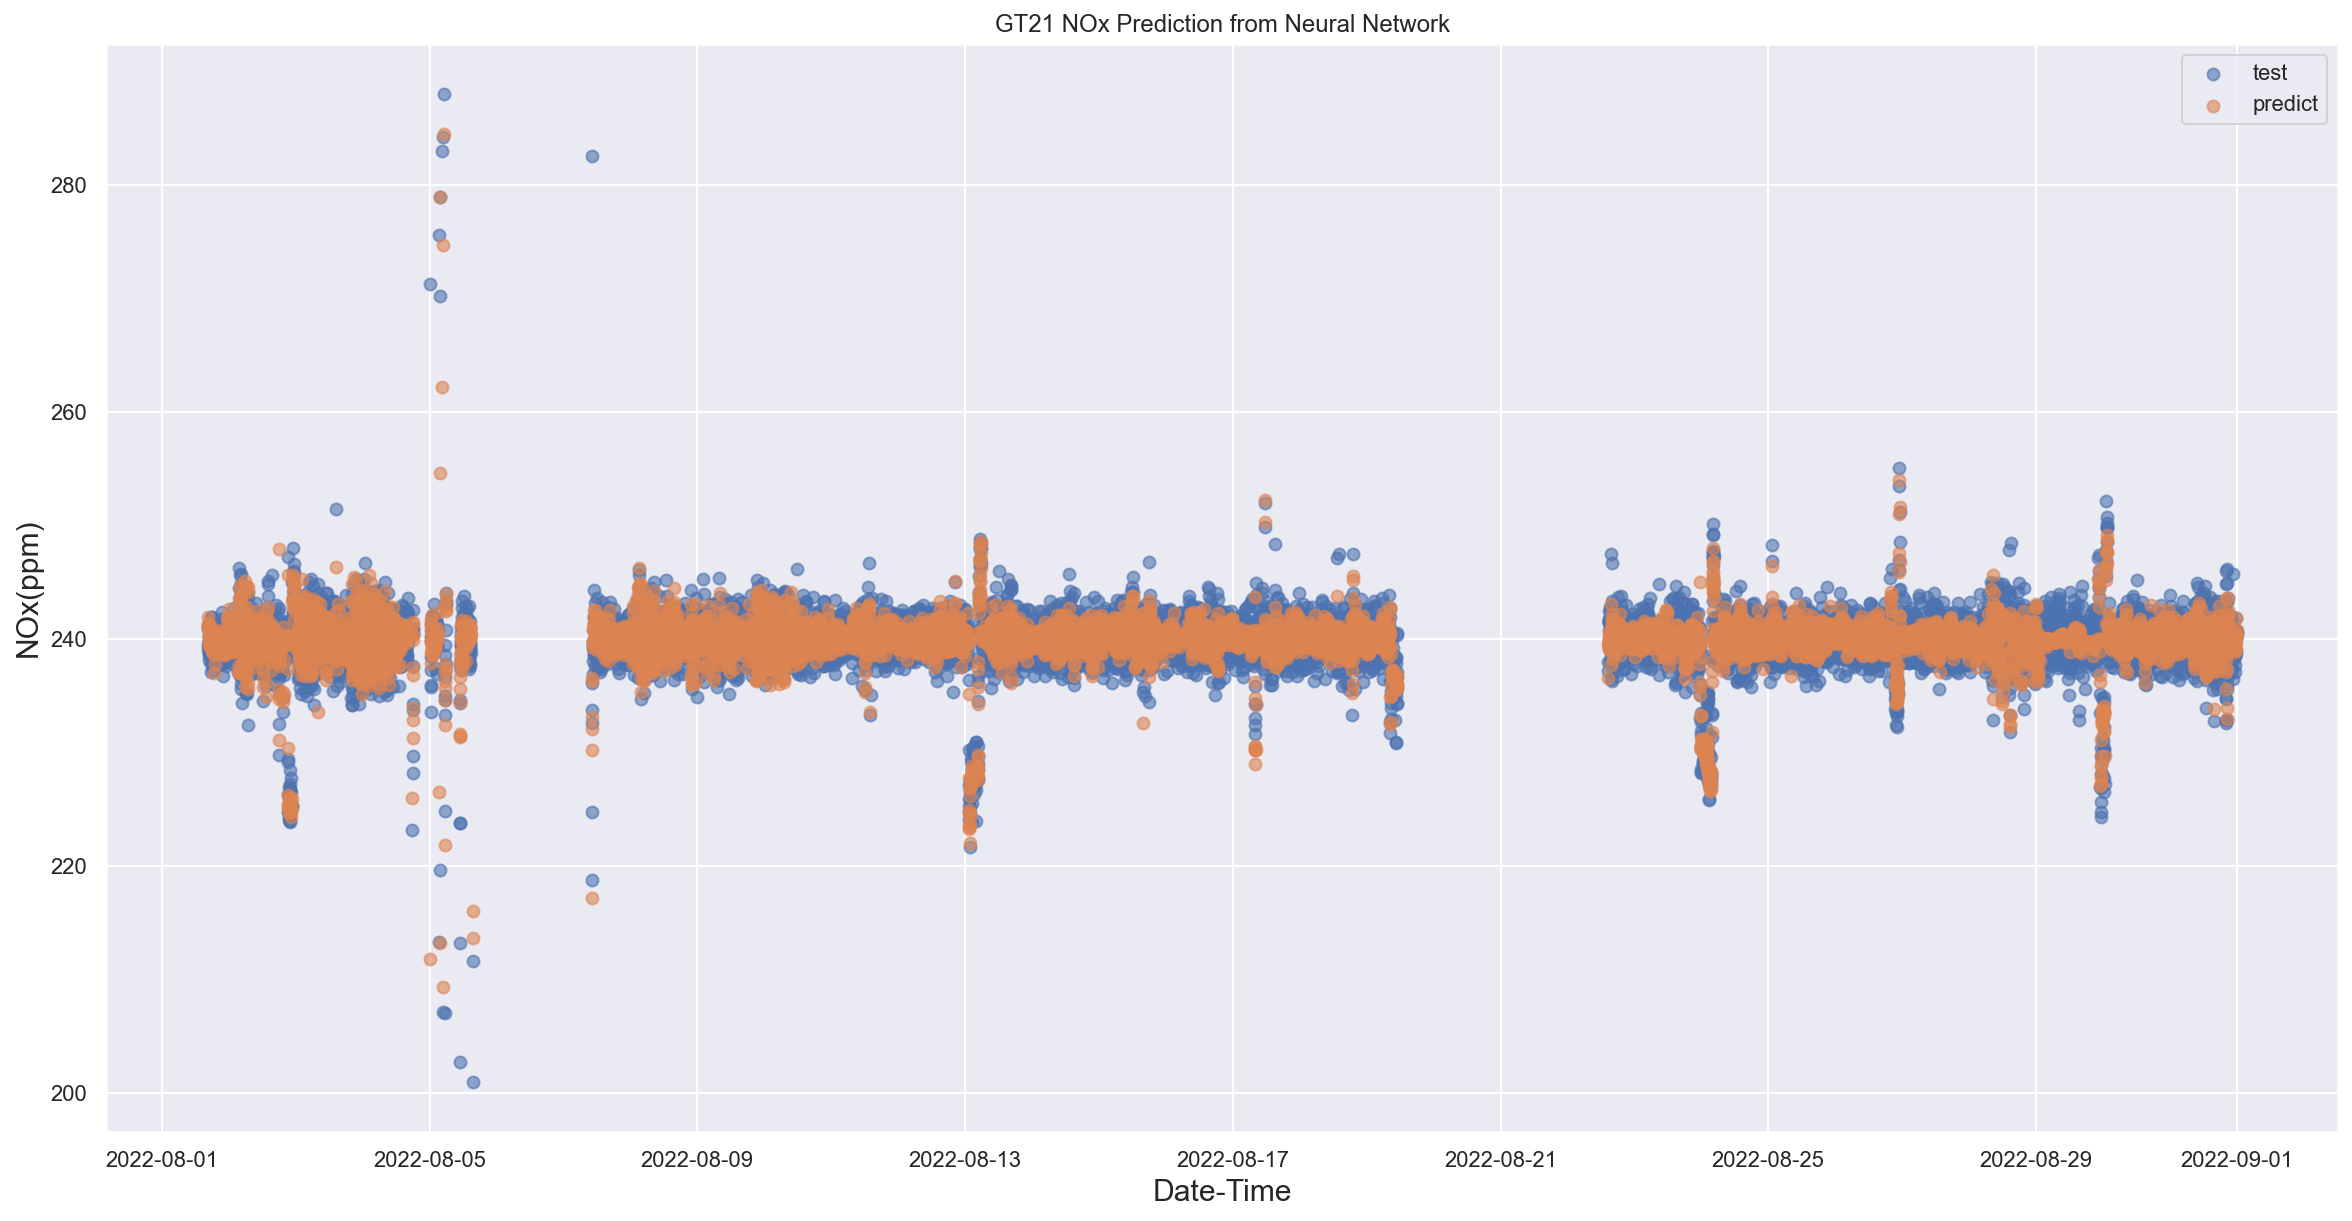

In [38]:
#Prediction
y_pred = model.predict(test)

#Prediction data become normalized (De-standardized)
y_pred = pd.Series(y_pred.reshape(-1,),index=y_test.index)
y_pred_org = y_pred*y_train_std+y_train_mean

#Export to Excel (for DEBUG ONLY)
test_pred = pd.concat([y_test_org,y_pred_org],axis=1)
test_pred.to_excel('GT21compare_NN.xlsx')

#Show and Concat Error Metric
mae = mean_absolute_error(y_test_org,y_pred_org)
accuracy_mae = concatacc('Neural Network','MAE(ppm)',accuracy_mae,mae)
    
mape = mean_absolute_percentage_error(y_test_org,y_pred_org)*100
accuracy_mape = concatacc('Neural Network','MAPE(%)',accuracy_mape,mape)

mse = mean_squared_error(y_test_org,y_pred_org)
accuracy_mse = concatacc('Neural Network','MSE',accuracy_mse,mse)

#Show Prediction Graph
showtestpredict('Neural Network',y_test_org,y_pred_org)


### Feature Importance

778/778 [==============================] - 1s 2ms/step


778/778 [==============================] - 1s 2ms/step


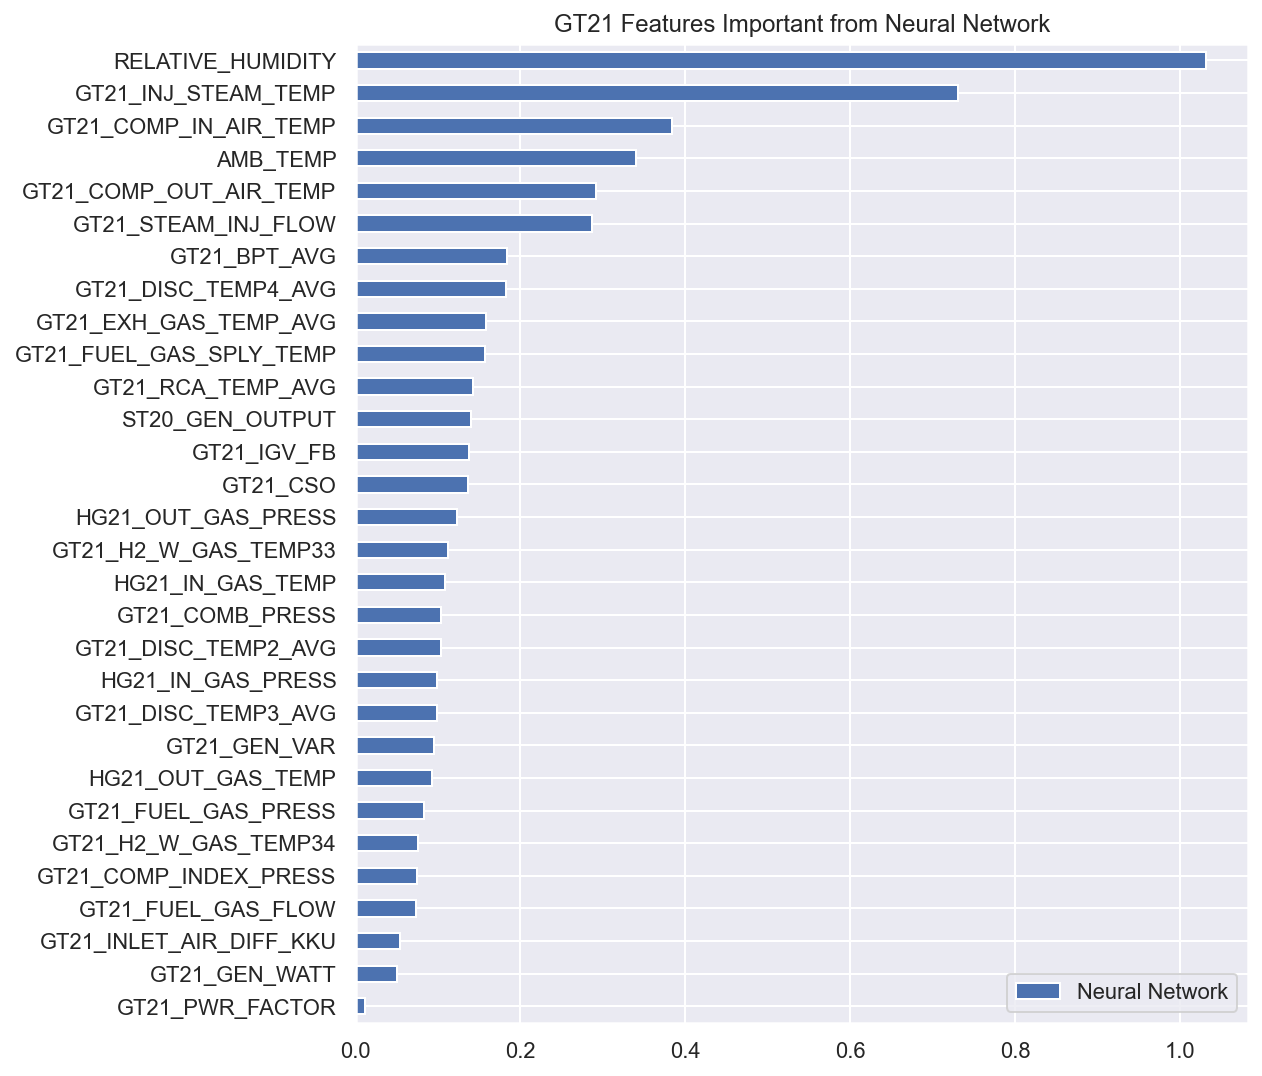

In [39]:
#Permutation Feature Importance
results = permutation_importance(model, train, y_train, scoring='neg_mean_absolute_error')
importance = results.importances_mean

#Feature Importance
Result = showandconcat('Neural Network',importance,Result)


# Show The Result

## Shown Accuracy

In [40]:
accuracy = pd.concat([accuracy_mae,accuracy_mape,accuracy_mse])
accuracy

Linear Regression  DecisionTreeRegressor  RandomForestRegressor  \
MAE(ppm)           1.454572               1.333585               1.193406   
MAPE(%)            0.607790               0.556081               0.498050   
MSE                5.404338               4.767639               3.048045   

          XGBRegressor  KNeighborsRegressor  Neural Network  
MAE(ppm)      1.199712             1.290550        1.261268  
MAPE(%)       0.500642             0.537931        0.525931  
MSE           3.267963             3.926081        3.501025

In [41]:
Result.sum()

Correlation              100.0
Linear Regression        100.0
DecisionTreeRegressor    100.0
RandomForestRegressor    100.0
XGBRegressor             100.0
KNeighborsRegressor      100.0
Neural Network           100.0
dtype: float64

## Export Accuracy and Feature Importance

In [42]:
accuracy.to_excel('GT21_Aug22_Accuracy_Result.xlsx')
Result.to_excel('GT21_Aug22_Feature_Importance.xlsx')

## Feature Importance average from all Models

<AxesSubplot:>

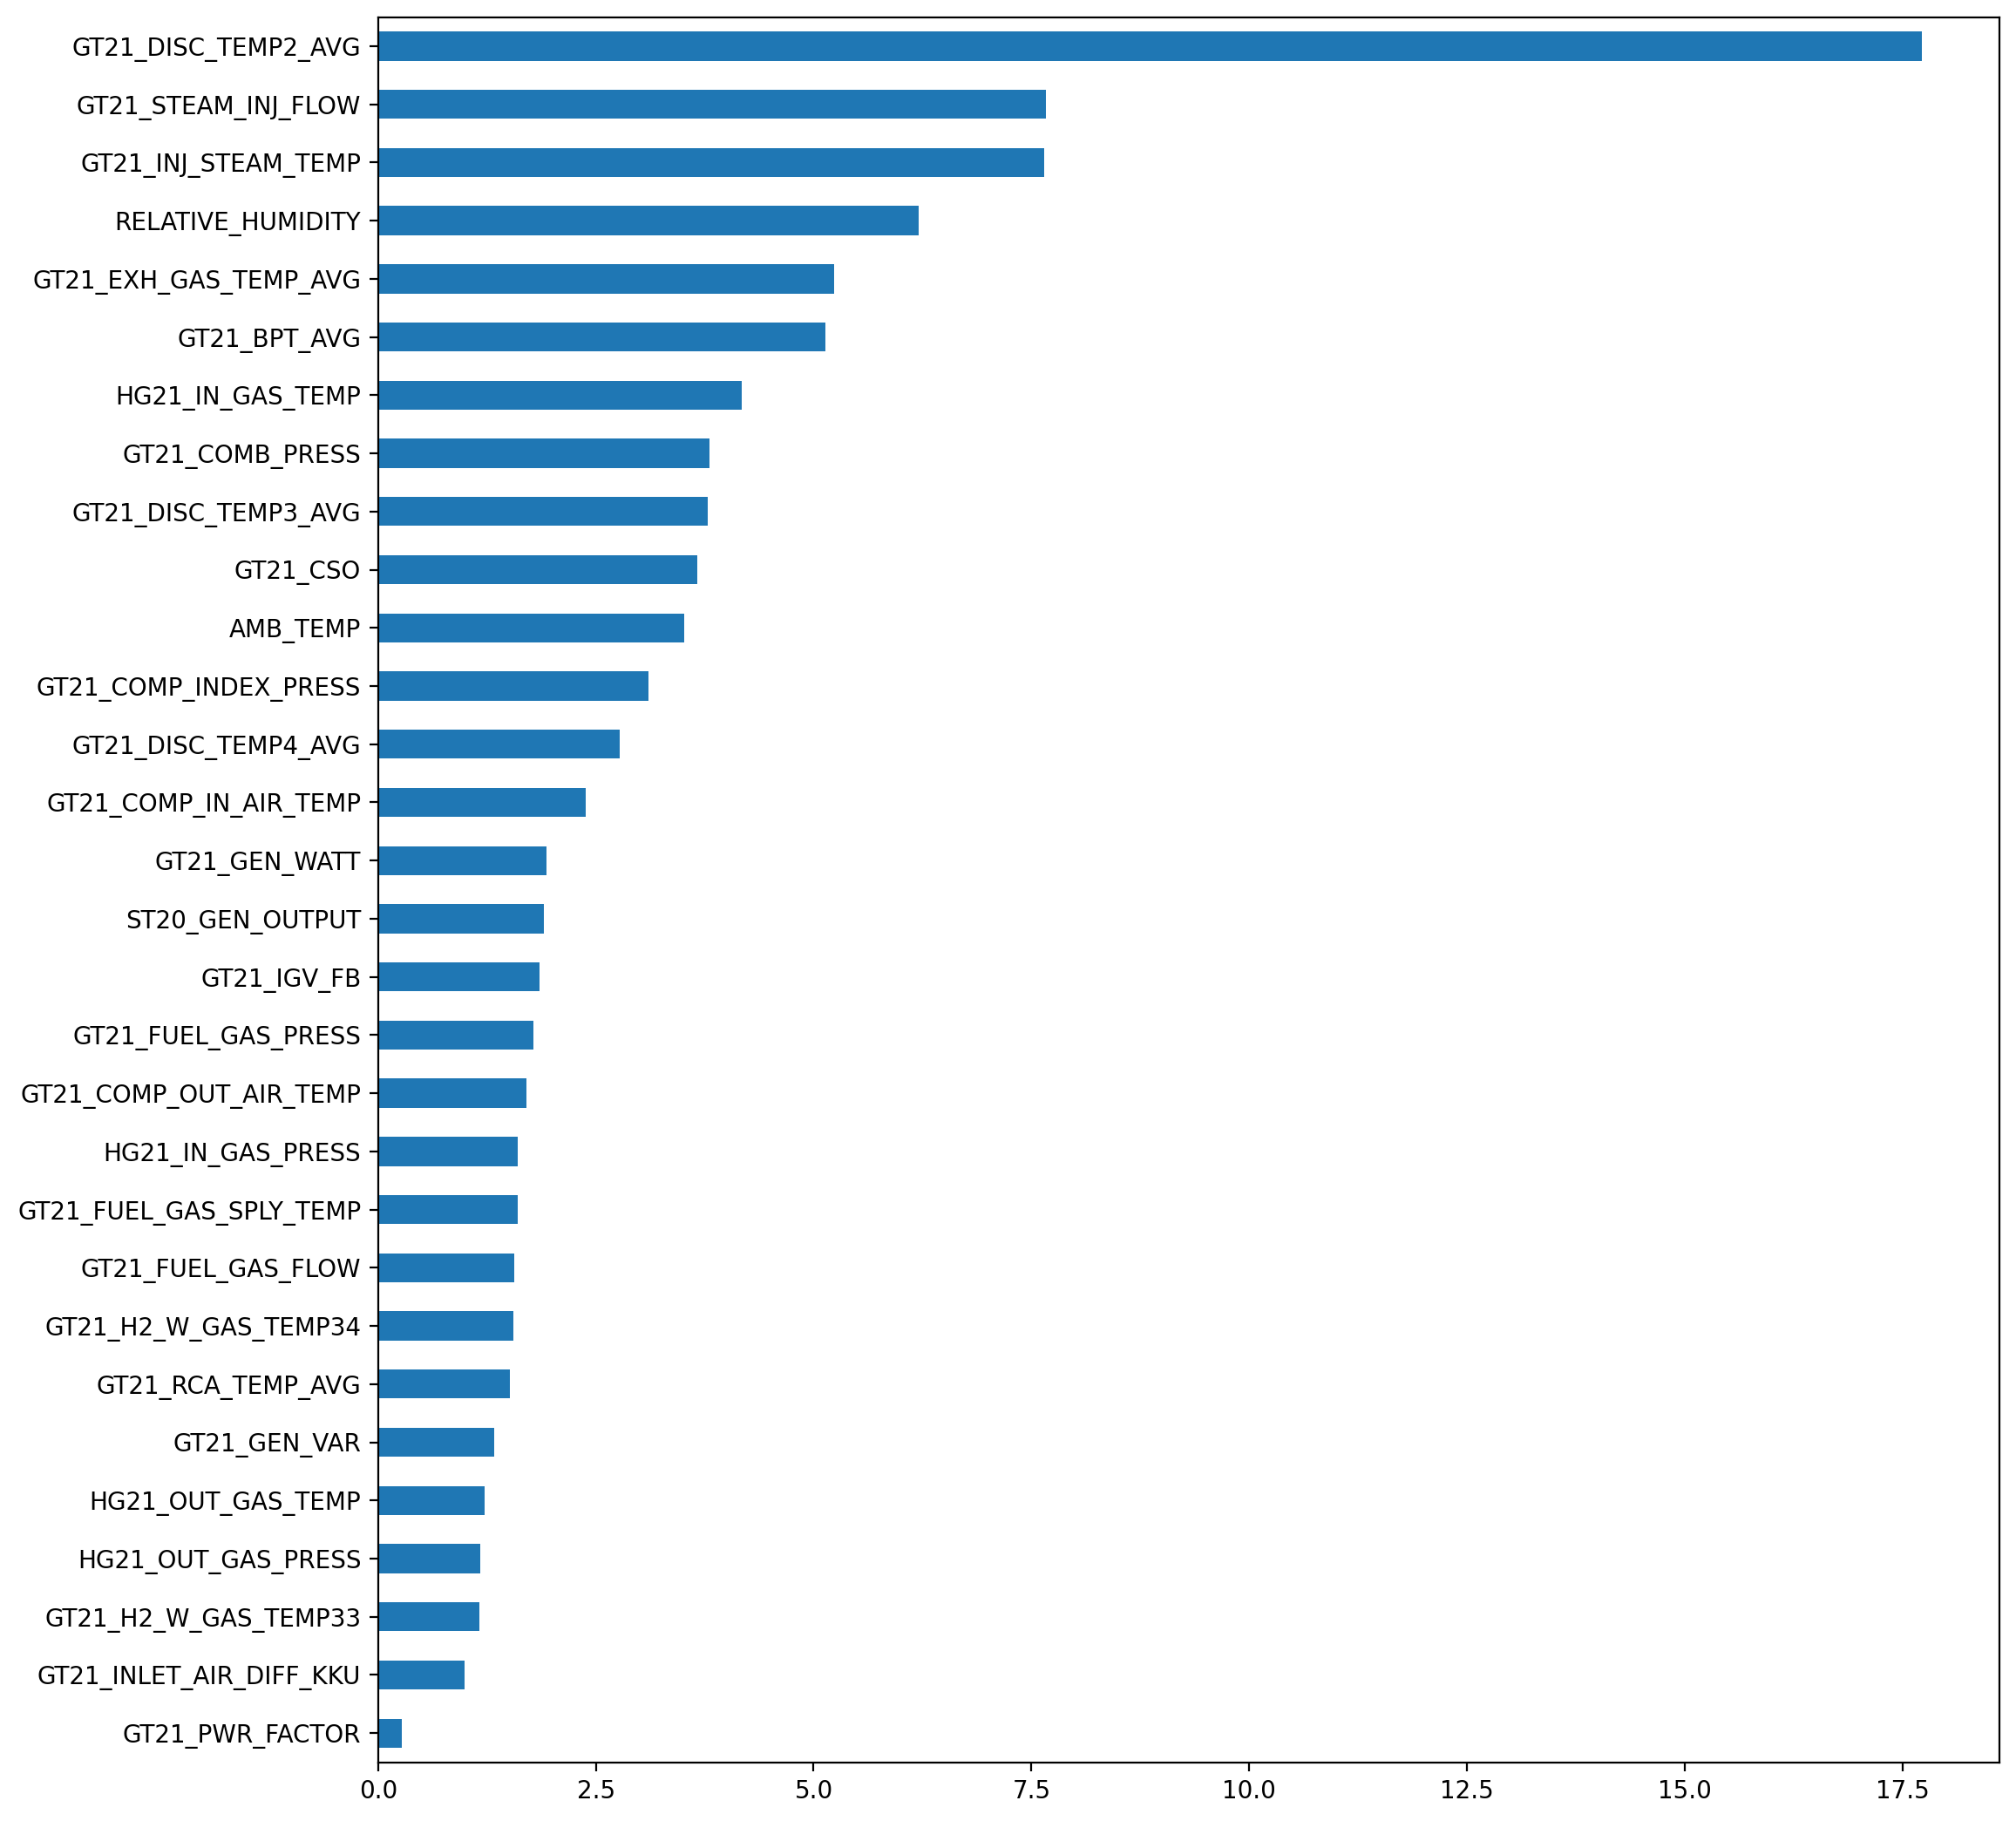

In [43]:
Result['Mean'] = Result.mean(axis=1)
Result['Sum'] = Result.sum(axis=1)-Result['Mean'] #Exclude Mean Column

plt.style.use('default')
Result['Mean'].sort_values().plot(kind='barh',figsize=(12,13))

In [44]:
#Result
Result.sort_values(by=['Mean'],ascending=False)

Correlation  Linear Regression  \
GT21_DISC_TEMP2_AVG         6.629568           2.723937   
GT21_STEAM_INJ_FLOW         3.789002           2.708591   
GT21_INJ_STEAM_TEMP         2.603355           1.726873   
RELATIVE_HUMIDITY           0.560712           0.059326   
GT21_EXH_GAS_TEMP_AVG       8.251142          12.774108   
GT21_BPT_AVG                7.793561           9.365985   
HG21_IN_GAS_TEMP            7.995298          12.364995   
GT21_COMB_PRESS             2.891822          14.586095   
GT21_DISC_TEMP3_AVG         5.708785           1.482295   
GT21_CSO                    6.240947          13.323148   
AMB_TEMP                    0.243988           1.194662   
GT21_COMP_INDEX_PRESS       1.351492           5.620814   
GT21_DISC_TEMP4_AVG         6.970524           2.070456   
GT21_COMP_IN_AIR_TEMP       0.269473           0.549433   
GT21_GEN_WATT               5.319251           4.317092   
ST20_GEN_OUTPUT             7.080754           0.109484   
GT21_IGV_FB                 1.398710           5.868041   
GT21_FUEL_GAS_PRESS         3.653014           0.837003   
GT21_COMP_OUT_AIR_TEMP      2.688423           0.718120   
HG21_IN_GAS_PRESS           0.657164           0.119700   
GT21_FUEL_GAS_SPLY_TEMP     0.372787           1.667556   
GT21_FUEL_GAS_FLOW          5.367446           2.215598   
GT21_H2_W_GAS_TEMP34        1.907270           0.488692   
GT21_RCA_TEMP_AVG           2.376763           1.508789   
GT21_GEN_VAR                1.312234           0.193509   
HG21_OUT_GAS_TEMP           2.270065           0.854756   
HG21_OUT_GAS_PRESS          1.087198           0.205528   
GT21_H2_W_GAS_TEMP33        1.785144           0.288086   
GT21_INLET_AIR_DIFF_KKU     1.286749           0.043579   
GT21_PWR_FACTOR             0.137357           0.013747   

                         DecisionTreeRegressor  RandomForestRegressor  \
GT21_DISC_TEMP2_AVG                  59.171181              20.514676   
GT21_STEAM_INJ_FLOW                   2.048151              13.747033   
GT21_INJ_STEAM_TEMP                   0.898550               4.104348   
RELATIVE_HUMIDITY                    11.258071               5.124643   
GT21_EXH_GAS_TEMP_AVG                 2.685244               4.218991   
GT21_BPT_AVG                          5.607577               3.983581   
HG21_IN_GAS_TEMP                      1.481235               2.504257   
GT21_COMB_PRESS                       2.006344               1.192394   
GT21_DISC_TEMP3_AVG                   0.000000               6.407568   
GT21_CSO                              0.276197               1.357472   
AMB_TEMP                              7.576591               3.959772   
GT21_COMP_INDEX_PRESS                 5.438416               3.600216   
GT21_DISC_TEMP4_AVG                   0.197749               2.801594   
GT21_COMP_IN_AIR_TEMP                 0.000000               2.074217   
GT21_GEN_WATT                         0.219066               1.627964   
ST20_GEN_OUTPUT                       0.000000               1.294746   
GT21_IGV_FB                           0.216155               1.544758   
GT21_FUEL_GAS_PRESS                   0.000000               1.635983   
GT21_COMP_OUT_AIR_TEMP                0.000000               1.078849   
HG21_IN_GAS_PRESS                     0.000000               2.173334   
GT21_FUEL_GAS_SPLY_TEMP               0.000000               1.864761   
GT21_FUEL_GAS_FLOW                    0.000000               1.040941   
GT21_H2_W_GAS_TEMP34                  0.115806               1.793418   
GT21_RCA_TEMP_AVG                     0.000000               1.548169   
GT21_GEN_VAR                          0.000000               1.731067   
HG21_OUT_GAS_TEMP                     0.000000               1.814092   
HG21_OUT_GAS_PRESS                    0.045493               1.790982   
GT21_H2_W_GAS_TEMP33                  0.000000               1.469988   
GT21_INLET_AIR_DIFF_KKU               0.758174               1.635345   
GT21_

## Feature Importance on Box Plot

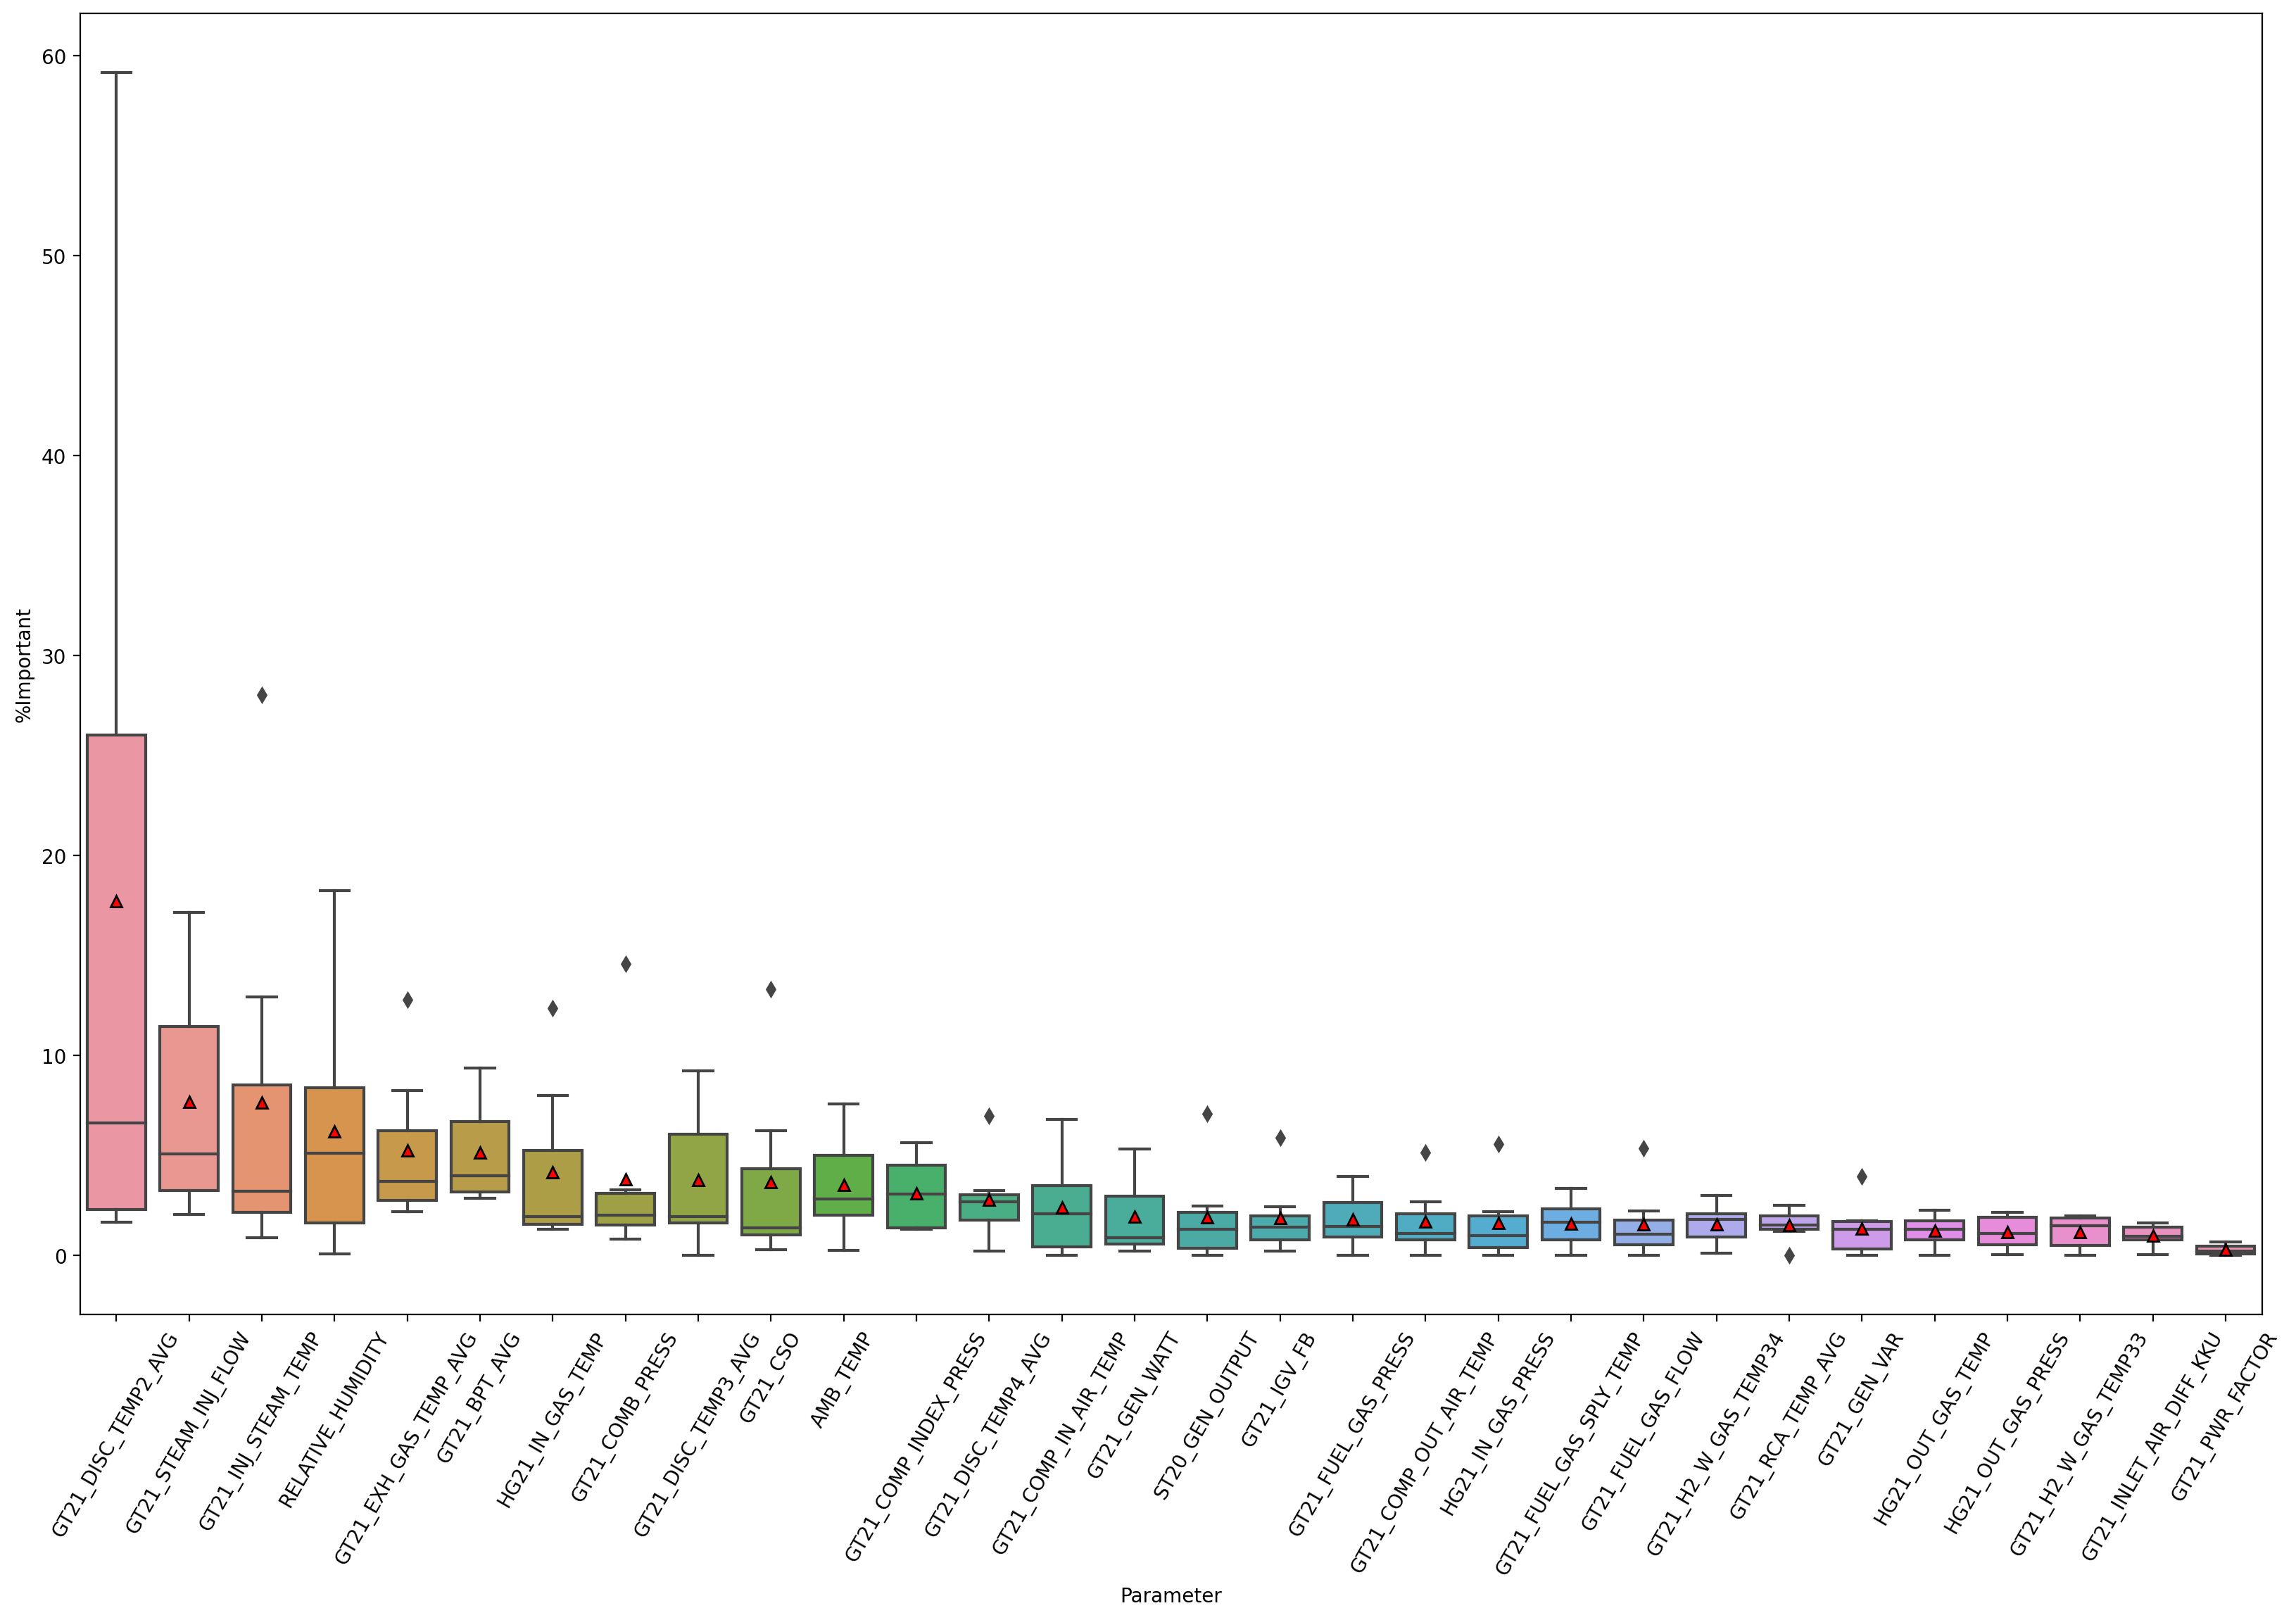

In [45]:
#plt.style.available

Result_T = Result.sort_values(by=['Mean'],ascending=False).drop(columns=['Sum','Mean']).transpose()
# Result_T.plot.hist(bins=60,figsize=(15,6),alpha=0.3)

#before normalization 
Result_T_melt = Result_T.melt(var_name='Parameter', value_name='%Important')
#.melt to transform to Long Format (like before pivot table)
plt.figure(figsize=(20, 12))
ax = sns.boxplot(x='Parameter', y='%Important', data=Result_T_melt,showmeans=True,meanprops={
                       "markerfacecolor":"red", 
                       "markeredgecolor":"black",
                      "markersize":"6"})
ax.set_xticklabels(Result_T.keys(), rotation=60);

## Report All Features 

In [46]:
Des = Result.drop(columns=['Sum','Mean']).transpose().describe()
Des

GT21_GEN_WATT  GT21_GEN_VAR  GT21_PWR_FACTOR  GT21_FUEL_GAS_PRESS  \
count       7.000000      7.000000         7.000000             7.000000   
mean        1.931741      1.333054         0.272163             1.786804   
std         2.040244      1.346347         0.255720             1.467446   
min         0.219066      0.000000         0.000000             0.000000   
25%         0.573633      0.334519         0.075552             0.916827   
50%         0.891545      1.312234         0.194404             1.456516   
75%         2.972528      1.706133         0.451236             2.644498   
max         5.319251      3.937838         0.657160             3.928459   

        GT21_CSO  GT21_IGV_FB  GT21_COMP_IN_AIR_TEMP  GT21_BPT_AVG  \
count   7.000000     7.000000               7.000000      7.000000   
mean    3.667319     1.856718               2.379370      5.138581   
std     4.693336     1.907332               2.565405      2.560843   
min     0.276197     0.216155               0.000000      2.859885   
25%     1.032836     0.770463               0.409453      3.179739   
50%     1.357472     1.398710               2.063143      3.983581   
75%     4.324372     1.986598               3.494623      6.700569   
max    13.323148     5.868041               6.784298      9.365985   

       GT21_EXH_GAS_TEMP_AVG  GT21_FUEL_GAS_FLOW  GT21_FUEL_GAS_SPLY_TEMP  \
count               7.000000            7.000000                 7.000000   
mean                5.232846            1.564292                 1.602871   
std                 3.893902            1.820741                 1.203887   
min                 2.198058            0.000000                 0.000000   
25%                 2.741275            0.518521                 0.787627   
50%                 3.705069            1.040941                 1.667556   
75%                 6.235067            1.752308                 2.320879   
max                12.774108            5.367446                 3.335526   

       GT21_STEAM_INJ_FLOW  GT21_COMP_OUT_AIR_TEMP  GT21_COMB_PRESS  \
count             7.000000                7.000000         7.000000   
mean              7.665442                1.702458         3.801460   
std               5.874231                1.730622         4.834852   
min               2.048151                0.000000         0.808153   
25%               3.248797                0.771573         1.513481   
50%               5.071263                1.078849         2.006344   
75%              11.444615                2.070831         3.091333   
max              17.151858                5.153548        14.586095   

       GT21_H2_W_GAS_TEMP33  GT21_H2_W_GAS_TEMP34  GT21_INJ_STEAM_TEMP  \
count              7.000000              7.000000             7.000000   
mean               1.162989              1.556326             7.645542   
std                0.818354              1.001999             9.850868   
min                0.000000              0.115806             0.898550   
25%                0.500528              0.910809             2.165114   
50%                1.469988              1.793418             3.218260   
75%                1.849978              2.079781             8.511110   
max                1.969923              3.003881            28.049539   

       GT21_COMP_INDEX_PRESS  GT21_INLET_AIR_DIFF_KKU  HG21_IN_GAS_PRESS  \
count               7.000000                 7.000000           7.000000   
mean                3.107093                 0.997547           1.608518   
std                 1.884119                 0.541109           1.925708   
min                 1.313260                 0.043579           0.000000   
25%                 1.363385                 0.782364           0.388432   
50%                 3.050172                 0.945177           0.972376   
75%                 4.519316                 1.396999           1.963708   
max                 5.620814                 1.635345           5.582967   

     

In [47]:
# Export to Excel
Result[['Mean']].sort_values(['Mean'],ascending=False).to_excel('GT21_Feat_Result.xlsx')

In [48]:
#Visualize top 5 on Pairplot
#top5_features = ['GT21_DISC_TEMP2_AVG','GT21_STEAM_INJ_FLOW','GT21_INJ_STEAM_TEMP',
#                 'GT21_COMB_PRESS','RELATIVE_HUMIDITY','GT21_NOX_7O2']
#sns.pairplot(df[top5_features])